# Imports

In [1]:
from collections import Counter
from gensim.models import Word2Vec
from nltk import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #for word embedding
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score # bag of words
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import collections
import csv
import gensim
import matplotlib.pyplot as plt
import nltk
import nltk.tokenize
import numpy as np #for text pre-processing
import operator
import pandas as pd
import pathlib
import pickle
import re, string
import seaborn
import string
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')#for model-building
ps = PorterStemmer()

C:\Users\Martin\Anaconda3\envs\tensorflow\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
In C:\Users\Martin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Martin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Martin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_

# Functions

### _1) Reading in files and append them into corpus list_

In [2]:
tok = nltk.tokenize.TreebankWordTokenizer()

def make_corpus(filename):
    corpus = []
    with open(filename, 'r') as f:
        for line in f:
            corpus.extend(t for line in f for t in tok.tokenize(line))
    
    return corpus

### _2) Convert corpus into data frame_

a) voc: counts the total number of tokens in corpus

b) frq_ returns a dataframe with tokens and frequency of each token
    

In [3]:
def dataframe_corpus(corpus):
    voc = collections.Counter(corpus)
    frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    return frq

### _3) Frequency normalized by corpus size and Cumulative normalized frequency inserted into dataframe_

In [4]:
def freq_cum(frq):
    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    return frq


### _4) Plots for Culumative frequency and Log-log plot for Zipf's law_

In [5]:
seaborn.set(style='whitegrid')

# Plot: Cumulative frequency by index
def freq_cum_plot(frq):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq)
    return plt.show()

# Plot: Cumulative frequency by index, top x tokens
def freq_cum_plot_top_x_tokens(frq, top_x):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq[:int(top_x)], kind='line')
    return plt.show()

# Plot: Log-log plot for Zipf's law
def zipfs_law(frq):
    frq['log_frq'] = numpy.log(frq.frequency)
    frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=True))
    seaborn.relplot(x='log_rank', y='log_frq', data=frq)
    return plt.show()

***

## a.1) Tokenization

In [6]:
def token_sentences(text):
    sentences = sent_tokenize(text)
    return sentences


def tokenization(words,text):
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]   
    return words

#### a.1.1) Comparing TweetTokenizer with NLTK Tokenizer (Task 1)

In [7]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize

def comparing_tokenizer(text):
    tt = TweetTokenizer()
    tweet_tokenizer = tt.tokenize(text)
    word_tweet_tok = word_tokenize(text)
    return tweet_tokenizer, word_tweet_tok

#output example:

# tweet_tokenizer       = ['#ibelieveblaseyford', 'is', 'liar', 'she', 'is']
# word_tweet_tok (NLTK) = ['#', 'ibelieveblaseyford', 'is', 'liar', 'she']

#### a.1.2) Spacy library

In [8]:
def split_in_sentences(text):
    doc = nlp(text)
    return [str(sent).strip() for sent in doc.sents]

## a.2) Vocabulary 

In [9]:
#converting a dataframe into a single list 
#text is split into words defined by their space inbetween
#words are inserted into list 
def words_list(text):
    #words are inserted into list 
    corpus=[]
    for row in text:
        tokens = row[0].split(" ")
        for token in tokens:
            corpus.append(token)
    
    
    def vocabulary_list(corpus):
        #initlialize the vocabulary
        vocab = list(set(" ".join(corpus)))
        vocab.remove(' ')
        return vocab
      
    
    def split_words_char(corpus):
        #split the word into characters
        corpus = [" ".join(token) for token in corpus]
        #appending </w>
        corpus=[token+' </w>' for token in corpus]
        return corpus
        
    x,y = split_words_char(corpus), vocabulary_list(corpus)
    return x,y


# Creating the Bag of Words model
def bag_of_words(text):
    word2count = {}
    for data in text:
        words = nltk.word_tokenize(data)
        for word in words:  
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    return word2count   



## b) Pre-processing and cleaning

In [10]:
# removing punctuations
# convert all words into lower cases
# remove stop words

def preprocess_text(words):
    #delete punctuations
    punctuation_table = str.maketrans('', '', string.punctuation)

    #convert all words into lower cases
    words = [word.translate(punctuation_table).lower() for word in words]
    
    #remove stopwords
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]

    return words

# cleaning sentences within data frame
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    return df

def del_punctuations(words):
    punctuation_table = str.maketrans('', '', string.punctuation)
    words = [word.translate(punctuation_table).lower() for word in words]
    return words


def stop_words(words):
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return words

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text


## c) Basic statistics

In [11]:
# number of tokens, sentences, average tokens, total unique tokens, total number of tokens after cleaning

def basic_statistics(text,printer = False):
    sents = nltk.sent_tokenize(text)
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]
    average_tokens = round(len(words)/len(sents))
    unique_tokens = set(words)
    token_ratio = round(len(unique_tokens)/len(tokens),3)
    stop_words = set(stopwords.words('english'))
    final_tokens = []
    for each in words:
        if each not in stop_words:
            final_tokens.append(each)
    if printer == True:
        print(f'The number of characters: {len(text)}')
        print(f'The number of tokens is: {len(tokens)}')
        print(f'The number of sentences is: {len(sents)}')
        print(f'The average number of tokens per sentence is: {average_tokens}')
        print(f'The number of unique tokens are: {len(unique_tokens)}')
        print(f'The tokens ratio is: {token_ratio}')
        print(f'The number of total tokens after removing stopwords are: {len(final_tokens)}')
    return len(text), len(tokens), len(sents), average_tokens, len(unique_tokens), token_ratio, len(final_tokens)

def word_frequency(words):
    frequency_words = collections.Counter(words)
    
    #convert counter object to dictionary
    frequency_words_dict = dict(frequency_words)
    res = dict(sorted(frequency_words_dict.items(), key=lambda item: item[1]))
    return res

def top_20_most_common_words(freq_words):
    res = dict(Counter(freq_words).most_common(20))
    return res

def most_common_words(dictionary):
    # Output a dict of most common words
    return dict(sorted(dictionary.items(),key=lambda x: x[1], reverse=True))

def least_common_words(dictionary):
    return sorted(list(dictionary.items()),key=lambda x: x[1])


# Function for loglog plots
def llplot(list_var, labels, title):
    """Function that takes a list of datasets, list of labels and a title as string, and plots a loglogplot, example:
    llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], ["val", "train", "test"], "Offensive dataset, loglog plot")
    """
    # Size of the figure:
    plt.figure(figsize = (7,6))
    # Iterating through the datasets:
    for idx, i in enumerate(list_var):
        y = np.log(list(most_common_words(i).values()))
        x = np.log([i for i in range(1,len(y)+1)])
        plt.scatter(x, y, label = labels[idx])
    # Labeling title and axis:
    plt.title(title)
    plt.xlabel("Rank of word")
    plt.ylabel("Frequency of word")
    # Plotting:
    plt.legend()
    plt.show()
    return None


## Spacy - preprocessing/cleaning

In [12]:
def merging_labels_and_sentences(textfile, labelfile):

    # read textfile and labelfile into two separate dataframes
    df_text = pd.read_csv(textfile + '.txt', header=None, skiprows = 0,
        names=['tweet'], sep='\t', quoting=3)
    df_labels = pd.read_csv(labelfile + '.txt',header=None, skiprows = 0, names=['label'],
        sep='\t', quoting=3)

    index_text = [x for x in range(1, len(df_text.values)+1)]

    df_labels.insert(loc=0, column='id', value =index_text)
    df_text.insert(loc=0, column='id', value =index_text)
    final_df = df_text.merge(df_labels, on='id', how='left')

    return final_df

def class_distribution(dataframe,title,xlabel_title):
    x = dataframe['label'].value_counts()
    barplot = seaborn.barplot(x.index, x)
    barplot.set_title(title)
    barplot.set_xlabel(xlabel_title)
    barplot.set_ylabel("Count")
    return barplot

# WORD-COUNT
def word_count(dataframe_col):
    dataframe_col['word_count'] = dataframe_col['tweet'].apply(lambda x: len(str(x).split()))
    
    avg_off_tweets = round(dataframe_col[dataframe_col['label']==1]['word_count'].mean(),3)
    avg_non_off_tweets = round(dataframe_col[dataframe_col['label']==0]['word_count'].mean(),3) 

    return dataframe_col, avg_off_tweets, avg_non_off_tweets

# CHARACTER-COUNT
def char_count(dataframe_col):
    dataframe_col['char_count'] = dataframe_col['tweet'].apply(lambda x: len(str(x)))
    
    #the average characters in offensive tweets
    avg_char_off = round(dataframe_col[dataframe_col['label']==1]['char_count'].mean(),3) 

    #the average characters in non-offensive tweets
    avg_char_non_off = round(dataframe_col[dataframe_col['label']==0]['char_count'].mean(),3)

    return dataframe_col, avg_char_off, avg_char_non_off

def plot_word_count(dataframe):
    # PLOTTING WORD-COUNT
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    dataframe_words=dataframe[dataframe['label']==1]['word_count']
    ax1.hist(dataframe_words,color='red')
    ax1.set_title('offensive tweets')
    dataframe_words=dataframe[dataframe['label']==0]['word_count']
    ax2.hist(dataframe_words,color='green')
    ax2.set_title('non-offensive tweets')
    fig.suptitle('Words per tweet')
    ax2.set_xlabel("Length of tweet")
    ax2.set_ylabel("occurrences")
    ax1.set_xlabel("Length of tweet")
    ax1.set_ylabel("occurrences")
    plt.show()

def missing_values(dataframe):
    res = dataframe.isna().sum()
    return res

#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text
 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
    
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))



## D) Classification

In [13]:
#SPLITTING THE VALIDATION DATASET INTO TRAIN AND TEST


def split_dataset(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe["tweet"],dataframe      
    ["label"],test_size=0.2,shuffle=True)
    return X_train, X_test, y_train, y_test
    
def tokenize_train_test(X_train, X_test):
    #Word2Vec
    # Word2Vec runs on tokenized sentences
    X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
    X_test_tok= [nltk.word_tokenize(i) for i in X_test]

    return X_train_tok, X_test_tok


#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] 
        for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) 
        for words in X])

#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] 
        for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) 
        for words in X])

## Model prediction

#### Cleaned

In [14]:
def model_prediction_preprocessed_data(dataframe):
    #Pre-processing the new dataset
    dataframe['clean_text'] = dataframe['tweet'].apply(lambda x: finalpreprocess(x)) 
    
    #preprocess the data
    X_test=dataframe['clean_text'] 

    #converting words to numerical data using tf-idf
    X_vector=tfidf_vectorizer.transform(X_test)

    #use the best model to predict 'target' value for the new dataset 
    y_predict = lr_tfidf.predict(X_vector)      
    y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
    dataframe['predict_prob']= y_prob
    dataframe['label']= y_predict
    final=dataframe[['clean_text','label']].reset_index(drop=True)
    return final 


#### Non cleaned

In [15]:
def model_prediction_nonprocessed_data(dataframe):
    X_test=dataframe['tweet'] 

    #converting words to numerical data using tf-idf
    X_vector=tfidf_vectorizer.transform(X_test)

    #use the best model to predict 'target' value for the new dataset 
    y_predict = lr_tfidf.predict(X_vector)      
    y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
    dataframe['predict_prob']= y_prob
    dataframe['label']= y_predict
    final=dataframe[['tweet','label']].reset_index(drop=True)
    return final 


***
***

# TASK 1: PRE-PROCESSING AND TOKENIZATION
_ splitting text files into words _


## 1.1) Text file: Emoji
***

### Read in txt files: offensive/emoji.txt

In [16]:
file_path_val = pathlib.Path(r'datasets/emoji/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    emoji_text_val = f.read()       
    f.close()
    
emoji_words_val_txt = emoji_text_val[1:].split()

print(emoji_words_val_txt[:100])

['little', 'throwback', 'with', 'my', 'favourite', 'person', '@', 'Water', 'Wall', 'glam', 'on', '@user', 'yesterday', 'for', '#kcon', 'makeup', 'using', '@user', 'in', '#featherette,…', 'Democracy', 'Plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', '#Decision2016', '@', 'NBC', 'News', 'Then', '&amp;', 'Now.', 'VILO', '@', 'Walt', 'Disney', 'Magic', 'Kingdom', 'Who', 'never...', '@', 'A', 'Galaxy', 'Far', 'Far', 'Away', 'Dinner', 'in', 'FLA', 'tonight', '//', 'Pan-seared', 'salmon', 'over', 'couscous', 'veggie', 'salad', '#yum', '#dinner', '#florida', '#salmon…', "It's", 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '@', 'West', 'Salem…', 'I', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '@', 'Phi', 'Mu', 'at', 'JSU', "'Cause", 'I', 'Miss', 'My', 'Little', 'Homies', '.#Throwback']


In [17]:
file_path_train = pathlib.Path(r'datasets/emoji/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    emoji_text_train = f.read()       
    f.close()
    
emoji_words_train_txt = emoji_text_train[1:].split()
print(emoji_words_train_txt[:100])

['unday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '️', '️', '️', '@', 'Abbot', 'Kinney,', 'Venice', 'Time', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations.', 'Chomp,', 'belch,', 'chomp!', '(@', "Lucille's", 'Smokehouse', 'Bar-B-Que)', 'Love', 'love', 'love', 'all', 'these', 'people', '️', '️', '️', '#friends', '#bff', '#celebrate', '#blessed', '#sundayfunday', '@', 'San…', '️', '️', '️', '️', '@', 'Toys"R"Us', 'Man', 'these', 'are', 'the', 'funniest', 'kids', 'ever!!', 'That', 'face!', '#HappyBirthdayBubb', '@', 'FLIPnOUT', 'Xtreme', '#sandiego', '@', 'San', 'Diego,', 'California', 'My', 'little', '️', '️', '️', '️', '️', '#ObsessedWithMyDog', '@', 'Cafe', 'Solstice', 'Capitol', 'Hill', 'More', '#tinyepic', 'things', '#tinyepicwestern,', 'this', 'one', 'is', 'crazy', '@user', 'I', 'may', 'be', 'one', 'of', 'your…', 'Last']


In [18]:
file_path_test = pathlib.Path(r'datasets/emoji/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    emoji_text_test = f.read()       
    f.close()
    
emoji_words_test_txt = emoji_text_test[1:].split()
print(emoji_words_test_txt[:100])

['n', 'Pelham', 'Parkway', 'The', 'calm', 'before......', '|', 'w/', 'sofarsounds', '@user', '|', ':', 'B.', 'Hall.......#sofarsounds…', 'Just', 'witnessed', 'the', 'great', 'solar', 'eclipse', '@', 'Tampa,', 'Florida', 'This', 'little', 'lady', 'is', '26', 'weeks', 'pregnant', 'today!', 'Excited', 'for', 'baby', 'Cam', 'to', 'come!', '@', 'Springfield,…', 'Great', 'road', 'trip', 'views!', '@', 'Shartlesville,', 'Pennsylvania', 'CHRISTMAS', 'DEALS', 'BUY', 'ANY', '3', 'SMALL', 'POMADES', '1.5', 'OR', '1.7', 'OZ', 'RECEIVE', 'THE', 'F&amp;S', 'COLLECTOR', 'TIN', '&amp;', 'COMB…', 'the', '#sisterstunt', 'was', 'mad', 'real', 'last', 'night', '#MiaStaxxx', '#AndreaStaxxx', '#denverqueen', '#staxxxlife…', "I'm", 'starting', 'to', 'love', 'shooting', 'in', 'the', 'dark', '#brandonwolfel', '@', 'New', 'York,', 'New', 'York', 'Let', 'the', 'sun', 'shine', 'through', '️', '5x5', 'Feet', '#oilpainting', '#oiloncanvas', '#acrylicpainting']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [19]:


emoji_cleaned_val_words = del_punctuations(emoji_words_val_txt)
emoji_cleaned_train_words = del_punctuations(emoji_words_train_txt)
emoji_cleaned_test_words = del_punctuations(emoji_words_test_txt)

print('val_text.txt:\n',emoji_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',emoji_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',emoji_cleaned_test_words[:100],'\n')

val_text.txt:
 ['little', 'throwback', 'with', 'my', 'favourite', 'person', '', 'water', 'wall', 'glam', 'on', 'user', 'yesterday', 'for', 'kcon', 'makeup', 'using', 'user', 'in', 'featherette…', 'democracy', 'plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', 'decision2016', '', 'nbc', 'news', 'then', 'amp', 'now', 'vilo', '', 'walt', 'disney', 'magic', 'kingdom', 'who', 'never', '', 'a', 'galaxy', 'far', 'far', 'away', 'dinner', 'in', 'fla', 'tonight', '', 'panseared', 'salmon', 'over', 'couscous', 'veggie', 'salad', 'yum', 'dinner', 'florida', 'salmon…', 'its', 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '', 'west', 'salem…', 'i', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '', 'phi', 'mu', 'at', 'jsu', 'cause', 'i', 'miss', 'my', 'little', 'homies', 'throwback'] 


val_train.txt:
 ['unday', 'afternoon', 'walking', 'through', 'venice', 'in', 'the', 'sun', 'with', 'user', '️', '️', '️', '', 'abbot', 'kinney', 'venice

In [20]:

#nltk.download('punkt')

emoji_sentences_val_txt = token_sentences(emoji_text_val)   
emoji_sentences_train_txt = token_sentences(emoji_text_train)
emoji_sentences_test_txt = token_sentences(emoji_text_test)   

print(emoji_sentences_val_txt[:5])
print(emoji_sentences_train_txt[:5])
print(emoji_sentences_test_txt[:5])

['A little throwback with my favourite person @ Water Wall\nglam on @user yesterday for #kcon makeup using @user in #featherette,…\nDemocracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News\nThen &amp; Now.', "VILO @ Walt Disney Magic Kingdom\nWho never... @ A Galaxy Far Far Away\nDinner in FLA tonight // Pan-seared salmon over couscous veggie salad #yum #dinner #florida #salmon…\nIt's my fav seniors last game congrats on beating west @ West Salem…\nI got to to go formal with my best friend @ Phi Mu at JSU\n'Cause I Miss My Little Homies .#Throwback #CousinLove @ Indiana University\nBirthday Kisses @ Madison, Wisconsin\nGreat time in Tuscaloosa with my girl!", '@ Bryant–Denny Stadium\nA seguir aprendiendo del mundo de las berries (@ John F. Kennedy International Airport (JFK) in Queens, NY, NY)\n#livinginparadise @ Ramada Plaza Beach Resort\n••In order for your life to be "GREAT" you must first learn to "APPRECIATE" it... •• #Ny…\nThese girls!', '#seniors2016 #memories

### Number of words in each tokenization variables

In [21]:

emoji_token_val = tokenization(emoji_cleaned_val_words, emoji_text_val)
emoji_token_train = tokenization(emoji_cleaned_train_words, emoji_text_train)
emoji_token_test = tokenization(emoji_cleaned_test_words, emoji_text_test)

print(f'Number of words in tokenization for val_text: {len(emoji_token_val)}')
print(f'Number of words in tokenization for val_train: {len(emoji_token_train)}')
print(f'Number of words in tokenization for val_test: {len(emoji_token_test)}')

Number of words in tokenization for val_text: 49661
Number of words in tokenization for val_train: 461690
Number of words in tokenization for val_test: 518019


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [22]:
emoji_cleaned_val_words = stop_words(emoji_token_val)
emoji_cleaned_train_words = stop_words(emoji_token_train)
emoji_cleaned_test_words = stop_words(emoji_token_test)

print(f'Number of words after removing Stop Words: {len(emoji_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_test_words)}')


Number of words after removing Stop Words: 33634
Number of words after removing Stop Words: 314706
Number of words after removing Stop Words: 345902


### Frequency of each word

In [23]:
import collections

#returns frequency of each word
emoji_freq_words_val = word_frequency(emoji_cleaned_val_words)
emoji_freq_words_train = word_frequency(emoji_cleaned_train_words)
emoji_freq_words_test = word_frequency(emoji_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(emoji_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(emoji_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(emoji_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('friends', 76), ('high', 77), ('much', 78), ('fun', 78), ('first', 79), ('school', 81), ('life', 82), ('thank', 83), ('thanks', 86), ('center', 87), ('california', 87), ('see', 87), ('get', 89), ('city', 91), ('great', 96), ('back', 96), ('little', 99), ('ca', 99), ('university', 103), ('beautiful', 106), ('christmas', 116), ('like', 118), ('birthday', 119), ('last', 120), ('one', 125), ('today', 134), ('got', 137), ('best', 137), ('time', 137), ('good', 138), ('beach', 147), ('york', 148), ('night', 151), ('park', 152), ('day', 223), ('happy', 225), ('amp', 245), ('new', 292), ('love', 389)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('city', 738), ('francisco', 746), ('great', 751), ('fun', 756), ('little', 778), ('see', 783), (

### Vocabulary list for offensive text files
_Looking through vocabulary lists can help you find problems
(especially tokens that only occur once or twice)._

In [24]:


emoji_corpus_val, emoji_vocab_val = words_list(emoji_text_val)
emoji_corpus_train, emoji_vocab_train = words_list(emoji_text_train)
emoji_corpus_test, emoji_vocab_test = words_list(emoji_text_test)

print('Vocabulary for text_val.txt:\n', emoji_vocab_val[:20],'\n')
print('Vocabulary for text_train.txt:\n', emoji_vocab_train[:20],'\n')
print('Vocabulary for text_test.txt:\n', emoji_vocab_test[:20],'\n')

Vocabulary for text_val.txt:
 ['%', 'j', '⚘', '#', '…', 'ｏ', 'J', ',', '！', 'ブ', ')', '=', '☉', 'L', 'F', 'p', 'Z', '️', '・', '↠'] 

Vocabulary for text_train.txt:
 ['ナ', 'í', '方', '#', 'J', '허', 'و', '站', ',', '태', 'ま', '\u200c', 'p', 'っ', 'р', 'ィ', '生', 'カ', 'な', 'b'] 

Vocabulary for text_test.txt:
 ['í', '#', 'ใ', '焼', 'J', 'ร', 'و', ',', 'ｖ', 'ま', 'ウ', 'p', '᠌', 'р', '生', 'г', 'ｈ', 'な', 'b', '下'] 



### Read in txt files: offensive/val_text.txt

In [25]:
#offensive_

In [26]:
file_path_val = pathlib.Path(r'datasets/offensive/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    offensive_text_val = f.read()       
    f.close()
    
offensive_words_val_txt = offensive_text_val[1:].split()

print(offensive_words_val_txt[:100])

['user', '@user', 'WiiU', 'is', 'not', 'even', 'a', 'real', 'console.', '@user', '@user', '@user', 'If', 'he', 'is', 'from', 'AZ', 'I', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids.', '@user', 'I', 'thought', 'Canada', 'had', 'strict', 'gun', 'control.', 'Help', 'me', 'understand', 'what', 'is', 'happening.', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Following', 'all', '#Maga', 'patriots', 'please', 'follow', 'back', '👍', '#LionsDen', '🦁', '#MAGA2KAG', '🇺🇸', '1', 'Minute', 'of', 'Truth:', 'Gun', 'Control', 'via', '@user', '@user', '@user', '@user', 'We', 'could', 'help', 'if', 'you', 'are', 'London', 'based', '😊', '@user', '@user', 'There', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the']


In [27]:
file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    offensive_text_train = f.read()       
    f.close()
    
offensive_words_train_txt = offensive_text_train[1:].split()
print(offensive_words_train_txt[:100])

['user', 'Bono...', 'who', 'cares.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen.', '@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama’s', 'picks.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president.', '@user', 'Get', 'him', 'some', 'line', 'help.', 'He', 'is', 'gonna', 'be', 'just', 'fine.', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads.', 'He', 'brought', 'what', 'has', 'been', 'missing.', 'The', 'deep', 'ball', 'presence.', 'Now', 'he', 'just', 'needs', 'a', 'little', 'more', 'time', '@user', '@user', 'She', 'is', 'great.', 'Hi', 'Fiona!', '@user']


In [28]:
file_path_test = pathlib.Path(r'datasets/offensive/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    offensive_text_test = f.read()       
    f.close()
    
offensive_words_test_txt = offensive_text_test[1:].split()
print(offensive_words_test_txt[:100])

['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', '#snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '!!', 'From', 'dems', 'and', 'Iran', '!', 'Why', 'she', 'spoke', 'after', '#JohnKerryIranMeeting', '?', '@user', '@user', '@user', 'I', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'Trump', 'and', 'blacks', 'for', 'Trump', 'were', 'paid', 'supporters', '😂', 'then', 'I', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'No', 'they', 'are', 'anti-fascist', 'then', 'I', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me?!', '...if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death,', 'then', 'listen', 'to', 'the', 'ACLU,', 'Black']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [29]:

offensive_cleaned_val_words = del_punctuations(offensive_words_val_txt)
offensive_cleaned_train_words = del_punctuations(offensive_words_train_txt)
offensive_cleaned_test_words = del_punctuations(offensive_words_test_txt)

print('val_text.txt:\n',offensive_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',offensive_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',offensive_cleaned_test_words[:100],'\n')

val_text.txt:
 ['user', 'user', 'wiiu', 'is', 'not', 'even', 'a', 'real', 'console', 'user', 'user', 'user', 'if', 'he', 'is', 'from', 'az', 'i', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids', 'user', 'i', 'thought', 'canada', 'had', 'strict', 'gun', 'control', 'help', 'me', 'understand', 'what', 'is', 'happening', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'following', 'all', 'maga', 'patriots', 'please', 'follow', 'back', '👍', 'lionsden', '🦁', 'maga2kag', '🇺🇸', '1', 'minute', 'of', 'truth', 'gun', 'control', 'via', 'user', 'user', 'user', 'user', 'we', 'could', 'help', 'if', 'you', 'are', 'london', 'based', '😊', 'user', 'user', 'there', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the'] 


val_train.txt:
 ['user', 'bono', 'who', 'cares', 'soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', 'become', 

### Number of words in each tokenization variables

In [30]:
from nltk.tokenize import word_tokenize


offensive_token_val = tokenization(offensive_cleaned_val_words, offensive_text_val)
offensive_token_train = tokenization(offensive_cleaned_train_words, offensive_text_train)
offensive_token_test = tokenization(offensive_cleaned_test_words, offensive_text_test)

print(f'Number of words in tokenization for val_text: {len(offensive_token_val)}')
print(f'Number of words in tokenization for val_train: {len(offensive_token_train)}')
print(f'Number of words in tokenization for val_test: {len(offensive_token_test)}')

Number of words in tokenization for val_text: 30491
Number of words in tokenization for val_train: 258990
Number of words in tokenization for val_test: 19711


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [31]:
from nltk.corpus import stopwords


offensive_cleaned_val_words = stop_words(offensive_token_val)
offensive_cleaned_train_words = stop_words(offensive_token_train)
offensive_cleaned_test_words = stop_words(offensive_token_test)

print(f'Number of words after removing Stop Words: {len(offensive_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_test_words)}')


Number of words after removing Stop Words: 17203
Number of words after removing Stop Words: 147828
Number of words after removing Stop Words: 11143


### Frequency of each word

In [32]:
import collections

#returns frequency of each word
offensive_freq_words_val = word_frequency(offensive_cleaned_val_words)
offensive_freq_words_train = word_frequency(offensive_cleaned_train_words)
offensive_freq_words_test = word_frequency(offensive_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(offensive_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(offensive_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(offensive_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('love', 31), ('great', 31), ('much', 32), ('democrats', 32), ('country', 32), ('could', 33), ('vote', 33), ('shit', 33), ('never', 35), ('believe', 35), ('way', 35), ('need', 36), ('say', 37), ('still', 38), ('time', 40), ('make', 40), ('go', 41), ('good', 42), ('even', 43), ('see', 44), ('right', 46), ('going', 47), ('us', 52), ('want', 55), ('would', 61), ('amp', 62), ('think', 68), ('trump', 70), ('one', 72), ('get', 74), ('know', 77), ('people', 89), ('maga', 98), ('conservatives', 107), ('like', 110), ('antifa', 119), ('control', 125), ('gun', 133), ('liberals', 139)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('better', 237), ('vote', 239), ('well', 248), ('much', 249), ('left', 253), ('still', 263), ('make', 277), ('way', 2

# My approach to task 1

In [33]:
#This is the ideal tokenization from the library we were supposed to compare it with
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

sentence = 'Heroin is my passion.'

tknzr.tokenize(sentence)

['Heroin', 'is', 'my', 'passion', '.']

In [34]:
#Recreate
import re
import pathlib

file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')

token_pattern = re.compile(r'\w+')

with open(file_path_train, 'r',encoding="utf8") as f:
    line = f.readline()
    tokens = []
    while line:
        line = f.readline()
        print(line)
        print("OUR beta tokenizer",re.findall(token_pattern,line))
        print("DESIRED  tokenizer",tknzr.tokenize(line))
        print('\n')
    

@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 

OUR beta tokenizer ['user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', 's', 'picks', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president']
DESIRED  tokenizer ['@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', '’', 's', 'picks', '.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president', '.']


@user Get him some line help. He is gonna be just fine. As the game went on you could see him progressing more with his reads. He brought what has been missing. The deep ball presence. Now he just needs a little more time 

OUR beta tokenizer ['user', 'Get', 'him', 'some', 'line', 'help', 'He', 'is', 'gonna', 'be', 'just', 'fine', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads', 'He', 'brought', 'what', 'has', 'been', 'missing', 

DESIRED  tokenizer ['@user', 'Fat', 'ass', '...', 'heart', 'attack', 'city', '...', 'keep', 'eating', 'fat', 'ass', '...']


@user @user Much of your promise of money is not extra/new as govt took back £817 MILLION promised for new affordable"" homes! Stop Right to Buy - we have a @user created #HousingCrisis now, too little, too late!  

OUR beta tokenizer ['user', 'user', 'Much', 'of', 'your', 'promise', 'of', 'money', 'is', 'not', 'extra', 'new', 'as', 'govt', 'took', 'back', '817', 'MILLION', 'promised', 'for', 'new', 'affordable', 'homes', 'Stop', 'Right', 'to', 'Buy', 'we', 'have', 'a', 'user', 'created', 'HousingCrisis', 'now', 'too', 'little', 'too', 'late']
DESIRED  tokenizer ['@user', '@user', 'Much', 'of', 'your', 'promise', 'of', 'money', 'is', 'not', 'extra', '/', 'new', 'as', 'govt', 'took', 'back', '£', '817', 'MILLION', 'promised', 'for', 'new', 'affordable', '"', '"', 'homes', '!', 'Stop', 'Right', 'to', 'Buy', '-', 'we', 'have', 'a', '@user', 'created', '#HousingCrisi

DESIRED  tokenizer ['Spoke', 'with', 'a', 'woman', 'in', 'Croatia', 'today', '.', 'She', 'said', '80', '%', 'of', 'Croatia', 'loves', '@user', '!', '!', '#maga']


@user All liberals should cross the floor and leave Trudeau all alone to implode! Guy is leading  our country into financial disaster! 

OUR beta tokenizer ['user', 'All', 'liberals', 'should', 'cross', 'the', 'floor', 'and', 'leave', 'Trudeau', 'all', 'alone', 'to', 'implode', 'Guy', 'is', 'leading', 'our', 'country', 'into', 'financial', 'disaster']
DESIRED  tokenizer ['@user', 'All', 'liberals', 'should', 'cross', 'the', 'floor', 'and', 'leave', 'Trudeau', 'all', 'alone', 'to', 'implode', '!', 'Guy', 'is', 'leading', 'our', 'country', 'into', 'financial', 'disaster', '!']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user really And then"" 

DESIRED  tokenizer ['@user', 'Hopefully', 'this', 'kind', 'of', 'outrageous', 'behavior', 'will', 'motivate', 'Senator', 'Collins', 'to', 'vote', 'FOR', 'the', 'appointment', 'of', 'Judge', 'Kavanaugh', '.', 'Disgraceful', 'libtards', '.']


@user Please tell that to your fellow Soros Lackies of Antifa 

OUR beta tokenizer ['user', 'Please', 'tell', 'that', 'to', 'your', 'fellow', 'Soros', 'Lackies', 'of', 'Antifa']
DESIRED  tokenizer ['@user', 'Please', 'tell', 'that', 'to', 'your', 'fellow', 'Soros', 'Lackies', 'of', 'Antifa']


@user HYPOCRITE!! You run a commercial about ur support for gun control &amp; protecting kids showing ur kids. Really! U support ABORTION. What’s the difference in that and a gun? They BOTH KILL! @user @user @user @user @user 

OUR beta tokenizer ['user', 'HYPOCRITE', 'You', 'run', 'a', 'commercial', 'about', 'ur', 'support', 'for', 'gun', 'control', 'amp', 'protecting', 'kids', 'showing', 'ur', 'kids', 'Really', 'U', 'support', 'ABORTION', 'What', 's', 'the'

OUR beta tokenizer ['user', 'Fun', 'fact', 'rural', 'areas', 'with', 'extremely', 'high', 'gun', 'ownership', 'rates', 'has', 'nearly', 'zero', 'homicide', 'rates', 'while', 'urban', 'areas', 'with', 'extreme', 'gun', 'control', 'low', 'ownership', 'rates', 'has', 'astronomically', 'high', 'homicide', 'rates', 'Why', 'is', 'the', 'correlation', 'exactly', 'opposite']
DESIRED  tokenizer ['@user', 'Fun', 'fact', ':', 'rural', 'areas', 'with', 'extremely', 'high', 'gun', 'ownership', 'rates', 'has', 'nearly-zero', 'homicide', 'rates', 'while', 'urban', 'areas', 'with', 'extreme', 'gun', 'control', '(', 'low', 'ownership', 'rates', ')', 'has', 'astronomically', 'high', 'homicide', 'rates', '.', 'Why', 'is', 'the', 'correlation', 'exactly', 'opposite', '?']


@user I'm not so sure.  Only a mild increase in FL with more new Rs than Ds.  Nor in Texas.  NV shows about a +2% increase.   I've been struck by how small a role gun control seems to be playing in this election. 

OUR beta tokenizer [

DESIRED  tokenizer ['@user', 'Don', '’', 't', 'use', 'his', 'NJ', 'address', '.', 'He', 'is', 'never', 'there', '.']


@user Someone wrote it for her. She is irrelevant!! 

OUR beta tokenizer ['user', 'Someone', 'wrote', 'it', 'for', 'her', 'She', 'is', 'irrelevant']
DESIRED  tokenizer ['@user', 'Someone', 'wrote', 'it', 'for', 'her', '.', 'She', 'is', 'irrelevant', '!', '!']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Had all but one. Agreed EVERY one of these MAGA patriots is a must follow. Let's do this together for our great nation in 2018! Then repeat in 2020 and 2022!!! 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Had', 'all', 'but', 'one', 'Agreed', 'EVERY', 'one', 'of', 'these', 'MAGA', 'patriots', 'is', 'a', 'must', 'follow', 'Let', 's', 'do', 'this', 'together', 'for', 'our', 'great', 'nation', 'in', '2018', 'Then', 'r

DESIRED  tokenizer ['@user', 'A', 'proven', 'record', 'of', 'failure', 'so', 'why', 'not', '.']


#VictoriaSecrets being political? OMG... give it up. You are killing half your profits when you slur Conservatives. 🇺🇸 #KAG 

OUR beta tokenizer ['VictoriaSecrets', 'being', 'political', 'OMG', 'give', 'it', 'up', 'You', 'are', 'killing', 'half', 'your', 'profits', 'when', 'you', 'slur', 'Conservatives', 'KAG']
DESIRED  tokenizer ['#VictoriaSecrets', 'being', 'political', '?', 'OMG', '...', 'give', 'it', 'up', '.', 'You', 'are', 'killing', 'half', 'your', 'profits', 'when', 'you', 'slur', 'Conservatives', '.', '🇺', '🇸', '#KAG']


@user @user Hi Amy...your book is on my read list...thanks for speaking out Hope you are doing well🙂 

OUR beta tokenizer ['user', 'user', 'Hi', 'Amy', 'your', 'book', 'is', 'on', 'my', 'read', 'list', 'thanks', 'for', 'speaking', 'out', 'Hope', 'you', 'are', 'doing', 'well']
DESIRED  tokenizer ['@user', '@user', 'Hi', 'Amy', '...', 'your', 'book', 'is', 'on', 'my

DESIRED  tokenizer ['@user', 'Moore', 'just', 'got', 'Don', 'elected', 'again', '.', 'Liberals', 'never', 'learn', '.', 'He', '’', 's', 'more', 'unlikable', 'than', 'Trump']


@user It’s all liberals have. They are truly vile. 

OUR beta tokenizer ['user', 'It', 's', 'all', 'liberals', 'have', 'They', 'are', 'truly', 'vile']
DESIRED  tokenizer ['@user', 'It', '’', 's', 'all', 'liberals', 'have', '.', 'They', 'are', 'truly', 'vile', '.']


@user Happy now liberals! 

OUR beta tokenizer ['user', 'Happy', 'now', 'liberals']
DESIRED  tokenizer ['@user', 'Happy', 'now', 'liberals', '!']


@user He is! Talking about “ I don’t need excuses I just need my money” 💀😂 

OUR beta tokenizer ['user', 'He', 'is', 'Talking', 'about', 'I', 'don', 't', 'need', 'excuses', 'I', 'just', 'need', 'my', 'money']
DESIRED  tokenizer ['@user', 'He', 'is', '!', 'Talking', 'about', '“', 'I', 'don', '’', 't', 'need', 'excuses', 'I', 'just', 'need', 'my', 'money', '”', '💀', '😂']


@user What did u just notice that h

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'You', 'look', 'Beautiful', 'Ashley.Yr', 'home', 'away', 'from', 'home', '!', 'U', 'look', 'so', 'comfortable.Hey', '@user', "let's", 'bring', 'Bridget', 'home', '2b', 'w', 'the', 'rest', 'of', 'her', 'family', '&', 'friends', 'as', 'a', 'Regular', 'on', 'the', 'show', '.', "I'm", 'a', 'diehard', 'fan', '&', 'want', 'AJ', 'back', 'on', '📺', 'screen', 'where', 'she', 'is', 'happiest', '#BringBridgetHome', '#BringBridgetBack', '❤', 'AJ']


@user @user Case and point society through mind manipulation is causing people to do horrendous things hurting weaker creatures is a sign of a deeply troubled individual but yet the left focuses more on gun control than on getting to the core of the mental health of the people 

OUR beta tokenizer ['user', 'user', 'Case', 'and', 'point', 'society', 'through', 'mind', 'manipulation', 'is', 'causing', 'people', 'to', 'do', 'horrendous', 'things', 'hurting', 'weaker', 'crea

DESIRED  tokenizer ['@user', 'Attention', '!', '@user', 'is', 'publicizing', 'an', 'ANTIFA', 'target', 'list', 'on', 'his', 'account', '.', 'The', 'list', 'has', 'high', 'profile', 'names', 'AND', 'many', 'random', 'Trump', 'Supporters', "'", 'names', '.', 'Twitter', 'has', 'NOT', 'suspended', 'this', 'account', '.', 'Please', 'help', 'report', 'him', '.', '(', 'check', 'out', 'his', 'account', 'Lists', '"', '"', ')', '.', '"', '"']


@user @user @user Maybe the Trumpies will call for Gun Control after this. 

OUR beta tokenizer ['user', 'user', 'user', 'Maybe', 'the', 'Trumpies', 'will', 'call', 'for', 'Gun', 'Control', 'after', 'this']
DESIRED  tokenizer ['@user', '@user', '@user', 'Maybe', 'the', 'Trumpies', 'will', 'call', 'for', 'Gun', 'Control', 'after', 'this', '.']


@user He won't live long now 

OUR beta tokenizer ['user', 'He', 'won', 't', 'live', 'long', 'now']
DESIRED  tokenizer ['@user', 'He', "won't", 'live', 'long', 'now']


@user @user Simply to get the smear campaign 

DESIRED  tokenizer ['@user', '@user', 'YOU', 'PROBABLY', 'NEED', 'MORE', 'GUN', 'CONTROL', 'AND', 'MORE', 'GOVERNMENT', 'AND', 'MORE', 'TAXES', '.', 'LESS', 'IS', 'MORE', '.']


@user @user @user One from Adelaide and one Antifa. I now understand why your both so angry. 

OUR beta tokenizer ['user', 'user', 'user', 'One', 'from', 'Adelaide', 'and', 'one', 'Antifa', 'I', 'now', 'understand', 'why', 'your', 'both', 'so', 'angry']
DESIRED  tokenizer ['@user', '@user', '@user', 'One', 'from', 'Adelaide', 'and', 'one', 'Antifa', '.', 'I', 'now', 'understand', 'why', 'your', 'both', 'so', 'angry', '.']


@user Has this tweet been deleted? 

OUR beta tokenizer ['user', 'Has', 'this', 'tweet', 'been', 'deleted']
DESIRED  tokenizer ['@user', 'Has', 'this', 'tweet', 'been', 'deleted', '?']


@user @user @user I’m not ‘from antifa’ I will just be happy when Sam dies 

OUR beta tokenizer ['user', 'user', 'user', 'I', 'm', 'not', 'from', 'antifa', 'I', 'will', 'just', 'be', 'happy', 'when', 'Sam', 

OUR beta tokenizer ['user', 'Donald', 'Trump', 'has', 'always', 'been', 'a', 'dangerous', 'animal', 'to', 'the', 'defeated', 'liberal', 'left', 'demonrat', 'and', 'communists', 'like', 'Brennan']
DESIRED  tokenizer ['@user', 'Donald', 'Trump', 'has', 'always', 'been', 'a', 'dangerous', 'animal', 'to', 'the', 'defeated', 'liberal', 'left', 'demonrat', 'and', 'communists', 'like', 'Brennan', '.']


@user @user Dammit!! I fell asleep. Can someone tell me what they were chanting about? 

OUR beta tokenizer ['user', 'user', 'Dammit', 'I', 'fell', 'asleep', 'Can', 'someone', 'tell', 'me', 'what', 'they', 'were', 'chanting', 'about']
DESIRED  tokenizer ['@user', '@user', 'Dammit', '!', '!', 'I', 'fell', 'asleep', '.', 'Can', 'someone', 'tell', 'me', 'what', 'they', 'were', 'chanting', 'about', '?']


@user Her family consist of : -Cheating husband who never loved her -two bonus boys who made it clear she is not their mom and never will be - in laws who show more affection to stray cats than W

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'He', 'is', 'building', 'it', '.']


@user @user Ezra is a cockroach who needs to have light shone on. 

OUR beta tokenizer ['user', 'user', 'Ezra', 'is', 'a', 'cockroach', 'who', 'needs', 'to', 'have', 'light', 'shone', 'on']
DESIRED  tokenizer ['@user', '@user', 'Ezra', 'is', 'a', 'cockroach', 'who', 'needs', 'to', 'have', 'light', 'shone', 'on', '.']


@user When will they learn.  People dont care about what they think about politics.  Just read your lines and entertain us.  Keep your stupid pins and fake tattoos and ribbons at home. #MAGA #Emmys 

OUR beta tokenizer ['user', 'When', 'will', 'they', 'learn', 'People', 'dont', 'care', 'about', 'what', 'they', 'think', 'about', 'politics', 'Just', 'read', 'your', 'lines', 'and', 'entertain', 'us', 'Keep', 'your', 'stupid', 'pins', 'and', 'fake', 'tattoos', 'and', 'ribbons', 'at', 'home', 'MAGA', 'Emmys']
DESIRED  tokenizer ['@user', 'When', 'will', 'they', 'learn', '.', 'People',

DESIRED  tokenizer ['@user', 'Dude', 'you', 'are', 'old', '!', '!', '!', 'Lmao', '.', 'PS', ':', 'Go', 'Pack', 'Go', '!', '!', '!']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user Great girl and I’m sure there are more of them. In the Democratic Party. She is a real prize 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Great', 'girl', 'and', 'I', 'm', 'sure', 'there', 'are', 'more', 'of', 'them', 'In', 'the', 'Democratic', 'Party', 'She', 'is', 'a', 'real', 'prize']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Great', 'girl', 'and', 'I', '’', 'm', 'sure', 'there', 'are', 'more', 'of', 'them', '.', 'In', 'the', 'Democratic', 'Party', '.', 'She', 'is', 'a', 'real', 'prize']


@user @user Maybe he can help the liberals with TDS. 

OUR beta tokenizer ['user', 'user',

DESIRED  tokenizer ['@user', 'We', 'thank', 'our', 'God', 'for', 'you', 'every', 'single', 'day', '.', '#MAGA', 'to', '#KAG']


@user @user @user Oh look #Antifa are out to be play...#OPMAYFLOWER #GoodTRUMPsEvil #PatriotsFight #QAnon #MAGA #MAGAbots #DigitalSoldiers #FISAGate #GITMO #Trump2020 #DrainTheSwamp #EnjoyTheShow #LockHerUp  #StrawberryRecall  @user @user @user @user #WWG1WGA 

OUR beta tokenizer ['user', 'user', 'user', 'Oh', 'look', 'Antifa', 'are', 'out', 'to', 'be', 'play', 'OPMAYFLOWER', 'GoodTRUMPsEvil', 'PatriotsFight', 'QAnon', 'MAGA', 'MAGAbots', 'DigitalSoldiers', 'FISAGate', 'GITMO', 'Trump2020', 'DrainTheSwamp', 'EnjoyTheShow', 'LockHerUp', 'StrawberryRecall', 'user', 'user', 'user', 'user', 'WWG1WGA']
DESIRED  tokenizer ['@user', '@user', '@user', 'Oh', 'look', '#Antifa', 'are', 'out', 'to', 'be', 'play', '...', '#OPMAYFLOWER', '#GoodTRUMPsEvil', '#PatriotsFight', '#QAnon', '#MAGA', '#MAGAbots', '#DigitalSoldiers', '#FISAGate', '#GITMO', '#Trump2020', '#DrainTheSw

DESIRED  tokenizer ['@user', 'He', 'never', 'did', 'show', 'much', 'intelligence', '.']


@user Now you are a Netflix whisperer? Jack of all trades right here. 😒 

OUR beta tokenizer ['user', 'Now', 'you', 'are', 'a', 'Netflix', 'whisperer', 'Jack', 'of', 'all', 'trades', 'right', 'here']
DESIRED  tokenizer ['@user', 'Now', 'you', 'are', 'a', 'Netflix', 'whisperer', '?', 'Jack', 'of', 'all', 'trades', 'right', 'here', '.', '😒']


@user @user @user He doesn't care who he hurts as long as he is happy. How could anyone attend that sham of a church? 

OUR beta tokenizer ['user', 'user', 'user', 'He', 'doesn', 't', 'care', 'who', 'he', 'hurts', 'as', 'long', 'as', 'he', 'is', 'happy', 'How', 'could', 'anyone', 'attend', 'that', 'sham', 'of', 'a', 'church']
DESIRED  tokenizer ['@user', '@user', '@user', 'He', "doesn't", 'care', 'who', 'he', 'hurts', 'as', 'long', 'as', 'he', 'is', 'happy', '.', 'How', 'could', 'anyone', 'attend', 'that', 'sham', 'of', 'a', 'church', '?']


@user The Kavanaug

OUR beta tokenizer ['user', 'user', 'He', 'is', 'guilty', 'until', 'proven', 'innocent']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'guilty', 'until', 'proven', 'innocent', '!', '!', '!']


@user @user @user Nope. Teaching them not to give a shit what liberals from CA think. 

OUR beta tokenizer ['user', 'user', 'user', 'Nope', 'Teaching', 'them', 'not', 'to', 'give', 'a', 'shit', 'what', 'liberals', 'from', 'CA', 'think']
DESIRED  tokenizer ['@user', '@user', '@user', 'Nope', '.', 'Teaching', 'them', 'not', 'to', 'give', 'a', 'shit', 'what', 'liberals', 'from', 'CA', 'think', '.']


@user surely he is a saint of these latter days 

OUR beta tokenizer ['user', 'surely', 'he', 'is', 'a', 'saint', 'of', 'these', 'latter', 'days']
DESIRED  tokenizer ['@user', 'surely', 'he', 'is', 'a', 'saint', 'of', 'these', 'latter', 'days']


@user @user Notice how focused on him she is in all these pics. None of the kissy pics you see from guys while their girl stares off at the camera or anyth

DESIRED  tokenizer ['@user', 'I', "didn't", 'recognize', 'him', 'without', 'his', 'antifa', 'mask', '.']


@user Liberals won't cry over milk they won't spill. 

OUR beta tokenizer ['user', 'Liberals', 'won', 't', 'cry', 'over', 'milk', 'they', 'won', 't', 'spill']
DESIRED  tokenizer ['@user', 'Liberals', "won't", 'cry', 'over', 'milk', 'they', "won't", 'spill', '.']


@user @user @user They should consider gang squad units. They should consider controlling the dope epidemic. They should consider a lot of things. But the loosing left would disagree and just scream gun control 

OUR beta tokenizer ['user', 'user', 'user', 'They', 'should', 'consider', 'gang', 'squad', 'units', 'They', 'should', 'consider', 'controlling', 'the', 'dope', 'epidemic', 'They', 'should', 'consider', 'a', 'lot', 'of', 'things', 'But', 'the', 'loosing', 'left', 'would', 'disagree', 'and', 'just', 'scream', 'gun', 'control']
DESIRED  tokenizer ['@user', '@user', '@user', 'They', 'should', 'consider', 'gang', 'sq

DESIRED  tokenizer ['@user', 'Without', 'the', 'prior', 'existence', 'of', 'fascism', 'Antifa', 'would', 'have', 'no', 'raison', "d'etre", '.', 'End', 'fascism', 'and', 'Antifa', 'goes', 'away', '.']


@user he is going extinct 

OUR beta tokenizer ['user', 'he', 'is', 'going', 'extinct']
DESIRED  tokenizer ['@user', 'he', 'is', 'going', 'extinct']


@user @user @user No worries Antifa. You can still live in your parents basement and go to your community college!!! 

OUR beta tokenizer ['user', 'user', 'user', 'No', 'worries', 'Antifa', 'You', 'can', 'still', 'live', 'in', 'your', 'parents', 'basement', 'and', 'go', 'to', 'your', 'community', 'college']
DESIRED  tokenizer ['@user', '@user', '@user', 'No', 'worries', 'Antifa', '.', 'You', 'can', 'still', 'live', 'in', 'your', 'parents', 'basement', 'and', 'go', 'to', 'your', 'community', 'college', '!', '!', '!']


@user When atmosphere turns greenish tint from greenhouse gases and humans eat humans in candy bar form maybe I’ll care. MA

OUR beta tokenizer ['user', 'user', 'James', 'she', 'is', 'neck', 'deep', 'in', 'her', 'own', 'confirmation', 'bias', 'she', 'is', 'unable', 'to', 'see', 'logic', 'and', 'reason', 'at', 'this', 'point']
DESIRED  tokenizer ['@user', '@user', 'James', 'she', 'is', 'neck', 'deep', 'in', 'her', 'own', 'confirmation', 'bias', 'she', 'is', 'unable', 'to', 'see', 'logic', 'and', 'reason', 'at', 'this', 'point', '.']


@user @user You align yourself with an organization that butchers babies for profit. Than scream about the need for gun control and the violence against our children but somehow your OK with the butchering of 100s thousands of innocent defenseless babies every yr If it lines your pockets. 

OUR beta tokenizer ['user', 'user', 'You', 'align', 'yourself', 'with', 'an', 'organization', 'that', 'butchers', 'babies', 'for', 'profit', 'Than', 'scream', 'about', 'the', 'need', 'for', 'gun', 'control', 'and', 'the', 'violence', 'against', 'our', 'children', 'but', 'somehow', 'your', 'OK

DESIRED  tokenizer ['@user', '@user', "That's", 'funny', 'she', 'says', 'she', 'is', 'a', 'mental', 'health', 'counselor', 'yet', 'has', 'displayed', 'the', 'actions', 'of', 'a', 'complete', 'paranoid', 'phycho', '!']


10 restaurant diners fatally shot in Corpus Christi with .357 Ruger Blackhawk revolver. The NRA calls gun control research 'unethical'. 

OUR beta tokenizer ['10', 'restaurant', 'diners', 'fatally', 'shot', 'in', 'Corpus', 'Christi', 'with', '357', 'Ruger', 'Blackhawk', 'revolver', 'The', 'NRA', 'calls', 'gun', 'control', 'research', 'unethical']
DESIRED  tokenizer ['10', 'restaurant', 'diners', 'fatally', 'shot', 'in', 'Corpus', 'Christi', 'with', '.', '357', 'Ruger', 'Blackhawk', 'revolver', '.', 'The', 'NRA', 'calls', 'gun', 'control', 'research', "'", 'unethical', "'", '.']


@user It’s said that artists who paint this way are showing how they truly see the world. Well he’s showing how him and all liberals see the world. 

OUR beta tokenizer ['user', 'It', 's', 'sai

DESIRED  tokenizer ['@user', 'You', 'are', 'doing', 'copy', 'paste', 'of', 'the', 'tweets', 'of', 'south', 'park', 'twitter', '...', 'There', 'are', 'something', 'weird', 'on', 'here', '🤔', '🤔', '🤔']


@user @user @user @user @user @user @user Laura Ingraham who followed the Russian-infiltrated NRA's order to attack Parkland victims (who decided to vociferously advocate gun control) and who at the time was vying for Kellyanne *gag* Conway's position 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'Laura', 'Ingraham', 'who', 'followed', 'the', 'Russian', 'infiltrated', 'NRA', 's', 'order', 'to', 'attack', 'Parkland', 'victims', 'who', 'decided', 'to', 'vociferously', 'advocate', 'gun', 'control', 'and', 'who', 'at', 'the', 'time', 'was', 'vying', 'for', 'Kellyanne', 'gag', 'Conway', 's', 'position']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Laura', 'Ingraham', 'who', 'followed', 'the', 'Russian-infiltrated', "NRA's"

OUR beta tokenizer ['user', 'Don', 't', 'be', 'Europe']
DESIRED  tokenizer ['@user', "Don't", 'be', '#Europe']


@user @user He is a show boat with nothing to show for it. 

OUR beta tokenizer ['user', 'user', 'He', 'is', 'a', 'show', 'boat', 'with', 'nothing', 'to', 'show', 'for', 'it']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'a', 'show', 'boat', 'with', 'nothing', 'to', 'show', 'for', 'it', '.']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Lets roll #MAGA patriots!  Add ten of your favorite patriots  @user  @user  @user @user @user  @user  @user @user @user @user @user @user @user 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user',

DESIRED  tokenizer ['@user', 'and', 'if', "you're", 'in', 'ANTIFA', 'you', 'are', 'one', 'of', 'them', 'shit', 'for', 'brains', '.', 'Here', 'worship', 'your', 'queen', 'she', 'needs', 'her', 'toe', 'cheese', 'licked', 'out', '.']


@user @user That is the same old crap spewed by the liberals (MSM). They are disgusting! 

OUR beta tokenizer ['user', 'user', 'That', 'is', 'the', 'same', 'old', 'crap', 'spewed', 'by', 'the', 'liberals', 'MSM', 'They', 'are', 'disgusting']
DESIRED  tokenizer ['@user', '@user', 'That', 'is', 'the', 'same', 'old', 'crap', 'spewed', 'by', 'the', 'liberals', '(', 'MSM', ')', '.', 'They', 'are', 'disgusting', '!']


@user This is like when shitty restaurants advertise their “voted #1 world famous crabcakes” but nobody can tell you who voted and nobody who lives outside a 10-mile radius has ever actually eaten there. 

OUR beta tokenizer ['user', 'This', 'is', 'like', 'when', 'shitty', 'restaurants', 'advertise', 'their', 'voted', '1', 'world', 'famous', 'crabc

DESIRED  tokenizer ['@user', '@user', 'the', 'fact', 'a', 'Liberal', 'crosses', 'the', 'floor', 'only', 'indicates', 'that', 'the', "CPC's", 'platform', 'is', 'more', 'palatable', 'to', 'Leftists', 'than', 'to', 'true', 'Conservatives', '.', 'Thanks', 'God', 'for', 'Maxime', 'Bernier', '.']


@user Conservatives are so sick of these tactics by liberals. First there was Bork then there was Thomas. Republicans just keep taking it too...Trump won’t take it for long though. 

OUR beta tokenizer ['user', 'Conservatives', 'are', 'so', 'sick', 'of', 'these', 'tactics', 'by', 'liberals', 'First', 'there', 'was', 'Bork', 'then', 'there', 'was', 'Thomas', 'Republicans', 'just', 'keep', 'taking', 'it', 'too', 'Trump', 'won', 't', 'take', 'it', 'for', 'long', 'though']
DESIRED  tokenizer ['@user', 'Conservatives', 'are', 'so', 'sick', 'of', 'these', 'tactics', 'by', 'liberals', '.', 'First', 'there', 'was', 'Bork', 'then', 'there', 'was', 'Thomas', '.', 'Republicans', 'just', 'keep', 'taking', 'it

DESIRED  tokenizer ['@user', '@user', 'they', "couldn't", 'elect', 'her', 'the', 'first', 'time', "'", '08', 'yet', 'we', 'were', 'supposed', 'to', 'pick', 'up', 'their', 'leftovers', 'in', "'", '16']


@user @user @user She's  no poor thing"". She's an antifa protester with many ties to the DNC.   She's a Trump hater. Donated to HRC.  She didn't just ""appear"" out of the blue.  Cracks me up how naive people are.  Toughen up America! These are lying leftists intent on destroying our democracy!"" 

OUR beta tokenizer ['user', 'user', 'user', 'She', 's', 'no', 'poor', 'thing', 'She', 's', 'an', 'antifa', 'protester', 'with', 'many', 'ties', 'to', 'the', 'DNC', 'She', 's', 'a', 'Trump', 'hater', 'Donated', 'to', 'HRC', 'She', 'didn', 't', 'just', 'appear', 'out', 'of', 'the', 'blue', 'Cracks', 'me', 'up', 'how', 'naive', 'people', 'are', 'Toughen', 'up', 'America', 'These', 'are', 'lying', 'leftists', 'intent', 'on', 'destroying', 'our', 'democracy']
DESIRED  tokenizer ['@user', '@user',

DESIRED  tokenizer ['@user', '@user', '@user', 'No', "it's", 'because', 'he', 'is', 'Democrat', 'about', 'to', 'be', 'Antifa', 'Socialist', 'just', 'like', 'you', '.']


@user As you typed “you think everyone is like you?” And read it. It means the question is referring to the reader. And at the case you are the reader. 🇳🇬 effect 

OUR beta tokenizer ['user', 'As', 'you', 'typed', 'you', 'think', 'everyone', 'is', 'like', 'you', 'And', 'read', 'it', 'It', 'means', 'the', 'question', 'is', 'referring', 'to', 'the', 'reader', 'And', 'at', 'the', 'case', 'you', 'are', 'the', 'reader', 'effect']
DESIRED  tokenizer ['@user', 'As', 'you', 'typed', '“', 'you', 'think', 'everyone', 'is', 'like', 'you', '?', '”', 'And', 'read', 'it', '.', 'It', 'means', 'the', 'question', 'is', 'referring', 'to', 'the', 'reader', '.', 'And', 'at', 'the', 'case', 'you', 'are', 'the', 'reader', '.', '🇳', '🇬', 'effect']


.@USER says she’s a Republican in the mold of Lincoln and Reagan. Supports gun control. 

OUR

OUR beta tokenizer ['user', 'dallon', 'you', 'just', 'said', 'lit', 'i', 'm', 'sorry', 'sweetie', 'but', 'you', 'are', 'cancelled']
DESIRED  tokenizer ['@user', 'dallon', 'you', 'just', 'said', 'lit', "i'm", 'sorry', 'sweetie', 'but', 'you', 'are', 'cancelled']


@user I knew you weren’t a Real Republican committed to your party!!!! You need to leave. Get out now!! You are a disgrace to every republican/conservative member who work towards solutions and does not constantly diminish The POTUS!!! Quit already. 

OUR beta tokenizer ['user', 'I', 'knew', 'you', 'weren', 't', 'a', 'Real', 'Republican', 'committed', 'to', 'your', 'party', 'You', 'need', 'to', 'leave', 'Get', 'out', 'now', 'You', 'are', 'a', 'disgrace', 'to', 'every', 'republican', 'conservative', 'member', 'who', 'work', 'towards', 'solutions', 'and', 'does', 'not', 'constantly', 'diminish', 'The', 'POTUS', 'Quit', 'already']
DESIRED  tokenizer ['@user', 'I', 'knew', 'you', 'weren', '’', 't', 'a', 'Real', 'Republican', 'comm

OUR beta tokenizer ['user', 'Biggest', 'corrupt', 'lying', 'piece', 'of', 's', 'there', 'ever', 'was']
DESIRED  tokenizer ['@user', 'Biggest', 'corrupt', 'lying', 'piece', 'of', 's', '*', '*', '*', '💩', 'there', 'ever', 'was', '!']


@user @user “Blame your opponent of the things you are guilty of” - this pope is a satanist 

OUR beta tokenizer ['user', 'user', 'Blame', 'your', 'opponent', 'of', 'the', 'things', 'you', 'are', 'guilty', 'of', 'this', 'pope', 'is', 'a', 'satanist']
DESIRED  tokenizer ['@user', '@user', '“', 'Blame', 'your', 'opponent', 'of', 'the', 'things', 'you', 'are', 'guilty', 'of', '”', '-', 'this', 'pope', 'is', 'a', 'satanist']


@user @user @user @user I don’t believe in hardening schools. I believe in common sense gun control. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'I', 'don', 't', 'believe', 'in', 'hardening', 'schools', 'I', 'believe', 'in', 'common', 'sense', 'gun', 'control']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'I', 'don',

DESIRED  tokenizer ['@user', 'He', 'a', 'lunatic', 'democrats', 'politicians', 'like', 'antifa', 'George', 'Soros', 'think', 'there', 'money', 'talk', 'but', 'it', 'lunatic', 'dung', 'money', 'dam', 'money', 'they', 'have', 'pay', 'me', 'in', 'gold']


@user Looks Like The Jokes On Liberals Again.  #FortTrump #Poland #BoomingEconomy 

OUR beta tokenizer ['user', 'Looks', 'Like', 'The', 'Jokes', 'On', 'Liberals', 'Again', 'FortTrump', 'Poland', 'BoomingEconomy']
DESIRED  tokenizer ['@user', 'Looks', 'Like', 'The', 'Jokes', 'On', 'Liberals', 'Again', '.', '#FortTrump', '#Poland', '#BoomingEconomy']


@user Keep your eye on liberals in close quarters. They're very violent and mentally unstable. 

OUR beta tokenizer ['user', 'Keep', 'your', 'eye', 'on', 'liberals', 'in', 'close', 'quarters', 'They', 're', 'very', 'violent', 'and', 'mentally', 'unstable']
DESIRED  tokenizer ['@user', 'Keep', 'your', 'eye', 'on', 'liberals', 'in', 'close', 'quarters', '.', "They're", 'very', 'violent', 'and'

@user Just plain stupid she thinks she’s being clever but come the next GE the public will make the Tories pay by casting them into the political dustbin for yrs to come see how smug she is then 

OUR beta tokenizer ['user', 'Just', 'plain', 'stupid', 'she', 'thinks', 'she', 's', 'being', 'clever', 'but', 'come', 'the', 'next', 'GE', 'the', 'public', 'will', 'make', 'the', 'Tories', 'pay', 'by', 'casting', 'them', 'into', 'the', 'political', 'dustbin', 'for', 'yrs', 'to', 'come', 'see', 'how', 'smug', 'she', 'is', 'then']
DESIRED  tokenizer ['@user', 'Just', 'plain', 'stupid', 'she', 'thinks', 'she', '’', 's', 'being', 'clever', 'but', 'come', 'the', 'next', 'GE', 'the', 'public', 'will', 'make', 'the', 'Tories', 'pay', 'by', 'casting', 'them', 'into', 'the', 'political', 'dustbin', 'for', 'yrs', 'to', 'come', 'see', 'how', 'smug', 'she', 'is', 'then']


@user Do we get to choose which women go first? 

OUR beta tokenizer ['user', 'Do', 'we', 'get', 'to', 'choose', 'which', 'women', 'g


OUR beta tokenizer ['user', 'Exactly', 'why', 'CA', 'District', '23', 'should', 'kick', 'Ol', 'Moneybags', 'user', 'McCarthy', 'out', 'Vote', 'FOR', 'user', 'responsible', 'gun', 'control', 'Vote', 'AGAINST', 'NRA', 'Vote', 'for', 'the', 'safety', 'of', 'Californians', 'Matta4Congress', 'SendMcCarthyPacking', 'CAdeservesBetter']
DESIRED  tokenizer ['@user', 'Exactly', 'why', 'CA-District', '23', 'should', 'kick', 'Ol', '’', 'Moneybags', '@user', 'McCarthy', 'out', '!', 'Vote', 'FOR', '@user', 'responsible', 'gun', 'control', '!', 'Vote', 'AGAINST', 'NRA', '!', 'Vote', 'for', 'the', 'safety', 'of', 'Californians', '!', '#Matta4Congress', '#SendMcCarthyPacking', '#CAdeservesBetter']


@user She is so fake 

OUR beta tokenizer ['user', 'She', 'is', 'so', 'fake']
DESIRED  tokenizer ['@user', 'She', 'is', 'so', 'fake']


@user @user @user You do scare Americans w/ ur fake dem platform. It’s mainly ur corrupt GOP ethics being ok w/ supporting pedofiles treason &amp; voter suppression &amp; 



@user He obviously doesn’t care. 

OUR beta tokenizer ['user', 'He', 'obviously', 'doesn', 't', 'care']
DESIRED  tokenizer ['@user', 'He', 'obviously', 'doesn', '’', 't', 'care', '.']


@user He is a blast to watch 

OUR beta tokenizer ['user', 'He', 'is', 'a', 'blast', 'to', 'watch']
DESIRED  tokenizer ['@user', 'He', 'is', 'a', 'blast', 'to', 'watch']


@user You are a cheater casey! 

OUR beta tokenizer ['user', 'You', 'are', 'a', 'cheater', 'casey']
DESIRED  tokenizer ['@user', 'You', 'are', 'a', 'cheater', 'casey', '!']


@user You are a bad ass! Keep fighting for us 💕 

OUR beta tokenizer ['user', 'You', 'are', 'a', 'bad', 'ass', 'Keep', 'fighting', 'for', 'us']
DESIRED  tokenizer ['@user', 'You', 'are', 'a', 'bad', 'ass', '!', 'Keep', 'fighting', 'for', 'us', '💕']


@user @user Isn’t this from the Saul Alinsky book #RulesforRadicals or @user favorite book Antifa Handbook 

OUR beta tokenizer ['user', 'user', 'Isn', 't', 'this', 'from', 'the', 'Saul', 'Alinsky', 'book', 'Rulesf



@user @user This was a poor comparison. Jay Z literally said he fucked nas' baby mom and left the condom on his daughters baby seat. Cardi and nicki are fighting for what? 

OUR beta tokenizer ['user', 'user', 'This', 'was', 'a', 'poor', 'comparison', 'Jay', 'Z', 'literally', 'said', 'he', 'fucked', 'nas', 'baby', 'mom', 'and', 'left', 'the', 'condom', 'on', 'his', 'daughters', 'baby', 'seat', 'Cardi', 'and', 'nicki', 'are', 'fighting', 'for', 'what']
DESIRED  tokenizer ['@user', '@user', 'This', 'was', 'a', 'poor', 'comparison', '.', 'Jay', 'Z', 'literally', 'said', 'he', 'fucked', 'nas', "'", 'baby', 'mom', 'and', 'left', 'the', 'condom', 'on', 'his', 'daughters', 'baby', 'seat', '.', 'Cardi', 'and', 'nicki', 'are', 'fighting', 'for', 'what', '?']


@user This is not about democrats or republicans.  This woman has absolutely nothing to gain by coming forward but much to lose.  Why the maga people seem to not mind sweeping so much under the rug is beyond me. 

OUR beta tokenizer ['u

DESIRED  tokenizer ['@user', 'GUN', 'CONTROL', 'WILL', 'NOT', 'STOP', 'GUN', 'VIOLENCE', '!', '!', '!']


@user Get that boy a pie! Stat! 

OUR beta tokenizer ['user', 'Get', 'that', 'boy', 'a', 'pie', 'Stat']
DESIRED  tokenizer ['@user', 'Get', 'that', 'boy', 'a', 'pie', '!', 'Stat', '!']


@user Does anyone care what that dirtbag says??? 

OUR beta tokenizer ['user', 'Does', 'anyone', 'care', 'what', 'that', 'dirtbag', 'says']
DESIRED  tokenizer ['@user', 'Does', 'anyone', 'care', 'what', 'that', 'dirtbag', 'says', '?', '?', '?']


@user @user He is past his sell-by date. 

OUR beta tokenizer ['user', 'user', 'He', 'is', 'past', 'his', 'sell', 'by', 'date']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'past', 'his', 'sell-by', 'date', '.']


@user Those pesky Antifa Supersoldiers are at it again.... 😧 

OUR beta tokenizer ['user', 'Those', 'pesky', 'Antifa', 'Supersoldiers', 'are', 'at', 'it', 'again']
DESIRED  tokenizer ['@user', 'Those', 'pesky', 'Antifa', 'Supersoldiers', 'ar

DESIRED  tokenizer ['@user', 'Getting', 'out', 'of', 'the', 'Paris', 'Climate', 'Agreement', 'is', 'what', '64m', 'voters', 'wanted', '!', 'Obama', 'committed', 'us', 'to', '$', '100B', 'towards', 'that', 'agreement', '!', 'We', 'keep', 'paying', 'for', 'the', 'third', 'world', 'countries', 'and', 'we', 'are', 'going', 'broke', '!', 'It', 'does', 'not', 'help', 'when', 'places', 'like', 'Cal', '.', 'have', '3m', 'illegals', 'either', '!']


@user @user @user @user @user @user 3m EU cits living &amp; paying tax in UK who vote in General/local elections. C.1m UK cits in EU +15 yrs who were promised vote in Conservatives 2015 manifesto. Vote Leave broke electoral spending law &amp; police now involved. Russian £ paid to Aaron Banks &amp; interference in campaign. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', '3m', 'EU', 'cits', 'living', 'amp', 'paying', 'tax', 'in', 'UK', 'who', 'vote', 'in', 'General', 'local', 'elections', 'C', '1m', 'UK', 'cits', 'in', 'EU', '1

DESIRED  tokenizer ['@user', 'F', 'the', 'nfl', '!']


@user @user @user @user @user @user @user This women is a vile example of the far left lunacy. She is using the Alinsky, Rules for Radicals Handbook."" No matter what u have to do, (lie,steal,use violence etc. )u must destroy the conservatives. They lack character &amp; have no moral code."" 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'This', 'women', 'is', 'a', 'vile', 'example', 'of', 'the', 'far', 'left', 'lunacy', 'She', 'is', 'using', 'the', 'Alinsky', 'Rules', 'for', 'Radicals', 'Handbook', 'No', 'matter', 'what', 'u', 'have', 'to', 'do', 'lie', 'steal', 'use', 'violence', 'etc', 'u', 'must', 'destroy', 'the', 'conservatives', 'They', 'lack', 'character', 'amp', 'have', 'no', 'moral', 'code']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'This', 'women', 'is', 'a', 'vile', 'example', 'of', 'the', 'far', 'left', 'lunacy', '.', 'She', 'is', 'using', 'the', '

DESIRED  tokenizer ['@user', 'Not', 'gonna', 'have', 'much', 'choice', 'when', 'people', 'keep', 'waking', 'up', 'and', 'start', 'voting', 'against', 'you', '.', 'What', 'exactly', 'is', 'an', 'antifa', 'meeting', '?', 'Can', 'you', 'describe', 'what', 'and', 'antifa', '"', '"', 'is', '?', '"', '"']


@user @user @user @user @user Except the 'consumers' (people) don't want the NHS privatised; they want it in public hands because it's an essential public service and not a capitalist market.  Do you think everyone in this country is stupid? 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'Except', 'the', 'consumers', 'people', 'don', 't', 'want', 'the', 'NHS', 'privatised', 'they', 'want', 'it', 'in', 'public', 'hands', 'because', 'it', 's', 'an', 'essential', 'public', 'service', 'and', 'not', 'a', 'capitalist', 'market', 'Do', 'you', 'think', 'everyone', 'in', 'this', 'country', 'is', 'stupid']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'Except', 'th

DESIRED  tokenizer ['@user', 'no', 'shhhh', 'he', 'is', 'proud', 'of', 'u']


@user @user steroids and pills mixed in with their alcohol that is a little bit of a BIG NIGHTMARE or bad dream right there... ANTI-SUICIDE LAWS and gun control LICENSE FOR EACH GUN PLEASE walks into a cop station  

OUR beta tokenizer ['user', 'user', 'steroids', 'and', 'pills', 'mixed', 'in', 'with', 'their', 'alcohol', 'that', 'is', 'a', 'little', 'bit', 'of', 'a', 'BIG', 'NIGHTMARE', 'or', 'bad', 'dream', 'right', 'there', 'ANTI', 'SUICIDE', 'LAWS', 'and', 'gun', 'control', 'LICENSE', 'FOR', 'EACH', 'GUN', 'PLEASE', 'walks', 'into', 'a', 'cop', 'station']
DESIRED  tokenizer ['@user', '@user', 'steroids', 'and', 'pills', 'mixed', 'in', 'with', 'their', 'alcohol', 'that', 'is', 'a', 'little', 'bit', 'of', 'a', 'BIG', 'NIGHTMARE', 'or', 'bad', 'dream', 'right', 'there', '...', 'ANTI-SUICIDE', 'LAWS', 'and', 'gun', 'control', 'LICENSE', 'FOR', 'EACH', 'GUN', 'PLEASE', 'walks', 'into', 'a', 'cop', 'station']





@user @user Right!!! Politics has no place in anyone's reproductive organs OR their sex lives!!!! 

OUR beta tokenizer ['user', 'user', 'Right', 'Politics', 'has', 'no', 'place', 'in', 'anyone', 's', 'reproductive', 'organs', 'OR', 'their', 'sex', 'lives']
DESIRED  tokenizer ['@user', '@user', 'Right', '!', '!', '!', 'Politics', 'has', 'no', 'place', 'in', "anyone's", 'reproductive', 'organs', 'OR', 'their', 'sex', 'lives', '!', '!', '!']


@user Tua has RB type vision. He is a 💎. 

OUR beta tokenizer ['user', 'Tua', 'has', 'RB', 'type', 'vision', 'He', 'is', 'a']
DESIRED  tokenizer ['@user', 'Tua', 'has', 'RB', 'type', 'vision', '.', 'He', 'is', 'a', '💎', '.']


@user @user @user She is really talking nonsense.. can she talk like this for Bible and Quran? 

OUR beta tokenizer ['user', 'user', 'user', 'She', 'is', 'really', 'talking', 'nonsense', 'can', 'she', 'talk', 'like', 'this', 'for', 'Bible', 'and', 'Quran']
DESIRED  tokenizer ['@user', '@user', '@user', 'She', 'is', 'really',

DESIRED  tokenizer ['Trump', '’', 's', 'border', 'wall', 'will', 'never', 'happen', '.', '#MAGA', '#BlueWave2018']


The party of Bill Clinton and Ted Kennedy are accusing Brett Kavanaugh of sexual misconduct while he was in high school.  Think about that Irony for a moment. #MAGA 

OUR beta tokenizer ['The', 'party', 'of', 'Bill', 'Clinton', 'and', 'Ted', 'Kennedy', 'are', 'accusing', 'Brett', 'Kavanaugh', 'of', 'sexual', 'misconduct', 'while', 'he', 'was', 'in', 'high', 'school', 'Think', 'about', 'that', 'Irony', 'for', 'a', 'moment', 'MAGA']
DESIRED  tokenizer ['The', 'party', 'of', 'Bill', 'Clinton', 'and', 'Ted', 'Kennedy', 'are', 'accusing', 'Brett', 'Kavanaugh', 'of', 'sexual', 'misconduct', 'while', 'he', 'was', 'in', 'high', 'school', '.', 'Think', 'about', 'that', 'Irony', 'for', 'a', 'moment', '.', '#MAGA']


@user He looks just like Fred with a moustache. HA HA 

OUR beta tokenizer ['user', 'He', 'looks', 'just', 'like', 'Fred', 'with', 'a', 'moustache', 'HA', 'HA']
DESIRE

DESIRED  tokenizer ['@user', 'She', 'is', 'buttering', 'the', 'media', 'up', '...', 'Guilty', '...']


@user you are such a beautiful classy lady 

OUR beta tokenizer ['user', 'you', 'are', 'such', 'a', 'beautiful', 'classy', 'lady']
DESIRED  tokenizer ['@user', 'you', 'are', 'such', 'a', 'beautiful', 'classy', 'lady']


@user @user Hope he is feeling better soon. 

OUR beta tokenizer ['user', 'user', 'Hope', 'he', 'is', 'feeling', 'better', 'soon']
DESIRED  tokenizer ['@user', '@user', 'Hope', 'he', 'is', 'feeling', 'better', 'soon', '.']


@user I expect to see a lotta yetis wearing MAGA hats. 

OUR beta tokenizer ['user', 'I', 'expect', 'to', 'see', 'a', 'lotta', 'yetis', 'wearing', 'MAGA', 'hats']
DESIRED  tokenizer ['@user', 'I', 'expect', 'to', 'see', 'a', 'lotta', 'yetis', 'wearing', 'MAGA', 'hats', '.']


@user You are wise. 

OUR beta tokenizer ['user', 'You', 'are', 'wise']
DESIRED  tokenizer ['@user', 'You', 'are', 'wise', '.']


@user I'm by no means an expert in how to pit

DESIRED  tokenizer ['@user', 'No', 'worries', '!', 'Thank', 'you', 'for', 'responding', 'can', 'I', 'ask', 'you', 'a', 'question', 'I', 'find', 'it', 'very', 'interesting', '?', 'Can', 'you', 'tell', 'me', 'why', 'you', 'are', 'an', 'atheist', "I'm", 'just', 'curious', '.']


@user @user @user @user @user She just knew she was having a girl!! She is excited now!! 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'She', 'just', 'knew', 'she', 'was', 'having', 'a', 'girl', 'She', 'is', 'excited', 'now']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'She', 'just', 'knew', 'she', 'was', 'having', 'a', 'girl', '!', '!', 'She', 'is', 'excited', 'now', '!', '!']


@user Anita Hill wasca liar then and she is a liar now. 

OUR beta tokenizer ['user', 'Anita', 'Hill', 'wasca', 'liar', 'then', 'and', 'she', 'is', 'a', 'liar', 'now']
DESIRED  tokenizer ['@user', 'Anita', 'Hill', 'wasca', 'liar', 'then', 'and', 'she', 'is', 'a', 'liar', 'now', '.']


#RebekahismOfTheD

DESIRED  tokenizer ['@user', 'You', 'are', 'the', 'most', 'talented', 'person', 'I', 'have', 'ever', 'met', 'in', 'my', 'life', '.', 'please', 'stay', 'healthy', 'and', 'do', 'not', 'get', 'sick', '.', 'You', 'are', 'an', 'extraordinary', 'being', 'that', 'shines', 'with', 'its', 'own', 'light', '.', 'I', 'LOVE', 'YOU', 'SO', 'MUCH', 'BABY', '!', '!', '💜', '❤', '💜']


12 Ways To Use Saul Alinsky's Rules For Radicals Against Liberals 

OUR beta tokenizer ['12', 'Ways', 'To', 'Use', 'Saul', 'Alinsky', 's', 'Rules', 'For', 'Radicals', 'Against', 'Liberals']
DESIRED  tokenizer ['12', 'Ways', 'To', 'Use', 'Saul', "Alinsky's", 'Rules', 'For', 'Radicals', 'Against', 'Liberals']


@user @user See the mess Europe is for PR examples. Giving liberals a go at anything in government always ends in disaster. You're welcome: 

OUR beta tokenizer ['user', 'user', 'See', 'the', 'mess', 'Europe', 'is', 'for', 'PR', 'examples', 'Giving', 'liberals', 'a', 'go', 'at', 'anything', 'in', 'government', 'alway

DESIRED  tokenizer ['@user', 'Crazy', 'man', '😂']


@user @user @user @user @user He is a disgrace 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'He', 'is', 'a', 'disgrace']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'He', 'is', 'a', 'disgrace']


@user “the sex symbol of rap” LMAOOO BITCH YOUre  FAT aS FUCK ANYWAYS you tryna fight? 

OUR beta tokenizer ['user', 'the', 'sex', 'symbol', 'of', 'rap', 'LMAOOO', 'BITCH', 'YOUre', 'FAT', 'aS', 'FUCK', 'ANYWAYS', 'you', 'tryna', 'fight']
DESIRED  tokenizer ['@user', '“', 'the', 'sex', 'symbol', 'of', 'rap', '”', 'LMAOOO', 'BITCH', 'YOUre', 'FAT', 'aS', 'FUCK', 'ANYWAYS', 'you', 'tryna', 'fight', '?']


@user Happening to Lecor and I where our frame rate is down by a decent amount and frame drops 

OUR beta tokenizer ['user', 'Happening', 'to', 'Lecor', 'and', 'I', 'where', 'our', 'frame', 'rate', 'is', 'down', 'by', 'a', 'decent', 'amount', 'and', 'frame', 'drops']
DESIRED  tokenizer ['@user', 'Happening



@user Still better than Spanish it's so fucking boring and the teacher grades us based on how sexually active we are 😒 

OUR beta tokenizer ['user', 'Still', 'better', 'than', 'Spanish', 'it', 's', 'so', 'fucking', 'boring', 'and', 'the', 'teacher', 'grades', 'us', 'based', 'on', 'how', 'sexually', 'active', 'we', 'are']
DESIRED  tokenizer ['@user', 'Still', 'better', 'than', 'Spanish', "it's", 'so', 'fucking', 'boring', 'and', 'the', 'teacher', 'grades', 'us', 'based', 'on', 'how', 'sexually', 'active', 'we', 'are', '😒']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Thank you Julie. #RushFamily ? 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Thank', 'you', 'Julie', 'RushFamily']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@use

DESIRED  tokenizer ['@user', 'Ahhh', 'I', 'see', 'I', 'picked', 'up', 'Antonio', 'since', 'he', 'is', 'already', 'on', 'the', 'team', '🤷', '🏻', '\u200d', '♂', '️']


@user @user @user I have been thinking about it and it's not inconceivable that someone was trying to meddle with people's minds regarding gun control. I am double-minded about the use of arms because I am a peacemaker. Shoot once and you could start a big war. &gt;2 

OUR beta tokenizer ['user', 'user', 'user', 'I', 'have', 'been', 'thinking', 'about', 'it', 'and', 'it', 's', 'not', 'inconceivable', 'that', 'someone', 'was', 'trying', 'to', 'meddle', 'with', 'people', 's', 'minds', 'regarding', 'gun', 'control', 'I', 'am', 'double', 'minded', 'about', 'the', 'use', 'of', 'arms', 'because', 'I', 'am', 'a', 'peacemaker', 'Shoot', 'once', 'and', 'you', 'could', 'start', 'a', 'big', 'war', 'gt', '2']
DESIRED  tokenizer ['@user', '@user', '@user', 'I', 'have', 'been', 'thinking', 'about', 'it', 'and', "it's", 'not', 'inconceiv


OUR beta tokenizer ['user', 'user', 'Liberals', 'don', 't', 'believe', 'in', 'facts', 'just', 'feelings']
DESIRED  tokenizer ['@user', '@user', 'Liberals', 'don', '’', 't', 'believe', 'in', 'facts', 'just', 'feelings']


@user @user We are busy MAGA love our president 💜👍🇺🇸 

OUR beta tokenizer ['user', 'user', 'We', 'are', 'busy', 'MAGA', 'love', 'our', 'president']
DESIRED  tokenizer ['@user', '@user', 'We', 'are', 'busy', 'MAGA', 'love', 'our', 'president', '💜', '👍', '🇺', '🇸']


@user Thank you for letting us know how you are. 

OUR beta tokenizer ['user', 'Thank', 'you', 'for', 'letting', 'us', 'know', 'how', 'you', 'are']
DESIRED  tokenizer ['@user', 'Thank', 'you', 'for', 'letting', 'us', 'know', 'how', 'you', 'are', '.']


@user Not according to the ECHR who said it was inhuman &amp; degrading treatment which is pretty awful in itself. So you are directing your comments at the wrong person. 

OUR beta tokenizer ['user', 'Not', 'according', 'to', 'the', 'ECHR', 'who', 'said', 'it

DESIRED  tokenizer ['@user', 'She', 'is', 'one', 'UGLY', 'and', 'DUMB', 'woman', '!']


LOOK AT THE SMILES 😍🤩🤗👀✍ #MAGA #QANON #TRUMP #WWG1WGA #QARMY #QALERT #MAGAFORALLINC  👇 #TEAMTRUMP😘 

OUR beta tokenizer ['LOOK', 'AT', 'THE', 'SMILES', 'MAGA', 'QANON', 'TRUMP', 'WWG1WGA', 'QARMY', 'QALERT', 'MAGAFORALLINC', 'TEAMTRUMP']
DESIRED  tokenizer ['LOOK', 'AT', 'THE', 'SMILES', '😍', '🤩', '🤗', '👀', '✍', '#MAGA', '#QANON', '#TRUMP', '#WWG1WGA', '#QARMY', '#QALERT', '#MAGAFORALLINC', '👇', '#TEAMTRUMP', '😘']


@user She is"" watches her move around so little to"" 

OUR beta tokenizer ['user', 'She', 'is', 'watches', 'her', 'move', 'around', 'so', 'little', 'to']
DESIRED  tokenizer ['@user', 'She', 'is', '"', '"', 'watches', 'her', 'move', 'around', 'so', 'little', 'to', '"', '"']


@user @user she is in fact not latino back to your trade 

OUR beta tokenizer ['user', 'user', 'she', 'is', 'in', 'fact', 'not', 'latino', 'back', 'to', 'your', 'trade']
DESIRED  tokenizer ['@user', '@user', 'she', 

DESIRED  tokenizer ['@user', 'He', 'is', 'quite', 'the', 'yarn', 'spinner']


@user @user Cute as fuck 🤗 

OUR beta tokenizer ['user', 'user', 'Cute', 'as', 'fuck']
DESIRED  tokenizer ['@user', '@user', 'Cute', 'as', 'fuck', '🤗']


@user Wait for it. The DIMS are going to preach gun control.... 

OUR beta tokenizer ['user', 'Wait', 'for', 'it', 'The', 'DIMS', 'are', 'going', 'to', 'preach', 'gun', 'control']
DESIRED  tokenizer ['@user', 'Wait', 'for', 'it', '.', 'The', 'DIMS', 'are', 'going', 'to', 'preach', 'gun', 'control', '...']


@user @user You are correct. My old eyes don't seem to work so well anymore. 

OUR beta tokenizer ['user', 'user', 'You', 'are', 'correct', 'My', 'old', 'eyes', 'don', 't', 'seem', 'to', 'work', 'so', 'well', 'anymore']
DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'correct', '.', 'My', 'old', 'eyes', "don't", 'seem', 'to', 'work', 'so', 'well', 'anymore', '.']


ANTIFA GETS SHOT RIGHT IN THE NUTS // PHOENIX // GAS CAN via @user  Now there's a chall

DESIRED  tokenizer ['@user', 'Seriously', '?', '?', '...', 'Guess', 'comedy', 'is', 'easier', 'to', 'get', 'viral', '...', 'Have', 'you', 'tried', 'drawing', 'shit', '?', 'XD']


@user Just look at the ass and keep it moving 🤦🏽‍♀️ 

OUR beta tokenizer ['user', 'Just', 'look', 'at', 'the', 'ass', 'and', 'keep', 'it', 'moving']
DESIRED  tokenizer ['@user', 'Just', 'look', 'at', 'the', 'ass', 'and', 'keep', 'it', 'moving', '🤦', '🏽', '\u200d', '♀', '️']


@user @user STOP trying to convince people @user  is extremely unpopular.  Unfortunately he isn't and it takes away all urgency for liberals to vote in November.  This #BlueWave nonsense will NOT happen if people are comfortable it will happen whether they vote or not. 

OUR beta tokenizer ['user', 'user', 'STOP', 'trying', 'to', 'convince', 'people', 'user', 'is', 'extremely', 'unpopular', 'Unfortunately', 'he', 'isn', 't', 'and', 'it', 'takes', 'away', 'all', 'urgency', 'for', 'liberals', 'to', 'vote', 'in', 'November', 'This', 'BlueWav

60 and hopeful to someday meet a classy gal that I can talk to about MAGA and WWG1WGA!  Have yet to find!  Having way to much fun now not to share :-) 

OUR beta tokenizer ['60', 'and', 'hopeful', 'to', 'someday', 'meet', 'a', 'classy', 'gal', 'that', 'I', 'can', 'talk', 'to', 'about', 'MAGA', 'and', 'WWG1WGA', 'Have', 'yet', 'to', 'find', 'Having', 'way', 'to', 'much', 'fun', 'now', 'not', 'to', 'share']
DESIRED  tokenizer ['60', 'and', 'hopeful', 'to', 'someday', 'meet', 'a', 'classy', 'gal', 'that', 'I', 'can', 'talk', 'to', 'about', 'MAGA', 'and', 'WWG', '1WGA', '!', 'Have', 'yet', 'to', 'find', '!', 'Having', 'way', 'to', 'much', 'fun', 'now', 'not', 'to', 'share', ':-)']


@user Why are you acknowledging her existence. Time to block her and give us all a break. She is a nobody"". She use to be a funny comedian who gave away her power to hate and lost almost everything."" 

OUR beta tokenizer ['user', 'Why', 'are', 'you', 'acknowledging', 'her', 'existence', 'Time', 'to', 'block',

DESIRED  tokenizer ['@user', 'you', 'are', 'my', 'favorite', 'person', 'on', 'earth', 'just', 'so', 'you', 'know', '.', 'If', 'you', '’', 're', 'ever', 'hungry', 'and', 'want', 'some', 'food', 'I', 'bought', 'a', '40', 'count', 'of', 'bagel', 'bites', 'from', 'steel', 'yard', 'Walmart', 'and', 'I', 'won', '’', 't', 'be', 'able', 'to', 'eat', 'them', 'all', 'by', 'myself', 'so', 'please', 'keep', 'that', 'in', 'mind']


@user National Unity? O you are so full of it! You just tweeted to get people mobilized. Does that mean paying people to mobilize and cause violence! Where is it that you spoke out about ANTIFA? A Official group of terrorists. 

OUR beta tokenizer ['user', 'National', 'Unity', 'O', 'you', 'are', 'so', 'full', 'of', 'it', 'You', 'just', 'tweeted', 'to', 'get', 'people', 'mobilized', 'Does', 'that', 'mean', 'paying', 'people', 'to', 'mobilize', 'and', 'cause', 'violence', 'Where', 'is', 'it', 'that', 'you', 'spoke', 'out', 'about', 'ANTIFA', 'A', 'Official', 'group', 'of',

OUR beta tokenizer ['20', 'Close', 'ties', 'w', 'nra', 'amp', 'funding', 'more', 'imp', 'than', 'people', 's', 'lives', 'amp', 'sensible', 'gun', 'control', '21', 'Attempting', 'to', 'defend', 'Planned', 'Parenthood', 'whilst', 'at', 'same', 'time', 'rolling', 'back', 'intelligent', 'sex', 'education', 'amp', 'replacing', 'with', 'abstinence', 'only', 'teachings', 'which', 'is', 'just', 'fucking', 'stupid']
DESIRED  tokenizer ['20', '.', 'Close', 'ties', 'w', '/', 'nra', '&', 'funding', 'more', 'imp', 'than', "people's", 'lives', '&', 'sensible', 'gun', 'control', ';', '21', '.', 'Attempting', 'to', 'defend', 'Planned', 'Parenthood', 'whilst', 'at', 'same', 'time', 'rolling', 'back', 'intelligent', 'sex', 'education', '&', 'replacing', 'with', 'abstinence', 'only', 'teachings', 'which', 'is', 'just', 'fucking', 'stupid', ';']


@user Dude.. Why r u trolling Ash rock z? 😁.. He is our guy.. Just in a hurry to see bjp govt in state. 

OUR beta tokenizer ['user', 'Dude', 'Why', 'r', 'u', '

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', "I'm", 'going', 'to', 'send', 'an', 'American', 'wolf', 'after', 'those', 'Antifa', 'commies', 'and', 'Alt-Right', 'fascists', '.']


@user @user @user the you and your liberals""... wow... you don't even try, do you?"" 

OUR beta tokenizer ['user', 'user', 'user', 'the', 'you', 'and', 'your', 'liberals', 'wow', 'you', 'don', 't', 'even', 'try', 'do', 'you']
DESIRED  tokenizer ['@user', '@user', '@user', 'the', 'you', 'and', 'your', 'liberals', '"', '"', '...', 'wow', '...', 'you', "don't", 'even', 'try', ',', 'do', 'you', '?', '"', '"']


@user . She is my life saver❤. 

OUR beta tokenizer ['user', 'She', 'is', 'my', 'life', 'saver']
DESIRED  tokenizer ['@user', '.', 'She', 'is', 'my', 'life', 'saver', '❤', '.']


@user She is not wrong tho. Some Tunisians look like Italians 

OUR beta tokenizer ['user', 'She', 'is', 'not', 'wrong', 'tho', 'Some', 'Tunisians', 'look', 'like', 'Italians']
DESIRED  tokenizer ['@us


John Kerry Should be Made to Answer for His Meetings in Iran""  #TCOT #MAGA #RedNationRising"" 

OUR beta tokenizer ['John', 'Kerry', 'Should', 'be', 'Made', 'to', 'Answer', 'for', 'His', 'Meetings', 'in', 'Iran', 'TCOT', 'MAGA', 'RedNationRising']
DESIRED  tokenizer ['John', 'Kerry', 'Should', 'be', 'Made', 'to', 'Answer', 'for', 'His', 'Meetings', 'in', 'Iran', '"', '"', '#TCOT', '#MAGA', '#RedNationRising', '"', '"']


@user @user The Stinking media says Antifa and Code Pink are black radicals...every one I ever saw was a Racist White Democrat and they blame their violence on blacks.....bad stuff 

OUR beta tokenizer ['user', 'user', 'The', 'Stinking', 'media', 'says', 'Antifa', 'and', 'Code', 'Pink', 'are', 'black', 'radicals', 'every', 'one', 'I', 'ever', 'saw', 'was', 'a', 'Racist', 'White', 'Democrat', 'and', 'they', 'blame', 'their', 'violence', 'on', 'blacks', 'bad', 'stuff']
DESIRED  tokenizer ['@user', '@user', 'The', 'Stinking', 'media', 'says', 'Antifa', 'and', 'Code', 'P

DESIRED  tokenizer ['@user', 'Boycott', 'NFL', '.', 'Let', '’', 's', 'bring', 'them', 'to', 'their', 'knees', '!', '!', '!']


@user Well since your streams always have porn in the title im going to sa you love porn 

OUR beta tokenizer ['user', 'Well', 'since', 'your', 'streams', 'always', 'have', 'porn', 'in', 'the', 'title', 'im', 'going', 'to', 'sa', 'you', 'love', 'porn']
DESIRED  tokenizer ['@user', 'Well', 'since', 'your', 'streams', 'always', 'have', 'porn', 'in', 'the', 'title', 'im', 'going', 'to', 'sa', 'you', 'love', 'porn']


Anyone surprised? @user  #CloserNation  #MAGA #QAnon 

OUR beta tokenizer ['Anyone', 'surprised', 'user', 'CloserNation', 'MAGA', 'QAnon']
DESIRED  tokenizer ['Anyone', 'surprised', '?', '@user', '#CloserNation', '#MAGA', '#QAnon']


******** LOESCH UNLEASHED: Dana exposes the racist core of leftist gun control #onlyatYAF, YAFTV, 8Sep2018  Gun control ... is the government telling you it doesn't trust you.""  @user @user @user @user @user  ********"" 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'TeleSmokaCatin', 'damn', 'that', 'looked', 'better', 'in', 'my', 'head']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '😁', 'TeleSmokaCatin', "'", 'damn', 'that', 'looked', 'better', 'in', 'my', 'head', '😁', '😉', '🤣', '😎']


@user Leftist Californian antifa professors never lie about republicans. Snark!!! 

OUR beta tokenizer ['user', 'Leftist', 'Californian', 'antifa', 'professors', 'never', 'lie', 'about', 'republicans', 'Snark']
DESIRED  tokenizer ['@user', 'Leftist', 'Californian', 'antifa', 'professors', 'never', 'lie', 'about', 'republicans', '.', 'Snark', '!', '!', '

DESIRED  tokenizer ['@user', 'Can', 'anybody', 'explain', 'how', 'many', 'stages', 'of', 'TDS', 'there', 'are', '?']


@user And dying a slow death such a shame 

OUR beta tokenizer ['user', 'And', 'dying', 'a', 'slow', 'death', 'such', 'a', 'shame']
DESIRED  tokenizer ['@user', 'And', 'dying', 'a', 'slow', 'death', 'such', 'a', 'shame']


@user @user @user @user @user I love how liberals call people names because that's all they have. How does he deserve to be called a dirt ball? 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'I', 'love', 'how', 'liberals', 'call', 'people', 'names', 'because', 'that', 's', 'all', 'they', 'have', 'How', 'does', 'he', 'deserve', 'to', 'be', 'called', 'a', 'dirt', 'ball']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'I', 'love', 'how', 'liberals', 'call', 'people', 'names', 'because', "that's", 'all', 'they', 'have', '.', 'How', 'does', 'he', 'deserve', 'to', 'be', 'called', 'a', 'dirt', 'ball', '?']


@user @user @use

DESIRED  tokenizer ['@user', 'He', 'is', 'perfect', 'for', 'the', 'part', '!', 'Im', 'with', 'it', '.']


(Good for you Gov) Gov. Cuomo gets endorsement of nation's largest gun control group: @user @user @user @user @user @user @user @user @user @user @user @user @user @user 

OUR beta tokenizer ['Good', 'for', 'you', 'Gov', 'Gov', 'Cuomo', 'gets', 'endorsement', 'of', 'nation', 's', 'largest', 'gun', 'control', 'group', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
DESIRED  tokenizer ['(', 'Good', 'for', 'you', 'Gov', ')', 'Gov', '.', 'Cuomo', 'gets', 'endorsement', 'of', "nation's", 'largest', 'gun', 'control', 'group', ':', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user']


@user My friend is involved in the gun control movement-had the same discussion with her. She really believes semi automatic guns aka “ Assault Rifles” spray bullets with 

DESIRED  tokenizer ['@user', '@user', 'You', 'think', 'they', '’', 'll', '“', 'get', '”', 'violent', '?', 'Antifa', 'already', 'is', '...', 'I', 'do', 'agree', 'it', 'will', 'get', 'worse', '.', 'That', '’', 's', 'why', 'we', 'all', 'need', 'to', 'learn', 'self', 'defense', 'and', 'get', 'concealed', 'carry', 'approved', 'w', '/', 'insurance', '.']


@user So basically you are now preaching what they religious end of world people have been doing. Congrats 

OUR beta tokenizer ['user', 'So', 'basically', 'you', 'are', 'now', 'preaching', 'what', 'they', 'religious', 'end', 'of', 'world', 'people', 'have', 'been', 'doing', 'Congrats']
DESIRED  tokenizer ['@user', 'So', 'basically', 'you', 'are', 'now', 'preaching', 'what', 'they', 'religious', 'end', 'of', 'world', 'people', 'have', 'been', 'doing', '.', 'Congrats']


@user Testing $7.31 support line is what she is doing new all time high if it doesn't break 

OUR beta tokenizer ['user', 'Testing', '7', '31', 'support', 'line', 'is', 'wh

OUR beta tokenizer ['user', 'user', 'Anything', 'he', 'does', 'right', 'now', 'will', 'be', 'over', 'shadowed', 'by', 'Florence', 'I', 'think', 'he', 'is', 'holding', 'till', 'after', 'the', 'storm']
DESIRED  tokenizer ['@user', '@user', 'Anything', 'he', 'does', 'right', 'now', 'will', 'be', 'over', 'shadowed', 'by', 'Florence', '.', 'I', 'think', 'he', 'is', 'holding', 'till', 'after', 'the', 'storm', '.']


@user Im voting for @user and @user as well as other constitutionalist republicans. Thank you for fighting for America. We appreciate you @user #maga #KeepAmericaGreat 

OUR beta tokenizer ['user', 'Im', 'voting', 'for', 'user', 'and', 'user', 'as', 'well', 'as', 'other', 'constitutionalist', 'republicans', 'Thank', 'you', 'for', 'fighting', 'for', 'America', 'We', 'appreciate', 'you', 'user', 'maga', 'KeepAmericaGreat']
DESIRED  tokenizer ['@user', 'Im', 'voting', 'for', '@user', 'and', '@user', 'as', 'well', 'as', 'other', 'constitutionalist', 'republicans', '.', 'Thank', 'you'

DESIRED  tokenizer ['@user', '@user', '@user', 'Because', 'she', 'is', 'more', 'intelligent', 'than', 'you', 'are', '.']


@user @user Democrats want more Gun Control!  I say,   Just go to the range and practice,..  you'll get better "" 

OUR beta tokenizer ['user', 'user', 'Democrats', 'want', 'more', 'Gun', 'Control', 'I', 'say', 'Just', 'go', 'to', 'the', 'range', 'and', 'practice', 'you', 'll', 'get', 'better']
DESIRED  tokenizer ['@user', '@user', 'Democrats', 'want', 'more', 'Gun', 'Control', '!', 'I', 'say', ',', 'Just', 'go', 'to', 'the', 'range', 'and', 'practice', ',', '..', "you'll", 'get', 'better', '"', '"']


@user He heightens the belief in Slimfast.. 

OUR beta tokenizer ['user', 'He', 'heightens', 'the', 'belief', 'in', 'Slimfast']
DESIRED  tokenizer ['@user', 'He', 'heightens', 'the', 'belief', 'in', 'Slimfast', '..']


@user I like how her boobs have the same mass as her belly XD 

OUR beta tokenizer ['user', 'I', 'like', 'how', 'her', 'boobs', 'have', 'the', 'same',

DESIRED  tokenizer ['@user', '@user', 'This', 'is', 'how', 'libs', 'circle', 'the', 'wagons', 'and', 'protect', 'each', 'other', '.']


@user @user What about the game clincher. He beat the receiver by 5 yards yet the ball was long by 4 yards. Game was over if that catch happpen. He gives us another dimension. He is a problem when we align 4 receivers and audible to a run. 

OUR beta tokenizer ['user', 'user', 'What', 'about', 'the', 'game', 'clincher', 'He', 'beat', 'the', 'receiver', 'by', '5', 'yards', 'yet', 'the', 'ball', 'was', 'long', 'by', '4', 'yards', 'Game', 'was', 'over', 'if', 'that', 'catch', 'happpen', 'He', 'gives', 'us', 'another', 'dimension', 'He', 'is', 'a', 'problem', 'when', 'we', 'align', '4', 'receivers', 'and', 'audible', 'to', 'a', 'run']
DESIRED  tokenizer ['@user', '@user', 'What', 'about', 'the', 'game', 'clincher', '.', 'He', 'beat', 'the', 'receiver', 'by', '5', 'yards', 'yet', 'the', 'ball', 'was', 'long', 'by', '4', 'yards', '.', 'Game', 'was', 'over', 

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Don', '’', 't', 'forget', '@user']


@user A curly fry in horsey sauce at Arbys and a fry-frosty at Wendys is how you fast food. 

OUR beta tokenizer ['user', 'A', 'curly', 'fry', 'in', 'horsey', 'sauce', 'at', 'Arbys', 'and', 'a', 'fry', 'frosty', 'at', 'Wendys', 'is', 'how', 'you', 'fast', 'food']
DESIRED  tokenizer ['@user', 'A', 'curly', 'fry', 'in', 'horsey', 'sauce', 'at', 'Arbys', 'and', 'a', 'fry-frosty', 'at', 'Wendys', 'is', 'how', 'you', 'fast', 'food', '.']


@user Keep It coming my Dear President Obama!  Your words are powerful because of the Stellar man that you are.  I sometimes think that he is more of Prophet"" than a President in all the wise words he thinks about and speaks about.♥"" 

OUR beta tokenizer ['user', 'Keep', 'It', 'coming', 'my', 'Dear', 'President', 'Obama', 'Your', 'words', 'are', 'powerful', 'because', 'of', 'the', 'Stellar', 'man', 'that', '

DESIRED  tokenizer ['@user', '@user', 'If', 'everyone', 'of', 'them', 'own', 'guns', 'would', 'they', 'feel', 'the', 'same', 'way', 'about', 'gun', 'control', '?']


@user I guess u all looking wrong or looking for wrong thing... my girl was walking when started dating... about 2 yrs in she is physically handicapped... I'm still w her... no sex... just love for her and her spirit... 

OUR beta tokenizer ['user', 'I', 'guess', 'u', 'all', 'looking', 'wrong', 'or', 'looking', 'for', 'wrong', 'thing', 'my', 'girl', 'was', 'walking', 'when', 'started', 'dating', 'about', '2', 'yrs', 'in', 'she', 'is', 'physically', 'handicapped', 'I', 'm', 'still', 'w', 'her', 'no', 'sex', 'just', 'love', 'for', 'her', 'and', 'her', 'spirit']
DESIRED  tokenizer ['@user', 'I', 'guess', 'u', 'all', 'looking', 'wrong', 'or', 'looking', 'for', 'wrong', 'thing', '...', 'my', 'girl', 'was', 'walking', 'when', 'started', 'dating', '...', 'about', '2', 'yrs', 'in', 'she', 'is', 'physically', 'handicapped', '...', 

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', "She's", 'not', 'who', 'she', 'claims', 'she', 'is', '.', "That's", 'the', 'logical', '(', 'and', 'humanitarian', ')', 'explanation', '.']


@user @user please provide links to huge budget deficits""?..while you are looking..tell us why Harpers deficits were good but you take issue with PMJT lower deficits..take your time..no hurry.."" 

OUR beta tokenizer ['user', 'user', 'please', 'provide', 'links', 'to', 'huge', 'budget', 'deficits', 'while', 'you', 'are', 'looking', 'tell', 'us', 'why', 'Harpers', 'deficits', 'were', 'good', 'bu


@user @user Oh for heaven's sake. 🙄 

OUR beta tokenizer ['user', 'user', 'Oh', 'for', 'heaven', 's', 'sake']
DESIRED  tokenizer ['@user', '@user', 'Oh', 'for', "heaven's", 'sake', '.', '🙄']


10th duet with my cutiee angel @user 😘😍💕 she is damn awesomee in this 💕💕 her  expressions 😘just killing 😍love to do this 😍😉🙌 nly for u #mybubblygirl #anupama #dreamgirl #BCO love u my cutiee doll💕😘 

OUR beta tokenizer ['10th', 'duet', 'with', 'my', 'cutiee', 'angel', 'user', 'she', 'is', 'damn', 'awesomee', 'in', 'this', 'her', 'expressions', 'just', 'killing', 'love', 'to', 'do', 'this', 'nly', 'for', 'u', 'mybubblygirl', 'anupama', 'dreamgirl', 'BCO', 'love', 'u', 'my', 'cutiee', 'doll']
DESIRED  tokenizer ['10th', 'duet', 'with', 'my', 'cutiee', 'angel', '@user', '😘', '😍', '💕', 'she', 'is', 'damn', 'awesomee', 'in', 'this', '💕', '💕', 'her', 'expressions', '😘', 'just', 'killing', '😍', 'love', 'to', 'do', 'this', '😍', '😉', '🙌', 'nly', 'for', 'u', '#mybubblygirl', '#anupama', '#dreamgirl', '#BC

DESIRED  tokenizer ['@user', 'I', 'think', 'he', '’', 's', 'feeling', 'a', 'little', 'better', 'right', 'now', 'but', 'he', 'is', 'pitiful', 'when', 'his', 'tum', 'is', 'upset']


@user @user You are right free speech is one thing that makes this country great. Another is the very flag that is a symbol that gives us that right. 

OUR beta tokenizer ['user', 'user', 'You', 'are', 'right', 'free', 'speech', 'is', 'one', 'thing', 'that', 'makes', 'this', 'country', 'great', 'Another', 'is', 'the', 'very', 'flag', 'that', 'is', 'a', 'symbol', 'that', 'gives', 'us', 'that', 'right']
DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'right', 'free', 'speech', 'is', 'one', 'thing', 'that', 'makes', 'this', 'country', 'great', '.', 'Another', 'is', 'the', 'very', 'flag', 'that', 'is', 'a', 'symbol', 'that', 'gives', 'us', 'that', 'right', '.']


@user @user @user @user @user Ummm theres video of it and the coach literally admitted to it lmao. Maybe read before having strong shitty opinions 


@user A short course. 

OUR beta tokenizer ['user', 'A', 'short', 'course']
DESIRED  tokenizer ['@user', 'A', 'short', 'course', '.']


@user Two prominent backwards conservatives removed from Texas education.  Looks like they're as blind deaf and dumb as Helen Keller once was. 

OUR beta tokenizer ['user', 'Two', 'prominent', 'backwards', 'conservatives', 'removed', 'from', 'Texas', 'education', 'Looks', 'like', 'they', 're', 'as', 'blind', 'deaf', 'and', 'dumb', 'as', 'Helen', 'Keller', 'once', 'was']
DESIRED  tokenizer ['@user', 'Two', 'prominent', 'backwards', 'conservatives', 'removed', 'from', 'Texas', 'education', '.', 'Looks', 'like', "they're", 'as', 'blind', 'deaf', 'and', 'dumb', 'as', 'Helen', 'Keller', 'once', 'was', '.']


@user I love that she is using her platform for something positive and meaningful.. 🙌🏽💯👏🏽 

OUR beta tokenizer ['user', 'I', 'love', 'that', 'she', 'is', 'using', 'her', 'platform', 'for', 'something', 'positive', 'and', 'meaningful']
DESIRED  tokenizer

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Because', 'the', 'National', 'Front', 'of', 'BNP', 'always', 'did', 'well', 'in', 'rural', 'Somerset', 'or', 'In', 'cities', 'like', 'Chester', '.', 'Just', 'as', 'most', 'Antifa', 'recruits', 'come', 'from', 'places', 'like', 'Burnley', 'or', 'Halifax', '.', 'Is', 'there', 'any', 'reality', 'you', 'people', "don't", 'invert', '?']


@user @user Alt right conspiracy conservatives (TM) find common cause with alt left Putin sympathizers 

OUR beta tokenizer ['user', 'user', 'Alt', 'right', 'conspiracy', 'conservatives', 'TM', 'find', 'common', 'cause', 'with', 'alt', 'left', 'Putin', 'sympathizers']
DESIRED  tokenizer ['@user', '@user', 'Alt', 'right', 'conspiracy', 'conservatives', '(', 'TM', ')', 'find', 'common', 'cause', 'with', 'alt', 'left', 'Putin', 'sympathizers']


@user Only liberals would find this exceptable. Unless done to them and then let the tears begin that they are being hunted. 

OUR beta tokenizer ['user', 'Only

DESIRED  tokenizer ['@user', '🤦', '🏾', '\u200d', '♀', '️', 'she', '’', 's', 'dead', 'ass', 'serious', 'too', '.', 'Smdh']


@user The real reason they want gun control. 

OUR beta tokenizer ['user', 'The', 'real', 'reason', 'they', 'want', 'gun', 'control']
DESIRED  tokenizer ['@user', 'The', 'real', 'reason', 'they', 'want', 'gun', 'control', '.']


@user @user @user You are such a lier and all for money. Nobody wants “ francoism” here in Spain! Except ppl like you and your fascists separatists friends to smoke screen all the money embezzlement here in Catalonia! Why all your friends are with Vlaams Belang? &amp;the Italian nazis? NAZI 

OUR beta tokenizer ['user', 'user', 'user', 'You', 'are', 'such', 'a', 'lier', 'and', 'all', 'for', 'money', 'Nobody', 'wants', 'francoism', 'here', 'in', 'Spain', 'Except', 'ppl', 'like', 'you', 'and', 'your', 'fascists', 'separatists', 'friends', 'to', 'smoke', 'screen', 'all', 'the', 'money', 'embezzlement', 'here', 'in', 'Catalonia', 'Why', 'all',

DESIRED  tokenizer ['@user', '@user', 'she', 'is', 'one']


@user So... Did Angela hook up with a younger guy so she has someone to wipe her butt when she is 75? 

OUR beta tokenizer ['user', 'So', 'Did', 'Angela', 'hook', 'up', 'with', 'a', 'younger', 'guy', 'so', 'she', 'has', 'someone', 'to', 'wipe', 'her', 'butt', 'when', 'she', 'is', '75']
DESIRED  tokenizer ['@user', 'So', '...', 'Did', 'Angela', 'hook', 'up', 'with', 'a', 'younger', 'guy', 'so', 'she', 'has', 'someone', 'to', 'wipe', 'her', 'butt', 'when', 'she', 'is', '75', '?']


@user he is 🤷🏽‍♀️ 

OUR beta tokenizer ['user', 'he', 'is']
DESIRED  tokenizer ['@user', 'he', 'is', '🤷', '🏽', '\u200d', '♀', '️']


@user Give him the Oscar!! 

OUR beta tokenizer ['user', 'Give', 'him', 'the', 'Oscar']
DESIRED  tokenizer ['@user', 'Give', 'him', 'the', 'Oscar', '!', '!']


*sings slowly* “I just want to see how beautiful you are.” 💓 

OUR beta tokenizer ['sings', 'slowly', 'I', 'just', 'want', 'to', 'see', 'how', 'beautiful', 'you',

DESIRED  tokenizer ['@user', '@user', 'No', 'Kim', 'you', 'are', 'a', 'failure', 'and', 'your', 'whole', 'life', 'has', 'been']


@user Saw one a month ago in Alabama where they said “radical liberals” were trying to stop his appointment over a clip of Cory Booker talking 

OUR beta tokenizer ['user', 'Saw', 'one', 'a', 'month', 'ago', 'in', 'Alabama', 'where', 'they', 'said', 'radical', 'liberals', 'were', 'trying', 'to', 'stop', 'his', 'appointment', 'over', 'a', 'clip', 'of', 'Cory', 'Booker', 'talking']
DESIRED  tokenizer ['@user', 'Saw', 'one', 'a', 'month', 'ago', 'in', 'Alabama', 'where', 'they', 'said', '“', 'radical', 'liberals', '”', 'were', 'trying', 'to', 'stop', 'his', 'appointment', 'over', 'a', 'clip', 'of', 'Cory', 'Booker', 'talking']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @u

DESIRED  tokenizer ['@user', 'Im', 'ready', 'for', 'this', 'yaaas']


@user @user @user @user Yep FBI and CIA were operating like the KGB.....to conservatives......much like Robert KGB Mueller is doing now 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'Yep', 'FBI', 'and', 'CIA', 'were', 'operating', 'like', 'the', 'KGB', 'to', 'conservatives', 'much', 'like', 'Robert', 'KGB', 'Mueller', 'is', 'doing', 'now']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Yep', 'FBI', 'and', 'CIA', 'were', 'operating', 'like', 'the', 'KGB', '...', 'to', 'conservatives', '...', 'much', 'like', 'Robert', 'KGB', 'Mueller', 'is', 'doing', 'now']


@user @user @user hopefully all her boyfriends and or girlfriends will be interviewed. Possibly past students that have said she is a little psyco before the kavanaugh questions on Monday 

OUR beta tokenizer ['user', 'user', 'user', 'hopefully', 'all', 'her', 'boyfriends', 'and', 'or', 'girlfriends', 'will', 'be', 'interviewed', 'Possibly', 'pas

DESIRED  tokenizer ['@user', 'I', 'know', 'a', 'lot', 'of', 'Democrats', 'you', 'wish', 'good', 'things', 'for', 'her', 'butt', 'she', 'turned', 'to', 'the', 'dark', 'side', '.']


How wonderful to see our President on the ground in New Burn NC handing out hot meals and spending time with the hurricane victims!!! Rare site to see a US President who cares so much about the American people. WE love you @user so thankful for your service to our country. #MAGA 

OUR beta tokenizer ['How', 'wonderful', 'to', 'see', 'our', 'President', 'on', 'the', 'ground', 'in', 'New', 'Burn', 'NC', 'handing', 'out', 'hot', 'meals', 'and', 'spending', 'time', 'with', 'the', 'hurricane', 'victims', 'Rare', 'site', 'to', 'see', 'a', 'US', 'President', 'who', 'cares', 'so', 'much', 'about', 'the', 'American', 'people', 'WE', 'love', 'you', 'user', 'so', 'thankful', 'for', 'your', 'service', 'to', 'our', 'country', 'MAGA']
DESIRED  tokenizer ['How', 'wonderful', 'to', 'see', 'our', 'President', 'on', 'the', 'g


OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'And', 'your', 'President', 'respects', 'all', 'of', 'that', 'You', 'liberals', 'do', 'not']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'And', 'your', 'President', 'respects', 'all', 'of', 'that', '.', 'You', 'liberals', 'do', 'not', '.']


@user I can't drink. 

OUR beta tokenizer ['user', 'I', 'can', 't', 'drink']
DESIRED  tokenizer ['@user', 'I', "can't", 'drink', '.']


@user You haven't a clue of what you are talking about. You cant even tell the difference between a real nazi and a freedom loving minority. 

OUR beta tokenizer ['user', 'You', 'haven', 't', 'a', 'clue', 'of', 'what', 'you', 'are', 'talking', 'about', 'You', 'cant', 'even', 'tell', 'the', 'difference', 'between', 'a', 'real', 'nazi', 'and', 'a', 'freedom', 'loving', 'minority']
DESIRED  tokenizer ['@user', 'You', "haven't", 'a', 'clue', 'of', 'what', 'you', 'are', 'talking', 'about', '.', 'You', 'can

DESIRED  tokenizer ['@user', 'I', 'think', 'he', 'is', 'up', 'to', 'super', 'bad', 'stuff', '.']


@user @user LMAO....YOU SUCK NFL 

OUR beta tokenizer ['user', 'user', 'LMAO', 'YOU', 'SUCK', 'NFL']
DESIRED  tokenizer ['@user', '@user', 'LMAO', '...', 'YOU', 'SUCK', 'NFL']


I hate the Democrats but they do Fight like H3LL everyday.  R's are making so much from Lobbyist they don't give a damn what we want.  I'm Ready for #MAGA Party   but we have to get Trump elected 2020 and keep democrats out till 2020 

OUR beta tokenizer ['I', 'hate', 'the', 'Democrats', 'but', 'they', 'do', 'Fight', 'like', 'H3LL', 'everyday', 'R', 's', 'are', 'making', 'so', 'much', 'from', 'Lobbyist', 'they', 'don', 't', 'give', 'a', 'damn', 'what', 'we', 'want', 'I', 'm', 'Ready', 'for', 'MAGA', 'Party', 'but', 'we', 'have', 'to', 'get', 'Trump', 'elected', '2020', 'and', 'keep', 'democrats', 'out', 'till', '2020']
DESIRED  tokenizer ['I', 'hate', 'the', 'Democrats', 'but', 'they', 'do', 'Fight', 'like', 'H3LL

DESIRED  tokenizer ['@user', '@user', 'has', 'the', 'same', 'lack', 'of', 'morals', 'as', 'her', 'mother', '!', 'Abortion', 'is', 'murder', '!']


@user Yeah! You can’t just wing cooking!   There’s all kinds of measurements you need to follow otherwise it’ll end up tasting like garbage. 

OUR beta tokenizer ['user', 'Yeah', 'You', 'can', 't', 'just', 'wing', 'cooking', 'There', 's', 'all', 'kinds', 'of', 'measurements', 'you', 'need', 'to', 'follow', 'otherwise', 'it', 'll', 'end', 'up', 'tasting', 'like', 'garbage']
DESIRED  tokenizer ['@user', 'Yeah', '!', 'You', 'can', '’', 't', 'just', 'wing', 'cooking', '!', 'There', '’', 's', 'all', 'kinds', 'of', 'measurements', 'you', 'need', 'to', 'follow', 'otherwise', 'it', '’', 'll', 'end', 'up', 'tasting', 'like', 'garbage', '.']


@user He'll be replaced. . . . . . . . by another Muslim. 

OUR beta tokenizer ['user', 'He', 'll', 'be', 'replaced', 'by', 'another', 'Muslim']
DESIRED  tokenizer ['@user', "He'll", 'be', 'replaced', '. . . . .

OUR beta tokenizer ['user', 'Politicians', 'are', 'finally', 'getting', 'it', 'through', 'their', 'heads', 'that', 'the', 'NRA', 'doesn', 't', 'represent', 'a', 'majority', 'of', 'gun', 'owners', 'Most', 'responsible', 'gun', 'owners', 'SUPPORT', 'gun', 'control', 'You', 'are', 'pushing', 'policies', 'that', 'most', 'American', 'gun', 'owners', 'find', 'reprehensible']
DESIRED  tokenizer ['@user', 'Politicians', 'are', 'finally', 'getting', 'it', 'through', 'their', 'heads', 'that', 'the', 'NRA', "doesn't", 'represent', 'a', 'majority', 'of', 'gun', 'owners', '.', 'Most', 'responsible', 'gun', 'owners', 'SUPPORT', 'gun', 'control', '.', 'You', 'are', 'pushing', 'policies', 'that', 'most', 'American', 'gun', 'owners', 'find', 'reprehensible', '.']


@user @user She is diabetic 🤐 

OUR beta tokenizer ['user', 'user', 'She', 'is', 'diabetic']
DESIRED  tokenizer ['@user', '@user', 'She', 'is', 'diabetic', '🤐']


@user @user #DUMMYDONNIEJR 🤦🏻‍♀️🤥🤡🤷🏻‍♀️  THIS IS FROM 2008 IDIOT 🤣😂😅.  The app

OUR beta tokenizer ['user', 'Get', 'a', 'life']
DESIRED  tokenizer ['@user', 'Get', 'a', 'life', '!']


👀 PATRIOTS &amp; ANONS 👀  💥old SOROS is shopping again!💥  #MAGA #ConfirmKavanaugh #DeepState @user  @user @user @user @user @user @user @user @user @user @user @user @user @user 

OUR beta tokenizer ['PATRIOTS', 'amp', 'ANONS', 'old', 'SOROS', 'is', 'shopping', 'again', 'MAGA', 'ConfirmKavanaugh', 'DeepState', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
DESIRED  tokenizer ['👀', 'PATRIOTS', '&', 'ANONS', '👀', '💥', 'old', 'SOROS', 'is', 'shopping', 'again', '!', '💥', '#MAGA', '#ConfirmKavanaugh', '#DeepState', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user']


@user @user Literally.  You are literally a crazy person. 

OUR beta tokenizer ['user', 'user', 'Literally', 'You', 'are', 'literally', 'a', 'crazy', 'person']
DESIRED  tokenizer ['@user

DESIRED  tokenizer ['@user', '@user', 'She', 'says', 'she', 'wakes', 'up', 'from', 'sleep', 'thinkin', 'she', 'is', 'gonna', 'get', 'Trump', '.', 'She', 'needs', 'a', 'Psychiatrist', '!', 'ASAP']


@user Hillary was counting chickens before they were hatched remember? 

OUR beta tokenizer ['user', 'Hillary', 'was', 'counting', 'chickens', 'before', 'they', 'were', 'hatched', 'remember']
DESIRED  tokenizer ['@user', 'Hillary', 'was', 'counting', 'chickens', 'before', 'they', 'were', 'hatched', 'remember', '?']


@user just lose to every tom jeff and jerry because some dumb shit happens and I lose full 

OUR beta tokenizer ['user', 'just', 'lose', 'to', 'every', 'tom', 'jeff', 'and', 'jerry', 'because', 'some', 'dumb', 'shit', 'happens', 'and', 'I', 'lose', 'full']
DESIRED  tokenizer ['@user', 'just', 'lose', 'to', 'every', 'tom', 'jeff', 'and', 'jerry', 'because', 'some', 'dumb', 'shit', 'happens', 'and', 'I', 'lose', 'full']


@user @user @user @user Great connection!!! 

OUR beta toke

DESIRED  tokenizer ['@user', 'Who', 'she', 'thinks', 'she', 'is', 'to', 'talk', 'to', 'a', 'referee', 'like', 'that', 'and', 'expect', 'everyone', 'to', 'support', 'her', '!', 'Or', 'treat', 'her', 'specially', '?']


@user @user Soutien total. Stop #fascisme #Antifa #AntiFascist 

OUR beta tokenizer ['user', 'user', 'Soutien', 'total', 'Stop', 'fascisme', 'Antifa', 'AntiFascist']
DESIRED  tokenizer ['@user', '@user', 'Soutien', 'total', '.', 'Stop', '#fascisme', '#Antifa', '#AntiFascist']


@user @user @user @user She is a cop.... “gun control” wouldn’t have mattered. Geez 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'She', 'is', 'a', 'cop', 'gun', 'control', 'wouldn', 't', 'have', 'mattered', 'Geez']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'She', 'is', 'a', 'cop', '...', '“', 'gun', 'control', '”', 'wouldn', '’', 't', 'have', 'mattered', '.', 'Geez']


@user She is quick!!! 

OUR beta tokenizer ['user', 'She', 'is', 'quick']
DESIRED  tokenizer ['@user', 'She'

DESIRED  tokenizer ['@user', '@user', 'Gun', 'control', 'crowd', 'wants', 'gun', 'sales', 'to', 'have', 'the', '4473', 'filed', 'but', 'they', 'succeed', 'in', 'getting', 'GunBroker', 'app', 'shut', 'down', '.', 'As', 'most', 'GunBroker', 'sales', '(', "I'd", 'guess', 'over', '90', '%', ')', 'are', 'guns', 'shipped', 'from', 'FFL', 'to', 'FFL', '.', 'Kinda', 'like', 'wanting', 'gun', 'safety', 'and', 'getting', 'ranges', 'shut', 'down', '.', 'All', 'about', 'control', '.']


@user @user #Trudeau and the #Liberals have the ability to stop it but choose not to as it serves their agenda of turning Canada into a third world cess pool. A Socialist's dream. #cdnpoli 

OUR beta tokenizer ['user', 'user', 'Trudeau', 'and', 'the', 'Liberals', 'have', 'the', 'ability', 'to', 'stop', 'it', 'but', 'choose', 'not', 'to', 'as', 'it', 'serves', 'their', 'agenda', 'of', 'turning', 'Canada', 'into', 'a', 'third', 'world', 'cess', 'pool', 'A', 'Socialist', 's', 'dream', 'cdnpoli']
DESIRED  tokenizer ['@

DESIRED  tokenizer ['@user', '@user', '@user', 'The', 'response', 'from', 'the', 'US', 'was', 'exceptional', '.', 'The', 'implementation', 'in', 'Puerto', 'Rico', 'was', 'abysmal', 'because', 'of', 'the', 'Democrat', 'Mayor', '.', 'She', 'hoarded', 'the', 'supplies', 'and', 'only', 'distributed', 'them', 'to', 'her', 'allies', 'first', 'and', 'withheld', 'it', 'for', 'the', 'rest', '.', 'She', 'is', 'still', 'under', 'FBI', 'investigation']


Good Job asshole!!!...You just killed your dad's chance of a get out of jail free card!!! #MAGA @user @user @user @user @user @user 

OUR beta tokenizer ['Good', 'Job', 'asshole', 'You', 'just', 'killed', 'your', 'dad', 's', 'chance', 'of', 'a', 'get', 'out', 'of', 'jail', 'free', 'card', 'MAGA', 'user', 'user', 'user', 'user', 'user', 'user']
DESIRED  tokenizer ['Good', 'Job', 'asshole', '!', '!', '!', '...', 'You', 'just', 'killed', 'your', "dad's", 'chance', 'of', 'a', 'get', 'out', 'of', 'jail', 'free', 'card', '!', '!', '!', '#MAGA', '@user',

OUR beta tokenizer ['user', 'user', 'At', 'least', 'she', 's', 'now', 'getting', 'laughed', 'at']
DESIRED  tokenizer ['@user', '@user', 'At', 'least', 'she', '’', 's', 'now', 'getting', 'laughed', 'at', '.']


@user @user @user @user @user You are a good dancer and talented in drawings. My fingers are like that when I vote for CNCO 😂  #PremiosHeat2018 @user  #LatinGRAMMYCNCO  #CNCOnEllen  @user #CNCO #TheLatinArtist #PCAs #followERickOnIG 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'You', 'are', 'a', 'good', 'dancer', 'and', 'talented', 'in', 'drawings', 'My', 'fingers', 'are', 'like', 'that', 'when', 'I', 'vote', 'for', 'CNCO', 'PremiosHeat2018', 'user', 'LatinGRAMMYCNCO', 'CNCOnEllen', 'user', 'CNCO', 'TheLatinArtist', 'PCAs', 'followERickOnIG']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'You', 'are', 'a', 'good', 'dancer', 'and', 'talented', 'in', 'drawings', '.', 'My', 'fingers', 'are', 'like', 'that', 'when', 'I', 'vote', 'for', 'CNCO', '😂',

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'shitt', 'on', 'Pitt', '-', 'perfect', 'for', 'wiping', 'the', 'seat', '!']


@user @user oink 

OUR beta tokenizer ['user', 'user', 'oink']
DESIRED  tokenizer ['@user', '@user', 'oink']


@user @user Whistleblower must be the only non kid toucher behind the Vatican walls. 

OUR beta tokenizer ['user', 'user', 'Whistleblower', 'must', 'be', 'the', 'only', 'non', 'kid', 'toucher', 'behind', 'the', 'Vatican', 'walls']
DESIRED  tokenizer ['@user', '@user', 'Whistleblower', 'must', 'be', 'the', 'only', 'non', 'kid', 'toucher', 'behind', 'the', 'Vatican', 'walls', '.']


@user @user @user @user @user also trump IS a fascist- LITERALLY.  the central govt thing for anyone always seems to depend upon who's running it. magas are fine with fascist trump and liberals were fine with obama. my ideas about good government are a bit different. of course i did admit to being a quaker. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 

DESIRED  tokenizer ['@user', 'Stfu', 'bitch', 'lol', 'why', 'u', 'Salty', 'I', '’', 'm', 'tryna', 'get', 'twitter', 'famous', 'ya', 'know']


@user @user worry about college.  Your 15 min of fame is over and you have no clue. 

OUR beta tokenizer ['user', 'user', 'worry', 'about', 'college', 'Your', '15', 'min', 'of', 'fame', 'is', 'over', 'and', 'you', 'have', 'no', 'clue']
DESIRED  tokenizer ['@user', '@user', 'worry', 'about', 'college', '.', 'Your', '15', 'min', 'of', 'fame', 'is', 'over', 'and', 'you', 'have', 'no', 'clue', '.']


@user Democrats plan working!!!😂 

OUR beta tokenizer ['user', 'Democrats', 'plan', 'working']
DESIRED  tokenizer ['@user', 'Democrats', 'plan', 'working', '!', '!', '!', '😂']


@user @user Lmao please show me the proof of all you state. Not what I said on CNN. Facts just the facts. Like I said funny all this pops up when all the other stunts didn’t stop the vote. If she is serious she can recall the house how she got there and all the important info. No

OUR beta tokenizer ['user', 'I', 'went', 'to', 'the', 'live', 'twice', 'but', 'I', 'was', 'impressed', 'and', 'it', 'was', 'really', 'cool', 'stage', 'You', 'are', 'my', 'bestdj', 'Thank', 'you', 'Hardwell']
DESIRED  tokenizer ['@user', 'I', 'went', 'to', 'the', 'live', 'twice', 'but', 'I', 'was', 'impressed', 'and', 'it', 'was', 'really', 'cool', 'stage', '!', 'You', 'are', 'my', 'bestdj', '!', '!', 'Thank', 'you', 'Hardwell', '❤', '️']


@user 👀 sitting here thinking he has a killer porn stache 

OUR beta tokenizer ['user', 'sitting', 'here', 'thinking', 'he', 'has', 'a', 'killer', 'porn', 'stache']
DESIRED  tokenizer ['@user', '👀', 'sitting', 'here', 'thinking', 'he', 'has', 'a', 'killer', 'porn', 'stache']


@user @user @user   YOU should've followed Flake's lead and LEFT the Senate!  YOU are one unpopular guy.  Always working against the POTUS.  Just another RINO in the Senate of Swamp Creatures! 

OUR beta tokenizer ['user', 'user', 'user', 'YOU', 'should', 've', 'followed', 'Fla

DESIRED  tokenizer ['*', 'Your', 'love', 'for', 'one', 'another', 'is', 'the', 'starlight', 'in', 'the', 'darkness', 'that', 'surrounds', 'you', '.', 'May', 'that', 'luminous', 'love', 'sustain', 'you', 'until', 'the', 'first', 'day', 'of', 'rain', 'cleanses', 'the', 'heartache', 'you', 'are', 'enduring', 'and', 'washes', 'away', 'the', 'pain', '.', '*', '@user', '#RememberingEdward']


@user Twitter just banned the proud boys and Alex McGinnis! Antifa has not been banned yet they are classified as a terrorist organization. How can this be happening! You need to do something about this! 

OUR beta tokenizer ['user', 'Twitter', 'just', 'banned', 'the', 'proud', 'boys', 'and', 'Alex', 'McGinnis', 'Antifa', 'has', 'not', 'been', 'banned', 'yet', 'they', 'are', 'classified', 'as', 'a', 'terrorist', 'organization', 'How', 'can', 'this', 'be', 'happening', 'You', 'need', 'to', 'do', 'something', 'about', 'this']
DESIRED  tokenizer ['@user', 'Twitter', 'just', 'banned', 'the', 'proud', 'boys'


OUR beta tokenizer ['user', 'user', 'He', 'is', 'the', 'best', 'memelord', 'that', 'could', 'exist']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'the', 'best', 'memelord', 'that', 'could', 'exist']


@user @user Superman: “This guy still giving you trouble?”  *uppercuts Steppenwolf*  Me: “THERE HE IS! SUPERMAN!! IT’S HIM! FINALLY!!”  News: “Henry Cavill is no longer Superman”  Me: “........WHY.......” 

OUR beta tokenizer ['user', 'user', 'Superman', 'This', 'guy', 'still', 'giving', 'you', 'trouble', 'uppercuts', 'Steppenwolf', 'Me', 'THERE', 'HE', 'IS', 'SUPERMAN', 'IT', 'S', 'HIM', 'FINALLY', 'News', 'Henry', 'Cavill', 'is', 'no', 'longer', 'Superman', 'Me', 'WHY']
DESIRED  tokenizer ['@user', '@user', 'Superman', ':', '“', 'This', 'guy', 'still', 'giving', 'you', 'trouble', '?', '”', '*', 'uppercuts', 'Steppenwolf', '*', 'Me', ':', '“', 'THERE', 'HE', 'IS', '!', 'SUPERMAN', '!', '!', 'IT', '’', 'S', 'HIM', '!', 'FINALLY', '!', '!', '”', 'News', ':', '“', 'Henry', 'Cavill', '

DESIRED  tokenizer ['@user', '@user', 'It', '’', 's', 'never', 'been', 'about', 'that', '!', '!', 'Everything', 'about', 'Color', '🤨', 'If', 'public', 'safety', 'was', 'a', 'concern', 'there', 'would', 'be', 'MORE', 'GUN', 'CONTROL', 'e', '.', 'g', 'Assault', 'Rifles', '😶']


231 years later the liberals wants to do away with it. 

OUR beta tokenizer ['231', 'years', 'later', 'the', 'liberals', 'wants', 'to', 'do', 'away', 'with', 'it']
DESIRED  tokenizer ['231', 'years', 'later', 'the', 'liberals', 'wants', 'to', 'do', 'away', 'with', 'it', '.']


@user M'eh.. I bet you are easily the prettiest thing there! 😉😁 

OUR beta tokenizer ['user', 'M', 'eh', 'I', 'bet', 'you', 'are', 'easily', 'the', 'prettiest', 'thing', 'there']
DESIRED  tokenizer ['@user', "M'eh", '..', 'I', 'bet', 'you', 'are', 'easily', 'the', 'prettiest', 'thing', 'there', '!', '😉', '😁']


@user @user Yea he is. lol  Sorry you  have to go through this 

OUR beta tokenizer ['user', 'user', 'Yea', 'he', 'is', 'lol', 'Sorr

DESIRED  tokenizer ['#WillieNelson', 'laughs', 'at', 'conservatives', 'on', '#TheView', 'for', 'suddenly', 'being', 'outraged', 'by', 'his', 'support', 'of', '#Democrats']


#MaximeBernier “Racist Party of #Canada”  #Bernier #PPC .@USER #news #politics #government #cdnpoli #polcan #pnpcbc #liberals #progressives #conservatives #ndp #cpc #lpc #gpc #AltRight #FarRight #populist #racist #racism #bigot #hw 

OUR beta tokenizer ['MaximeBernier', 'Racist', 'Party', 'of', 'Canada', 'Bernier', 'PPC', 'USER', 'news', 'politics', 'government', 'cdnpoli', 'polcan', 'pnpcbc', 'liberals', 'progressives', 'conservatives', 'ndp', 'cpc', 'lpc', 'gpc', 'AltRight', 'FarRight', 'populist', 'racist', 'racism', 'bigot', 'hw']
DESIRED  tokenizer ['#MaximeBernier', '“', 'Racist', 'Party', 'of', '#Canada', '”', '#Bernier', '#PPC', '.', '@USER', '#news', '#politics', '#government', '#cdnpoli', '#polcan', '#pnpcbc', '#liberals', '#progressives', '#conservatives', '#ndp', '#cpc', '#lpc', '#gpc', '#AltRight', '#F

DESIRED  tokenizer ['@user', 'Agree', '#transparency', '#ReleaseTheDocuments', '#MAGA']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user He'd laugh at the modern Antifa 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'He', 'd', 'laugh', 'at', 'the', 'modern', 'Antifa']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', "He'd", 'laugh', 'at', '


OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'The', 'idea', 'that', 'capitalists', 'like', 'competition', 'is', 'a', 'joke', 'Capitalists', 'like', 'nothing', 'more', 'than', 'a', 'government', 'sanctioned', 'monopoly', 'on', 'an', 'essential', 'public', 'service', 'if', 'they', 'didn', 't', 'then', 'they', 'd', 'spend', 'less', 'time', 'lobbying', 'the', 'British', 'government']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'The', 'idea', 'that', 'capitalists', 'like', 'competition', 'is', 'a', 'joke', '.', 'Capitalists', 'like', 'nothing', 'more', 'than', 'a', 'government-sanctioned', 'monopoly', 'on', 'an', 'essential', 'public', 'service', ';', 'if', 'they', "didn't", 'then', "they'd", 'spend', 'less', 'time', 'lobbying', 'the', 'British', 'government', '.']


@user If you want more shooting just call G Soros!  He’s always happy to oblige with that! He pays antifa well 

OUR beta tokenizer ['user', 'If', 'you', 'want', 'more', 'shooting', 'just', 

DESIRED  tokenizer ['@user', 'Eric', 'and', 'Hussein', 'just', 'need', 'to', 'STFU', 'and', 'go', 'away', '.', 'Too', 'many', 'Americans', 'died', 'as', 'a', 'result', 'of', 'their', 'Fast', 'and', 'Furious', '"', '"', 'gun', 'running', 'scheme', 'gone', 'bad', '.', 'Eric', 'even', 'defied', 'Congressional', 'subpoenas', 'with', "Hussein's", 'backing', '.', 'Despicable', '.', '"', '"']


@user No wonder liberals are so messed up! Watching and supporting trash tv! 

OUR beta tokenizer ['user', 'No', 'wonder', 'liberals', 'are', 'so', 'messed', 'up', 'Watching', 'and', 'supporting', 'trash', 'tv']
DESIRED  tokenizer ['@user', 'No', 'wonder', 'liberals', 'are', 'so', 'messed', 'up', '!', 'Watching', 'and', 'supporting', 'trash', 'tv', '!']


@user Omfg yassssss! 😍 

OUR beta tokenizer ['user', 'Omfg', 'yassssss']
DESIRED  tokenizer ['@user', 'Omfg', 'yassssss', '!', '😍']


@user ATTENTION! @user is publicizing a list of ANTIFA TARGETS comprised of Trump supporters. Some are high profile n

OUR beta tokenizer ['user', 'Wow', 'it', 'took', '36', 'years', 'Bet', 'this', 'would', 'of', 'never', 'came', 'up', 'if', 'he', 'had', 'not', 'been', 'choose', 'for', 'supreme', 'Court', 'Shows', 'the', 'liberals', 'for', 'what', 'they', 'really', 'are', 'In', 'a', 'way', 'that', 's', 'a', 'good', 'thing']
DESIRED  tokenizer ['@user', 'Wow', 'it', 'took', '36', 'years', '?', 'Bet', 'this', 'would', 'of', 'never', 'came', 'up', 'if', 'he', 'had', 'not', 'been', 'choose', 'for', 'supreme', 'Court', '.', 'Shows', 'the', 'liberals', 'for', 'what', 'they', 'really', 'are', '.', 'In', 'a', 'way', "that's", 'a', 'good', 'thing', '😁']


@user can you share my twtich? Trying to make that shit work out 

OUR beta tokenizer ['user', 'can', 'you', 'share', 'my', 'twtich', 'Trying', 'to', 'make', 'that', 'shit', 'work', 'out']
DESIRED  tokenizer ['@user', 'can', 'you', 'share', 'my', 'twtich', '?', 'Trying', 'to', 'make', 'that', 'shit', 'work', 'out']


@user Why you ignore my best friend she all

DESIRED  tokenizer ['@user', 'I', 'totally', 'disagree', 'with', 'this', '.', 'I', 'can', 'never', 'tell', 'which', 'way', 'he', 'is', 'leaning', 'on', 'an', 'issue', '.', 'He', 'gives', 'the', 'news', 'and', 'asks', 'the', 'questions', '.', 'Nothing', 'against', 'Chris', 'Wallace', 'or', 'Shep', '.']


@user I stand with you 🐕🇺🇸🇺🇸🇺🇸MAGA 

OUR beta tokenizer ['user', 'I', 'stand', 'with', 'you', 'MAGA']
DESIRED  tokenizer ['@user', 'I', 'stand', 'with', 'you', '🐕', '🇺', '🇸', '🇺', '🇸', '🇺', '🇸', 'MAGA']


@user @user You are part of the problem. You are the racist.  Wanna address this ? @user  @user 

OUR beta tokenizer ['user', 'user', 'You', 'are', 'part', 'of', 'the', 'problem', 'You', 'are', 'the', 'racist', 'Wanna', 'address', 'this', 'user', 'user']
DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'part', 'of', 'the', 'problem', '.', 'You', 'are', 'the', 'racist', '.', 'Wanna', 'address', 'this', '?', '@user', '@user']


@user @user They forget about Antifa and all threats to c

DESIRED  tokenizer ['@user', '@user', '@user', '#Brilliant', 'bigotry', '..']


@user Liberals complaining workers are too well paid? Seriously? Who's running the envy card now? 

OUR beta tokenizer ['user', 'Liberals', 'complaining', 'workers', 'are', 'too', 'well', 'paid', 'Seriously', 'Who', 's', 'running', 'the', 'envy', 'card', 'now']
DESIRED  tokenizer ['@user', 'Liberals', 'complaining', 'workers', 'are', 'too', 'well', 'paid', '?', 'Seriously', '?', "Who's", 'running', 'the', 'envy', 'card', 'now', '?']


@user @user @user @user @user @user @user @user @user @user @user @user @user Yeah most Antifa are Americans and still they advocate for an ideology that will destroy our great country. That makes them traitors and should be treated as such. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Yeah', 'most', 'Antifa', 'are', 'Americans', 'and', 'still', 'they', 'advocate', 'for', 'an', 'ideology', 'that'

DESIRED  tokenizer ['@user', 'Funny', 'shit']


@user I’m sorry ... what?! I be in my BAG listening to that . &amp; after dark 

OUR beta tokenizer ['user', 'I', 'm', 'sorry', 'what', 'I', 'be', 'in', 'my', 'BAG', 'listening', 'to', 'that', 'amp', 'after', 'dark']
DESIRED  tokenizer ['@user', 'I', '’', 'm', 'sorry', '...', 'what', '?', '!', 'I', 'be', 'in', 'my', 'BAG', 'listening', 'to', 'that', '.', '&', 'after', 'dark']


@user @user Yes we did 

OUR beta tokenizer ['user', 'user', 'Yes', 'we', 'did']
DESIRED  tokenizer ['@user', '@user', 'Yes', 'we', 'did']


#LindaSarsour is #FakeFeminist she's pushing #ShariaLaw and #AntiSemetic and #Liberals are buying it she was born in Brooklyn to #Palestinian parent's whom are #AntiSemetic and #AntiAmerican proves that leopard can't change it's spots.  #PcLiberal #WakeUP 

OUR beta tokenizer ['LindaSarsour', 'is', 'FakeFeminist', 'she', 's', 'pushing', 'ShariaLaw', 'and', 'AntiSemetic', 'and', 'Liberals', 'are', 'buying', 'it', 'she', 'was', 


@user @user #MAGA said I. 

OUR beta tokenizer ['user', 'user', 'MAGA', 'said', 'I']
DESIRED  tokenizer ['@user', '@user', '#MAGA', 'said', 'I', '.']


@user HE is disrespecting the office. You are standing up to say that is unacceptable. 

OUR beta tokenizer ['user', 'HE', 'is', 'disrespecting', 'the', 'office', 'You', 'are', 'standing', 'up', 'to', 'say', 'that', 'is', 'unacceptable']
DESIRED  tokenizer ['@user', 'HE', 'is', 'disrespecting', 'the', 'office', '.', 'You', 'are', 'standing', 'up', 'to', 'say', 'that', 'is', 'unacceptable', '.']


@user Discussing! 

OUR beta tokenizer ['user', 'Discussing']
DESIRED  tokenizer ['@user', 'Discussing', '!']


@user Absolutely. We conservatives have another strong lady to lead our country 2019. 

OUR beta tokenizer ['user', 'Absolutely', 'We', 'conservatives', 'have', 'another', 'strong', 'lady', 'to', 'lead', 'our', 'country', '2019']
DESIRED  tokenizer ['@user', 'Absolutely', '.', 'We', 'conservatives', 'have', 'another', 'strong', 'lady

DESIRED  tokenizer ['@user', 'The', '1965', 'immigration', 'Act', 'worked', 'exactly', 'how', 'liberals', 'hoped', 'it', 'would', '.', 'Demographics', 'are', 'destiny', '.']


@user @user He is CRAZY!! 

OUR beta tokenizer ['user', 'user', 'He', 'is', 'CRAZY']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'CRAZY', '!', '!']


@user KKK and ANTIFA both hate groups created by the Democrats 

OUR beta tokenizer ['user', 'KKK', 'and', 'ANTIFA', 'both', 'hate', 'groups', 'created', 'by', 'the', 'Democrats']
DESIRED  tokenizer ['@user', 'KKK', 'and', 'ANTIFA', 'both', 'hate', 'groups', 'created', 'by', 'the', 'Democrats']


@user No worries Lou👍 God’s Hand is directing the TRUMP AGENDA and He will not be thwarted by Satan💥 GOD’s timing is not our timing. He is slowly revealing the Deep State SWAMP creatures‼️#REDtsunami2018 #TRUMP2020🇺🇸 

OUR beta tokenizer ['user', 'No', 'worries', 'Lou', 'God', 's', 'Hand', 'is', 'directing', 'the', 'TRUMP', 'AGENDA', 'and', 'He', 'will', 'not', 'be', 

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Then', 'your', 'statement', 'that', 'Conservatives', '/', 'GOP', 'hold', 'to', 'the', 'higher', 'moral', 'ground', 'and', 'they', 'know', 'that', 'sex', 'scandals', 'bother', 'us', '"', '"', 'is', 'hypocritical', '.', 'Both', 'sides', 'are', 'equally', 'guilty', 'and', 'should', 'be', 'held', 'accountable', 'regardless', 'of', 'party', '.', '"', '"']


@user Complaining about SP's comments and blames the media for him(Spath) feeling a certain way and not actually reading an article. Basically saying Shea doesn't know shit and basically he should shut his mouth. 

OUR beta tokenizer ['user', 'Complaining', 'about', 'SP', 's', 'comments', 'and', 'blames', 'the', 'media', 'for', 'him', 'Spath', 'feeling', 'a', 'certain', 'way', 'and', 'not', 'actually', 'reading', 'an', 'article', 'Basically', 'saying', 'Shea', 'doesn', 't', 'know', 'shit', 'and', 'basically', 'he', 'should', 'shut', 'his', 'mouth']
DESIRED  tokenizer ['@user', 'Com

OUR beta tokenizer ['ThursdayThoughts', 'I', 'wonder', 'how', 'many', 'liberals', 'would', 'take', 'the', 'word', 'of', 'a', 'woman', 'that', 'accused', 'their', 'husband', 'son', 'dad', 'of', 'groping', '36', 'years', 'ago', 'A', 'BIG', 'FAT', 'ZERO', 'We', 'can', 'not', 'allow', 'people', '2', 'destroy', 'any', 'man', 's', 'life', 'without', '100', 'proof', 'they', 'were', 'violated', 'It', 's', 'a', 'tactic', 'not', 'the', 'TRUTH']
DESIRED  tokenizer ['#ThursdayThoughts', 'I', 'wonder', 'how', 'many', 'liberals', 'would', 'take', 'the', 'word', 'of', 'a', 'woman', 'that', 'accused', 'their', 'husband', ',', 'son', ',', 'dad', 'of', 'groping', '"', '"', '36', 'years', 'ago', '?', 'A', 'BIG', 'FAT', 'ZERO', '!', 'We', 'can', 'not', 'allow', 'people', '2', 'destroy', 'any', "man's", 'life', 'without', '100', '%', 'proof', 'they', 'were', 'violated', '.', "It's", 'a', 'tactic', ',', 'not', 'the', 'TRUTH', '.']


@user @user @user @user @user @user If antifa weren't using violence they w

DESIRED  tokenizer ["#SadiqKhan't", 'says', 'me', 'must', 'remember', '#children', 'in', '#WarZones', '?', 'Does', 'this', 'include', '#London', 'Mr', '#Mayor', '?', 'Your', 'balloon', 'had', 'more', 'substance', 'than', 'you', '!', '#MayorOfLondon', '#MAGA', '#MBGA', '#MEGA', '#MCGA', '#Conservatives', '#Patriots']


@user @user That's why I was so disgusted with him today. I don't know why he thought this was a celebration. But he thinks everything is about him. I won't ever be able to forget the horrible things that he is done. 

OUR beta tokenizer ['user', 'user', 'That', 's', 'why', 'I', 'was', 'so', 'disgusted', 'with', 'him', 'today', 'I', 'don', 't', 'know', 'why', 'he', 'thought', 'this', 'was', 'a', 'celebration', 'But', 'he', 'thinks', 'everything', 'is', 'about', 'him', 'I', 'won', 't', 'ever', 'be', 'able', 'to', 'forget', 'the', 'horrible', 'things', 'that', 'he', 'is', 'done']
DESIRED  tokenizer ['@user', '@user', "That's", 'why', 'I', 'was', 'so', 'disgusted', 'with', '

DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'asking', 'for', 'evidence', 'to', 'prove', 'that', 'it', 'wasn', '’', 't', 'a', 'double', 'standard', 'and', 'then', 'excuse', 'it', 'before', 'you', 'see', 'the', 'evidence', '.', 'I', '’', 've', 'watched', 'tennis', 'for', 'years', '.', 'I', 'already', 'know', 'a', 'double', 'standard', 'exists', '.', 'I', 'don', '’', 't', 'know', 'how', 'you', 'can', 'question', 'it', '.']


@user @user Islamists/Antifa/leftists would not allow us to lay a wreath in memory of the 9/11 victims 

OUR beta tokenizer ['user', 'user', 'Islamists', 'Antifa', 'leftists', 'would', 'not', 'allow', 'us', 'to', 'lay', 'a', 'wreath', 'in', 'memory', 'of', 'the', '9', '11', 'victims']
DESIRED  tokenizer ['@user', '@user', 'Islamists', '/', 'Antifa', '/', 'leftists', 'would', 'not', 'allow', 'us', 'to', 'lay', 'a', 'wreath', 'in', 'memory', 'of', 'the', '9/11', 'victims']


@user You need to see a doctor my man 

OUR beta tokenizer ['user', 'You', 'need', 'to',

DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'reciting', 'conspiracy', 'theories', 'now', '.', 'Have', 'fun', 'with', 'that', '.']


@user You’re Yesterday’s #FakeNews trying to make a comeback at the desperation and obstruction of Do Nothing #Liberals &amp; #DemocRats. Who cares what happened when you were a Minor in high school. You’re not the victim here. Just another MeToo sexual misconduct Baiter and Switcher. 

OUR beta tokenizer ['user', 'You', 're', 'Yesterday', 's', 'FakeNews', 'trying', 'to', 'make', 'a', 'comeback', 'at', 'the', 'desperation', 'and', 'obstruction', 'of', 'Do', 'Nothing', 'Liberals', 'amp', 'DemocRats', 'Who', 'cares', 'what', 'happened', 'when', 'you', 'were', 'a', 'Minor', 'in', 'high', 'school', 'You', 're', 'not', 'the', 'victim', 'here', 'Just', 'another', 'MeToo', 'sexual', 'misconduct', 'Baiter', 'and', 'Switcher']
DESIRED  tokenizer ['@user', 'You', '’', 're', 'Yesterday', '’', 's', '#FakeNews', 'trying', 'to', 'make', 'a', 'comeback', 'at', 't


OUR beta tokenizer ['user', 'user', 'bt1100', 'ass', 'malfunction']
DESIRED  tokenizer ['@user', '@user', 'bt1100', 'ass', 'malfunction']


@user did you see the response i typed 😘 you are too much fun sometimes 

OUR beta tokenizer ['user', 'did', 'you', 'see', 'the', 'response', 'i', 'typed', 'you', 'are', 'too', 'much', 'fun', 'sometimes']
DESIRED  tokenizer ['@user', 'did', 'you', 'see', 'the', 'response', 'i', 'typed', '😘', 'you', 'are', 'too', 'much', 'fun', 'sometimes']


@user So wait. Conservatives are crying about needing their safe spaces"" all of the sudden. How liberal elite college of them."" 

OUR beta tokenizer ['user', 'So', 'wait', 'Conservatives', 'are', 'crying', 'about', 'needing', 'their', 'safe', 'spaces', 'all', 'of', 'the', 'sudden', 'How', 'liberal', 'elite', 'college', 'of', 'them']
DESIRED  tokenizer ['@user', 'So', 'wait', '.', 'Conservatives', 'are', 'crying', 'about', 'needing', 'their', 'safe', 'spaces', '"', '"', 'all', 'of', 'the', 'sudden', '.', 'How


@user @user Alt-right are losers and whiners w/no power. They don't matter. Many right-wing oligarchs fund Antifa to attack Alt-right.  Russian intel funds both Antifa and Alt-right. Russia hawks are onto something. Alt-right are pro-Russia. 

OUR beta tokenizer ['user', 'user', 'Alt', 'right', 'are', 'losers', 'and', 'whiners', 'w', 'no', 'power', 'They', 'don', 't', 'matter', 'Many', 'right', 'wing', 'oligarchs', 'fund', 'Antifa', 'to', 'attack', 'Alt', 'right', 'Russian', 'intel', 'funds', 'both', 'Antifa', 'and', 'Alt', 'right', 'Russia', 'hawks', 'are', 'onto', 'something', 'Alt', 'right', 'are', 'pro', 'Russia']
DESIRED  tokenizer ['@user', '@user', 'Alt-right', 'are', 'losers', 'and', 'whiners', 'w', '/', 'no', 'power', '.', 'They', "don't", 'matter', '.', 'Many', 'right-wing', 'oligarchs', 'fund', 'Antifa', 'to', 'attack', 'Alt-right', '.', 'Russian', 'intel', 'funds', 'both', 'Antifa', 'and', 'Alt-right', '.', 'Russia', 'hawks', 'are', 'onto', 'something', '.', 'Alt-right', '

DESIRED  tokenizer ['@user', 'everyone', 'please', 'vote', 'for', 'Vicki', 'barbolack', 'she', 'is', 'the', 'most', 'amazing', 'kind', 'hearted', 'funny', 'and', 'loved', 'person', 'on', 'that', 'stage', 'no', 'one', 'has', 'earned', 'this', 'more', 'than', 'her']


@user @user @user @user She is weak and this is her excuse to use her vote pro Kavanaugh 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'She', 'is', 'weak', 'and', 'this', 'is', 'her', 'excuse', 'to', 'use', 'her', 'vote', 'pro', 'Kavanaugh']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'She', 'is', 'weak', 'and', 'this', 'is', 'her', 'excuse', 'to', 'use', 'her', 'vote', 'pro', 'Kavanaugh']


@user Hi sexy 

OUR beta tokenizer ['user', 'Hi', 'sexy']
DESIRED  tokenizer ['@user', 'Hi', 'sexy']


@user When will people support Gun control? That's more important. Don't you care about humans life? No 

OUR beta tokenizer ['user', 'When', 'will', 'people', 'support', 'Gun', 'control', 'That', 's', 'more', 'impo

DESIRED  tokenizer ['...', 'If', 'we', 'claim', 'to', 'be', 'without', 'sin', ',', 'we', 'deceive', 'ourselves', 'and', 'the', 'truth', 'is', 'not', 'in', 'us', '.', 'If', 'we', 'confess', 'our', 'sins', ',', 'he', 'is', 'faithful', 'and', 'just', 'and', 'will', 'forgive', 'us', 'our', 'sins', 'and', 'purify', 'us', 'from', 'all', 'unrighteousness', '.', '(', '1', 'John', '1:5-', '9', ')', '"', '"']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user This lady is a grade A idiot or a complete and total liar.  I have called her on most of her bullshit. Anyone with half a brain knows what she is spewing is crap. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user'

DESIRED  tokenizer ['@user', 'You', 'are', 'a', 'disgrace', 'go', 'home', 'you', 'are', 'not', 'the', 'President', 'anymore', '.', 'You', 'are', 'breaking', 'tradition', 'of', 'the', 'former', 'President', 'stepping', 'aside', '.', 'This', 'is', 'no', 'longer', 'Obama', '’', 's', 'country', 'this', 'country', 'belongs', 'to', 'We', 'The', 'People', 'not', 'your', 'sheeple', '#MAGA', '@user']


@user @user @user Even Chris Evert said that people normally wise up and stop after the first warning or their second warning. Serena kept going. It sucks it ended the way it did but if you keep arguing and making comments after a second warning then what was she expecting? 

OUR beta tokenizer ['user', 'user', 'user', 'Even', 'Chris', 'Evert', 'said', 'that', 'people', 'normally', 'wise', 'up', 'and', 'stop', 'after', 'the', 'first', 'warning', 'or', 'their', 'second', 'warning', 'Serena', 'kept', 'going', 'It', 'sucks', 'it', 'ended', 'the', 'way', 'it', 'did', 'but', 'if', 'you', 'keep', 'argu



@user He is most impressive at corruption and lies. 

OUR beta tokenizer ['user', 'He', 'is', 'most', 'impressive', 'at', 'corruption', 'and', 'lies']
DESIRED  tokenizer ['@user', 'He', 'is', 'most', 'impressive', 'at', 'corruption', 'and', 'lies', '.']


@user what about all the refugees that destroy the country ( radical Islamic )!! You will get out them to their countries? #cleaningcanada #canadaelection2019 #canada #Conservatives 

OUR beta tokenizer ['user', 'what', 'about', 'all', 'the', 'refugees', 'that', 'destroy', 'the', 'country', 'radical', 'Islamic', 'You', 'will', 'get', 'out', 'them', 'to', 'their', 'countries', 'cleaningcanada', 'canadaelection2019', 'canada', 'Conservatives']
DESIRED  tokenizer ['@user', 'what', 'about', 'all', 'the', 'refugees', 'that', 'destroy', 'the', 'country', '(', 'radical', 'Islamic', ')', '!', '!', 'You', 'will', 'get', 'out', 'them', 'to', 'their', 'countries', '?', '#cleaningcanada', '#canadaelection2019', '#canada', '#Conservatives']


@u

DESIRED  tokenizer ['@user', 'I', 'think', 'he', 'will', 'get', 'decent', 'minutes', 'win', 'the', 'champions', 'league', 'rotation', 'coming', 'into', 'affect', '.', 'He', '’', 's', 'much', 'higher', 'up', 'the', 'pecking', 'order', 'than', 'Herrera', 'or', 'Mctomminay', '.', 'He', 'is', 'essentially', 'the', '4th', 'choice', 'for', 'a', '3', 'man', 'midfield', '.', 'So', 'first', 'option', 'when', 'resting', 'or', 'even', 'more', 'like', 'today', 'and', 'last', 'week', '!']


@user Omg she is! 😂 

OUR beta tokenizer ['user', 'Omg', 'she', 'is']
DESIRED  tokenizer ['@user', 'Omg', 'she', 'is', '!', '😂']


@user Great Gun Control! Takes Concentration and Steady Hand! Way to Go Girl! 

OUR beta tokenizer ['user', 'Great', 'Gun', 'Control', 'Takes', 'Concentration', 'and', 'Steady', 'Hand', 'Way', 'to', 'Go', 'Girl']
DESIRED  tokenizer ['@user', 'Great', 'Gun', 'Control', '!', 'Takes', 'Concentration', 'and', 'Steady', 'Hand', '!', 'Way', 'to', 'Go', 'Girl', '!']


@user Hillary was sure

DESIRED  tokenizer ['@user', '@user', '@user', 'You', 'are', 'goddamn', 'right', 'both', 'sides', 'will', 'be', 'heard', '.', 'We', 'want', 'the', 'TRUTH', 'Kavanaugh', '.', 'Republicans', 'better', 'not', 'put', 'party', 'above', 'country', '.']


@user @user Milk is meant for calves not humans. Give your head a wobble 

OUR beta tokenizer ['user', 'user', 'Milk', 'is', 'meant', 'for', 'calves', 'not', 'humans', 'Give', 'your', 'head', 'a', 'wobble']
DESIRED  tokenizer ['@user', '@user', 'Milk', 'is', 'meant', 'for', 'calves', 'not', 'humans', '.', 'Give', 'your', 'head', 'a', 'wobble']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Followed most patriots already and got the rest appreciate a follow back #MAGA 👍 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Followed', 'most', 'patriots', 'already', 'and', 'got', 'the'

DESIRED  tokenizer ['OHIO', 'we', 'have', 'to', 'make', 'sure', 'we', 'get', 'Jim', 'Renacci', 'elected', 'for', 'Senate', '.', 'America', 'is', 'here', 'for', 'you', '.', "Let's", 'all', '#MAGA', 'together', '-']


&amp; until now my granny is still kinda mean at times.. (she's a very nice person tbh but a bit mean..) ummm maybe thats how she is.. 

OUR beta tokenizer ['amp', 'until', 'now', 'my', 'granny', 'is', 'still', 'kinda', 'mean', 'at', 'times', 'she', 's', 'a', 'very', 'nice', 'person', 'tbh', 'but', 'a', 'bit', 'mean', 'ummm', 'maybe', 'thats', 'how', 'she', 'is']
DESIRED  tokenizer ['&', 'until', 'now', 'my', 'granny', 'is', 'still', 'kinda', 'mean', 'at', 'times', '..', '(', "she's", 'a', 'very', 'nice', 'person', 'tbh', 'but', 'a', 'bit', 'mean', '..', ')', 'ummm', 'maybe', 'thats', 'how', 'she', 'is', '..']


@user @user Such supposedly smart people didn't think for one moment that in the audience there are people who voted Trump and are scared shitless hearing the top b

DESIRED  tokenizer ['@user', '@user', 'which', 'converted', 'Christians', 'also', 'have', '.', 'which', 'Muslims', 'also', 'have', 'which', 'left-leaning', 'liberals', 'also', 'have']


@user I think liberals call that a front hole now. Been having fun with that one. 

OUR beta tokenizer ['user', 'I', 'think', 'liberals', 'call', 'that', 'a', 'front', 'hole', 'now', 'Been', 'having', 'fun', 'with', 'that', 'one']
DESIRED  tokenizer ['@user', 'I', 'think', 'liberals', 'call', 'that', 'a', 'front', 'hole', 'now', '.', 'Been', 'having', 'fun', 'with', 'that', 'one', '.']


@user @user @user @user Ron DeSantis' cheesy ass MAGA commercials were cringeworthy. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'Ron', 'DeSantis', 'cheesy', 'ass', 'MAGA', 'commercials', 'were', 'cringeworthy']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Ron', 'DeSantis', "'", 'cheesy', 'ass', 'MAGA', 'commercials', 'were', 'cringeworthy', '.']


. . .If you actually d i d expose that, I'd be que

## Task 02 

## Emoji dataset

## Size of our emoji vocabulary

In [35]:
print("Number of total words in the vocabulary " + str(len(emoji_freq_words_train)))

Number of total words in the vocabulary 45761


### Top 20 most common tokens 

In [36]:
emoji_top_20_val = top_20_most_common_words(emoji_freq_words_val)
emoji_top_20_train = top_20_most_common_words(emoji_freq_words_train)
emoji_top_20_test = top_20_most_common_words(emoji_freq_words_test)

print('Top 20 in emoji_freq_words_val \n',emoji_top_20_val, '\n')
print('Top 20 in emoji_freq_words_train \n',emoji_top_20_train,'\n')
print('Top 20 in emoji_freq_words_test \n',emoji_top_20_test,'\n')

Top 20 in emoji_freq_words_val 
 {'user': 1178, 'love': 389, 'new': 292, 'amp': 245, 'happy': 225, 'day': 223, 'park': 152, 'night': 151, 'york': 148, 'beach': 147, 'good': 138, 'got': 137, 'best': 137, 'time': 137, 'today': 134, 'one': 125, 'last': 120, 'birthday': 119, 'like': 118, 'christmas': 116} 

Top 20 in emoji_freq_words_train 
 {'user': 12236, 'california': 4347, 'love': 3453, 'amp': 2135, 'day': 1905, 'happy': 1902, 'los': 1800, 'san': 1760, 'angeles': 1731, 'beach': 1713, 'ca': 1591, 'vegas': 1532, 'today': 1429, 'night': 1376, 'christmas': 1320, 'time': 1291, 'new': 1240, 'one': 1239, 'good': 1207, 'la': 1100} 

Top 20 in emoji_freq_words_test 
 {'user': 11692, 'love': 3929, 'new': 3568, 'amp': 2560, 'happy': 2519, 'day': 2184, 'today': 1509, 'time': 1491, 'one': 1488, 'york': 1459, 'night': 1411, 'christmas': 1410, 'california': 1363, 'good': 1318, 'beach': 1253, 'like': 1251, 'park': 1196, 'got': 1133, 'best': 1106, 'get': 1104} 



## Top 20 least common tokens

In [37]:
emoji_least_words_val = least_common_words(emoji_freq_words_val)
emoji_least_words_train = least_common_words(emoji_freq_words_train)
emoji_least_words_test = least_common_words(emoji_freq_words_test)
print('Top 20 least common words in emoji_freq_words_val \n',emoji_least_words_val[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_train \n',emoji_least_words_train[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_test \n',emoji_least_words_test[0:20], '\n')

Top 20 least common words in emoji_freq_words_val 
 [('favourite', 1), ('kcon', 1), ('featherette', 1), ('democracy', 1), ('outcome', 1), ('vilo', 1), ('couscous', 1), ('veggie', 1), ('seniors', 1), ('beating', 1), ('mu', 1), ('homies', 1), ('seguir', 1), ('aprendiendo', 1), ('mundo', 1), ('berries', 1), ('livinginparadise', 1), ('ramada', 1), ('werarab', 1), ('loft', 1)] 

Top 20 least common words in emoji_freq_words_train 
 [('unday', 1), ('belch', 1), ('happybirthdaybubb', 1), ('flipnout', 1), ('obsessedwithmydog', 1), ('tinyepic', 1), ('tinyepicwestern', 1), ('calebrancourt', 1), ('parrisproject', 1), ('sundaymarket', 1), ('roadraceengineering', 1), ('crstylestravel', 1), ('notcaturday', 1), ('sausageparty', 1), ('happygayunclesday', 1), ('happygunclesday', 1), ('awful', 1), ('mauricethewhale', 1), ('colorsworldwide', 1), ('rnbonly', 1)] 

Top 20 least common words in emoji_freq_words_test 
 [('sofarsounds', 1), ('shartlesville', 1), ('pomades', 1), ('sisterstunt', 1), ('miastaxxx

## Zipf's Law

In short, Zipf's Law is a distribution of data, where the 2nd highest ranking has half the number of occurrences as the highest ranking, the 3rd having 1/3 number of occurrences and so on.
Another way of writting Zipf's law is as following:
rank x frequency $\approx$ const


A quick way of determining weather something follows the law is to use the formula rank x frequency $\approx$ const and plot the results as a histogram. If all the bars in the histogram has rougly the same height the given data follows Zipf's law
Another way is to use a loglog plot. If the line follows a diagonal line, then there is evidence that the data follows Zipf's Law

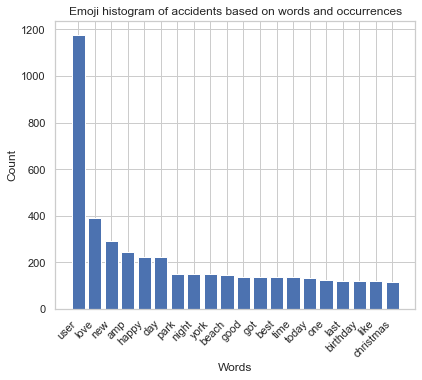

In [38]:
#Here we simply plot the distribution
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),emoji_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [39]:
# Here we multiply the frequency with the rank

In [40]:
li =  []
counter = 1
for elm in emoji_top_20_val.values():
    li.append(elm * counter)
    counter += 1

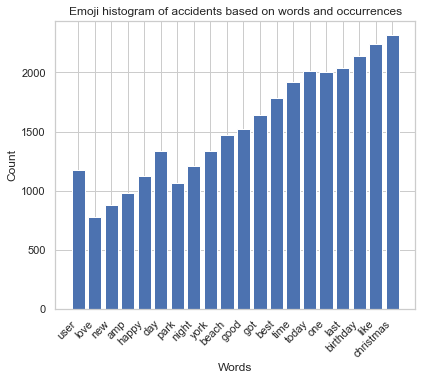

In [41]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [42]:
# Raw dataset
emoji_raw_val = word_frequency(emoji_words_val_txt)
emoji_raw_train = word_frequency(emoji_words_train_txt)
emoji_raw_test = word_frequency(emoji_words_test_txt)

In [43]:
thing = most_common_words(emoji_raw_val)

In [44]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

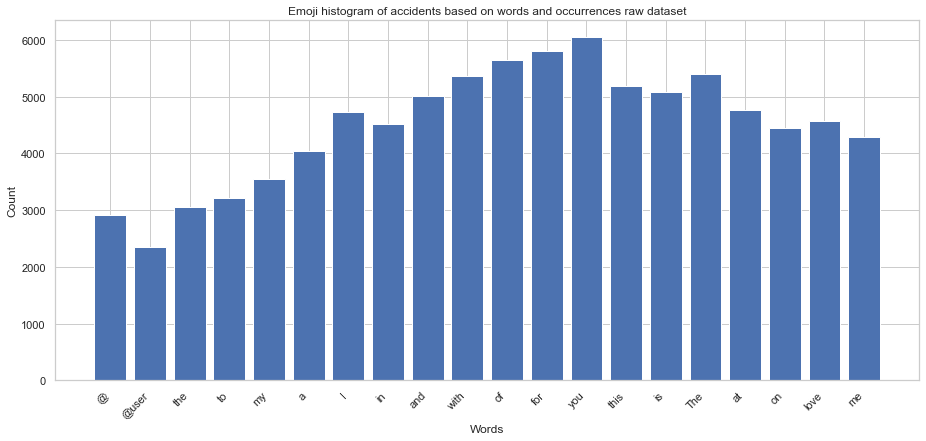

In [45]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

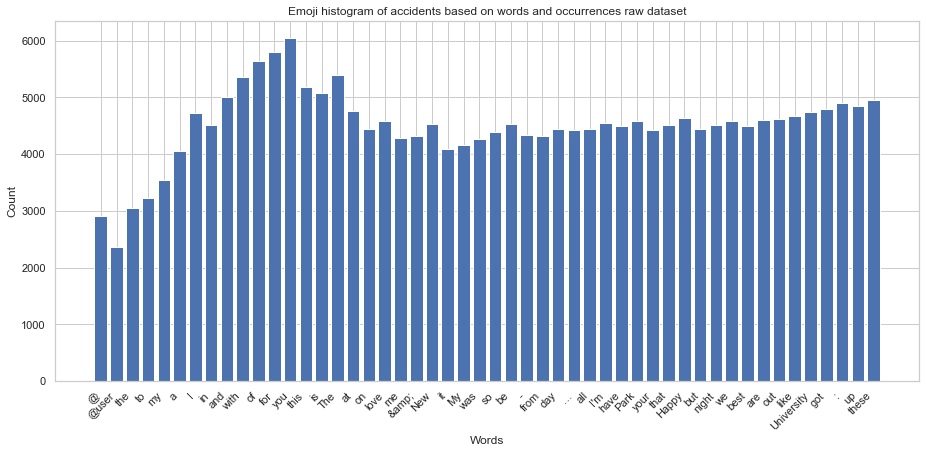

In [46]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

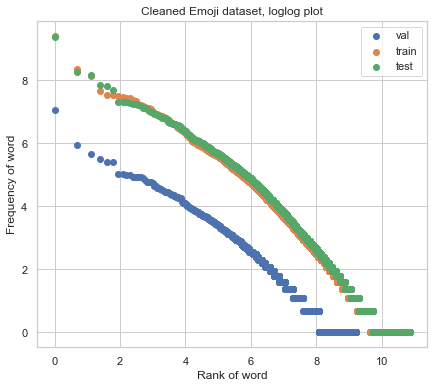

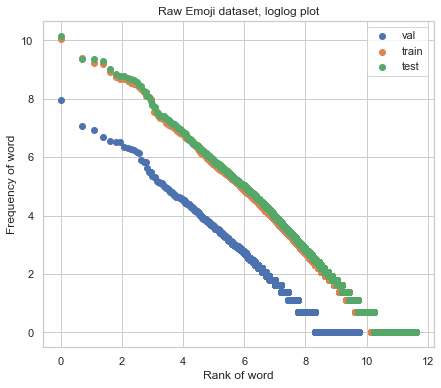

In [47]:
# Cleaned dataset:
llplot([emoji_freq_words_val, emoji_freq_words_train, emoji_freq_words_test], labels=["val", "train", "test"], title="Cleaned Emoji dataset, loglog plot")



llplot([emoji_raw_val, emoji_raw_train, emoji_raw_test], labels=["val", "train", "test"], title="Raw Emoji dataset, loglog plot")

## Type/token ratio

In [48]:
_, tokens, _, _,unique_tokens, _ ,_ = basic_statistics(emoji_text_train,printer = True)

The number of characters: 3285761
The number of tokens is: 671468
The number of sentences is: 23566
The average number of tokens per sentence is: 20
The number of unique tokens are: 45902
The tokens ratio is: 0.068
The number of total tokens after removing stopwords are: 314706


## Offensive dataset

## Size of our offensive vocabulary

In [49]:
print("Number of total words in the vocabulary " + str(len(offensive_freq_words_train)))

Number of total words in the vocabulary 17033


### Top 20 most common tokens 

In [50]:
offensive_top_20_val = top_20_most_common_words(offensive_freq_words_val)
offensive_top_20_train = top_20_most_common_words(offensive_freq_words_train)
offensive_top_20_test = top_20_most_common_words(offensive_freq_words_test)

print('Top 20 in val_text.txt:\n',offensive_top_20_val, '\n')
print('Top 20 in val_train.txt:\n',offensive_top_20_train,'\n')
print('Top 20 in val_test.txt:\n',offensive_top_20_test,'\n')

Top 20 in val_text.txt:
 {'user': 3455, 'liberals': 139, 'gun': 133, 'control': 125, 'antifa': 119, 'like': 110, 'conservatives': 107, 'maga': 98, 'people': 89, 'know': 77, 'get': 74, 'one': 72, 'trump': 70, 'think': 68, 'amp': 62, 'would': 61, 'want': 55, 'us': 52, 'going': 47, 'right': 46} 

Top 20 in val_train.txt:
 {'user': 29961, 'liberals': 1265, 'gun': 1230, 'control': 1097, 'antifa': 1051, 'like': 997, 'maga': 912, 'conservatives': 842, 'people': 832, 'amp': 615, 'get': 588, 'trump': 568, 'one': 568, 'know': 560, 'would': 507, 'think': 485, 'good': 418, 'right': 413, 'time': 350, 'us': 346} 

Top 20 in val_test.txt:
 {'user': 608, 'liberals': 81, 'conservatives': 80, 'antifa': 74, 'like': 65, 'gun': 64, 'control': 64, 'maga': 57, 'get': 51, 'one': 48, 'people': 47, 'trump': 44, 'us': 42, 'love': 38, 'want': 37, 'via': 33, 'know': 31, 'good': 31, 'see': 30, 'going': 30} 



## Top 20 least common tokens

In [51]:
offensive_least_words_val = least_common_words(offensive_freq_words_val)
offensive_least_words_train = least_common_words(offensive_freq_words_train)
offensive_least_words_test = least_common_words(offensive_freq_words_test)
print('Top 20 least common words in offensive_freq_words_val \n',offensive_least_words_val[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_train \n',offensive_least_words_train[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_test \n',offensive_least_words_test[0:20], '\n')

Top 20 least common words in offensive_freq_words_val 
 [('wiiu', 1), ('console', 1), ('az', 1), ('underage', 1), ('lionsden', 1), ('affect', 1), ('hazard', 1), ('club', 1), ('finger', 1), ('aid', 1), ('constituent', 1), ('disclosure', 1), ('etiquette', 1), ('moderation', 1), ('city', 1), ('ft', 1), ('richer', 1), ('sendhim', 1), ('allegation', 1), ('teen', 1)] 

Top 20 least common words in offensive_freq_words_train 
 [('countrymen', 1), ('breitbarters', 1), ('progressing', 1), ('reads', 1), ('unto', 1), ('optic', 1), ('vetsresistsquadron', 1), ('scout', 1), ('lifetimes', 1), ('obummer', 1), ('plethora', 1), ('peruse', 1), ('lighting', 1), ('torches', 1), ('checkmarks', 1), ('verifiedhate', 1), ('lmfaoooooo', 1), ('shitbiscuit', 1), ('tempe', 1), ('licensereporters', 1)] 

Top 20 least common words in offensive_freq_words_test 
 [('ibelieveblaseyford', 1), ('libreal', 1), ('snowflake', 1), ('iran', 1), ('johnkerryiranmeeting', 1), ('angels', 1), ('runs', 1), ('homers', 1), ('connects

## Zipf's Law

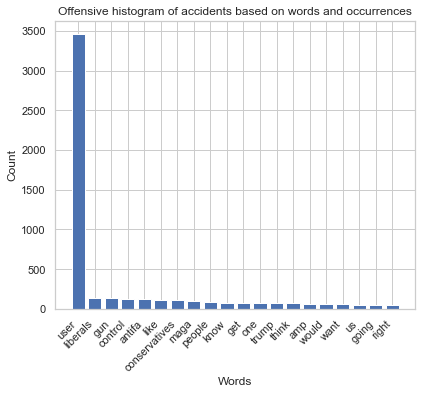

In [52]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),offensive_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Offensive histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [53]:
li =  []
counter = 1
for elm in offensive_top_20_val.values():
    li.append(elm * counter)
    counter += 1

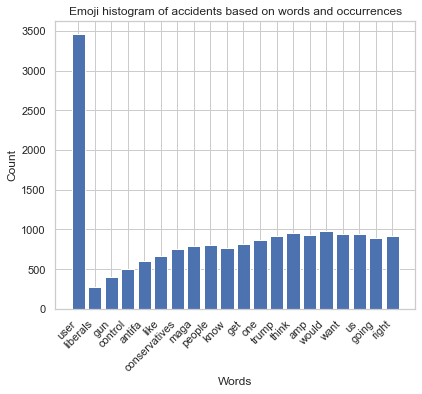

In [54]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [55]:
# Raw dataset
offensive_raw_val = word_frequency(offensive_words_val_txt)
offensive_raw_train = word_frequency(offensive_words_train_txt)
offensive_raw_test = word_frequency(offensive_words_test_txt)


In [56]:
thing = most_common_words(offensive_raw_val)

In [57]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

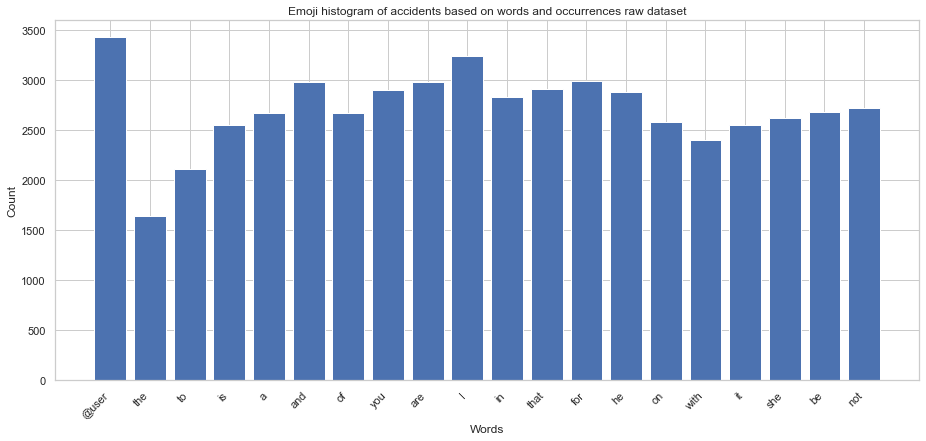

In [58]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

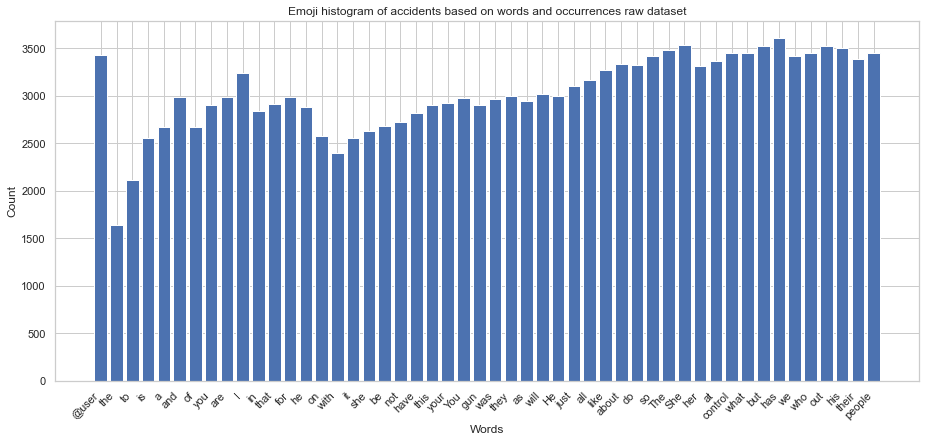

In [59]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li[:50])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

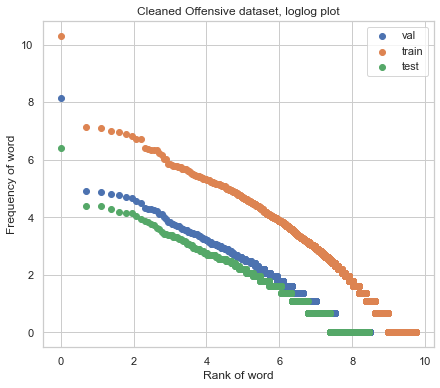

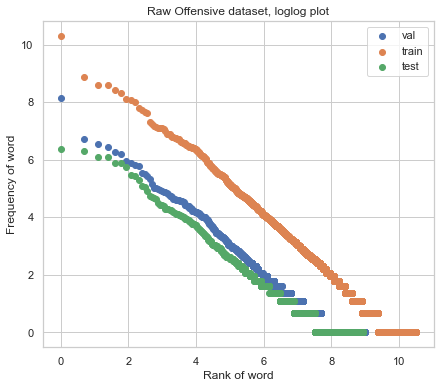

In [60]:
# Cleaned dataset:
llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], labels=["val", "train", "test"], title="Cleaned Offensive dataset, loglog plot")

llplot([offensive_raw_val, offensive_raw_train, offensive_raw_test], labels=["val", "train", "test"], title="Raw Offensive dataset, loglog plot")

There is an overall trend that the follows the law, however, this is has not been proven mathematicly, and our plots doesn't follow the excact distributions as described.

## Type/token ratio

In [61]:
_, tokens, _, _,unique_tokens, _ ,_ = basic_statistics(offensive_text_train,printer = True)

The number of characters: 1510503
The number of tokens is: 336814
The number of sentences is: 18122
The average number of tokens per sentence is: 14
The number of unique tokens are: 17182
The tokens ratio is: 0.051
The number of total tokens after removing stopwords are: 147828


***

## Data frames for offensive train text and offensive test text

In [62]:


train = pd.read_csv('datasets/offensive/train_text.txt', header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Training Set:"% train.columns, train.shape, len(train))


test = pd.read_csv('datasets/offensive/test_text.txt',header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (11916, 1) 11916
Test Set: (860, 1) 860


In [63]:

index_train = [x for x in range(1, len(train.values)+1)]
index_test = [x for x in range(1, len(test.values)+1)]

train.insert(loc=0, column='id', value =index_train )
test.insert(loc=0, column='id', value =index_test )

train_labels = pd.read_csv('datasets/offensive/train_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
train_labels.insert(loc=0, column='id', value=index_train)

test_labels = pd.read_csv('datasets/offensive/test_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
test_labels.insert(loc=0, column='id', value =index_test )


test_df = test.merge(test_labels, on='id', how='left')
train_df = train.merge(train_labels, on='id', how='left')




In [64]:
train_df.head()

id                                              tweet  label
0   1  @user Bono... who cares. Soon people will unde...      0
1   2  @user Eight years the republicans denied obama...      1
2   3  @user Get him some line help. He is gonna be j...      0
3   4               @user @user She is great. Hi Fiona!       0
4   5  @user She has become a parody unto herself? Sh...      1

In [65]:
test_df.head()

id                                              tweet  label
0   1  #ibelieveblaseyford is liar she is fat ugly li...      1
1   2  @user @user @user I got in a pretty deep debat...      0
2   3  ...if you want more shootings and more death, ...      0
3   4  Angels now have 6 runs. Five of them have come...      0
4   5  #Travel #Movies and Unix #Fortune combined  Vi...      0

In [66]:
test_clean = clean_text(test_df, 'tweet')
train_clean = clean_text(train_df, 'tweet')

In [67]:
stop = stopwords.words('english')

train_clean['tweet'] = train_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_clean.head()

id                                              tweet  label
0   1  bono cares soon people understand gain nothing...      0
1   2  eight years republicans denied obama picks bre...      1
2   3  get line help gonna fine game went could see p...      0
3   4                                     great hi fiona      0
4   5  become parody unto certainly taken heat well i...      1

In [68]:
stop = stopwords.words('english')
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test_clean.head()

id                                              tweet  label
0   1  ibelieveblaseyford liar fat ugly libreal snowf...      1
1   2  got pretty deep debate friend told latinos tru...      0
2   3  want shootings death listen aclu black lives m...      0
3   4  angels 6 runs five come courtesy mike trout ho...      0
4   5  travel movies unix fortune combined visit sali...      0

In [69]:
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: word_tokenize(x))
test_clean.head()

id                                              tweet  label
0   1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0

In [70]:

test_clean_offensive = test_clean.loc[test_clean['label'] == 1]
test_clean_offensive.head()
#test_clean_offensive['tweet'].to_csv('test_cleaned_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 

id                                              tweet  label
0    1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
8    9  [grown, ass, woman, probably, 10, years, older...      1
10  11  [kavanaugh, disciple, anthony, kennedy, ed, li...      1
15  16  [apparently, committed, going, new, level, sin...      1
18  19  [50, cent, calls, joe, budden, bullshit, insta...      1

In [71]:
test_clean_nonoffensive = test_clean.loc[test_clean['label'] == 0]

#test_clean_nonoffensive['tweet'].to_csv('test_cleaned_non_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 

test_clean_nonoffensive.head()

id                                              tweet  label
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0
5   6  [naturephotography, nature, birds, wild, wisco...      0

In [72]:
test_off_lists = test_clean_offensive['tweet'].values.tolist()
test_off_lists[0]

['ibelieveblaseyford',
 'liar',
 'fat',
 'ugly',
 'libreal',
 'snowflake',
 'sold',
 'get',
 'cash',
 'dems',
 'iran',
 'spoke',
 'johnkerryiranmeeting']

In [73]:
test_non_off_lists = test_clean_nonoffensive['tweet'].values.tolist()
test_non_off_lists[0]

['got',
 'pretty',
 'deep',
 'debate',
 'friend',
 'told',
 'latinos',
 'trump',
 'blacks',
 'trump',
 'paid',
 'supporters',
 'said',
 'mean',
 'antifa',
 'paid',
 'domestic',
 'terrorist',
 'said',
 'anti',
 'fascist',
 'said',
 'fascist',
 'kidding']

# Task 04 - Automatic Prediction

In [74]:
# Merging validation text and labels
val_df = merging_labels_and_sentences('datasets/offensive/val_text', 'datasets/offensive/val_labels')

# Checking for missing values
missing_val = missing_values(val_df)
# Average words devided into labels
avg_labels_word = word_count(val_df)
avg_labels_char = char_count(val_df)

print(' Average Number of Words - Offensive Tweets: ', avg_labels_word[1],'\n','Average Number of Words - Non-offensive Tweets: ', avg_labels_word[2])
print(' Average Characters in Offensive Tweets: ', avg_labels_char[1],'\n','Average Characters in Non-offensive Tweets: ', avg_labels_char[2])

print('\nNumber of missing values for each column\n',missing_val)



 Average Number of Words - Offensive Tweets:  25.569 
 Average Number of Words - Non-offensive Tweets:  22.151
 Average Characters in Offensive Tweets:  143.852 
 Average Characters in Non-offensive Tweets:  126.98

Number of missing values for each column
 id       0
tweet    0
label    0
dtype: int64


C:\Users\Martin\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


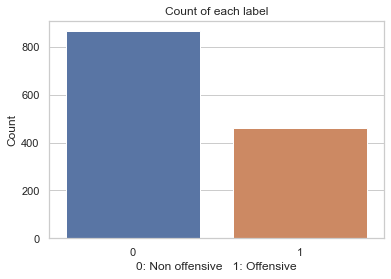

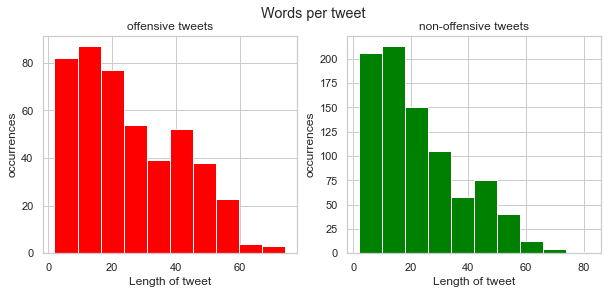

In [75]:
# Number of total labels for each class: 0 = non offensive, 1 = offensive
barplot = class_distribution(val_df,"Count of each label","0: Non offensive   1: Offensive")
# Histogram of Word count pr tweet
plot_word_count = plot_word_count(val_df)

## Term Frequency-Inverse Document Frequencies

Term Frequency-Inverse Document Frequencies (tf-Idf): Count vectors might not be the best representation for converting text data to numerical data. So, instead of simple counting, we can also use an advanced variant of the Bag-of-Words that uses the term frequency–inverse document frequency (or Tf-Idf). Basically, the value of a word increases proportionally to count in the document, but it is inversely proportional to the frequency of the word in the corpus

# We are splitting the data into training and test
X_train, X_test, y_train, y_test = split_dataset_2(val_df,labels)

# Here we tokenize the data
X_train_tok, X_test_tok = tokenize_train_test_2(X_train[:,0].tolist(), X_test[:,0].tolist())

# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train.tolist()) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test.tolist())


val_df['clean_text_tok']=[nltk.word_tokenize(i) for i in val_df['tweet']]
model = gensim.models.Word2Vec(val_df['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [76]:
# We are splitting the data into training and test
X_train, X_test, y_train, y_test = split_dataset(val_df)

# Here we tokenize the data
X_train_tok, X_test_tok = tokenize_train_test(X_train, X_test)

# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)


val_df['clean_text_tok']=[nltk.word_tokenize(i) for i in val_df['tweet']]
model = gensim.models.Word2Vec(val_df['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

## Logistic regression (tf-idf)

In [77]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(X_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.69      0.89      0.77       167
           1       0.61      0.31      0.41        98

    accuracy                           0.67       265
   macro avg       0.65      0.60      0.59       265
weighted avg       0.66      0.67      0.64       265

Confusion Matrix: [[148  19]
 [ 68  30]]
AUC: 0.6608823169986557


In [78]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

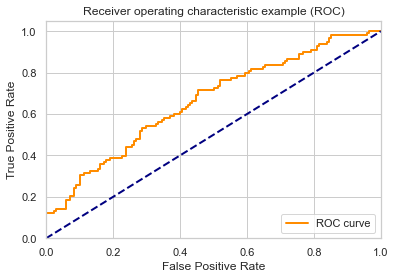

In [79]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example (ROC)')
plt.legend(loc="lower right")
plt.show()

In [80]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)

lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       167
           1       0.00      0.00      0.00        98

    accuracy                           0.63       265
   macro avg       0.31      0.50      0.39       265
weighted avg       0.40      0.63      0.49       265

Confusion Matrix: [[166   1]
 [ 98   0]]
AUC: 0.6152389099352317


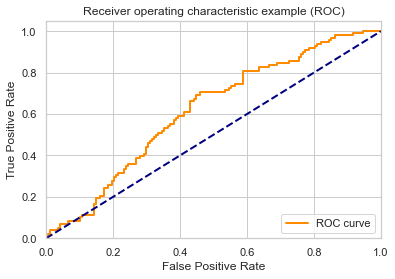

In [81]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example (ROC)')
plt.legend(loc="lower right")
plt.show()

# Naive

# Test

In [82]:

def split_dataset(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe["tweet"],dataframe      
    ["label"],test_size=0.2,shuffle=True)
    return X_train, X_test, y_train, y_test

def split_dataset_2(dataframe,labels):
    counter = 0
    li = []
    for rows in dataframe.iterrows():
        row = []
        for elm in labels:
            row.append(rows[1][elm])
        li.append(row)
    
    X_train, X_test, y_train, y_test = train_test_split(li,dataframe["label"],test_size=0.2,shuffle=True)
    return X_train,X_test, y_train, y_test
labels = ["tweet","word_count","char_count"]

In [109]:
test = val_df.copy()

In [110]:
test = test.drop(["id"],axis = 1)

In [111]:
test

tweet  label  word_count  \
0         @user @user WiiU is not even a real console.       0           9   
1     @user @user @user If he is from AZ I would put...      1          18   
2     @user I thought Canada had strict gun control....      0          14   
3     @user @user @user @user @user @user @user @use...      0          28   
4             1 Minute of Truth: Gun Control via @user       0           8   
...                                                 ...    ...         ...   
1319  @user @user Whose twitter interest start with ...      0          24   
1320  @user @user How did the press"" get the letter...      0           9   
1321  @user @user @user @user @user @user Sorry abou...      0          52   
1322                         @user Fuck Alan I’m sorry       1           5   
1323  #Tories #Labour #GE2017 #Conservatives Conserv...      0          28   

      char_count                                     clean_text_tok  
0             45  [@, user, @, user, WiiU, is, not, even, a, rea...  
1             83  [@, user, @, user, @, user, If, he, is, from, ...  
2             86  [@, user, I, thought, Canada, had, strict, gun...  
3            173  [@, user, @, user, @, user, @, user, @, user, ...  
4             41  [1, Minute, of, Truth, :, Gun, Control, via, @...  
...          ...                                                ...  
1319         143  [@, user, @, user, Whose, twitter, interest, s...  
1320          59  [@, user, @, user, How, did, the, press, '', '...  
1321         277  [@, user, @, user, @, user, @, user, @, user, ...  
1322          26              [@, user, Fuck, Alan, I, ’, m, sorry]  
1323         235  [#, Tories, #, Labour, #, GE2017, #, Conservat...  

[1324 rows x 5 columns]

In [112]:
li = []
counter = 0
for elm in test["tweet"]:
    li.append(len(re.findall("@user", elm)))

In [113]:
test["Tags"] = li

In [114]:
df_off = test.where(test["label"] == 1).dropna()
df_not_off = test.where(test["label"] == 0).dropna()

In [115]:
df_not_off

tweet  label  word_count  \
0         @user @user WiiU is not even a real console.     0.0         9.0   
2     @user I thought Canada had strict gun control....    0.0        14.0   
3     @user @user @user @user @user @user @user @use...    0.0        28.0   
4             1 Minute of Truth: Gun Control via @user     0.0         8.0   
5     @user @user @user We could help if you are Lon...    0.0        12.0   
...                                                 ...    ...         ...   
1317  @user lmao i really didn’t know him before tha...    0.0        12.0   
1319  @user @user Whose twitter interest start with ...    0.0        24.0   
1320  @user @user How did the press"" get the letter...    0.0         9.0   
1321  @user @user @user @user @user @user Sorry abou...    0.0        52.0   
1323  #Tories #Labour #GE2017 #Conservatives Conserv...    0.0        28.0   

      char_count                                     clean_text_tok  Tags  
0           45.0  [@, user, @, user, WiiU, is, not, even, a, rea...   2.0  
2           86.0  [@, user, I, thought, Canada, had, strict, gun...   1.0  
3          173.0  [@, user, @, user, @, user, @, user, @, user, ...  16.0  
4           41.0  [1, Minute, of, Truth, :, Gun, Control, via, @...   1.0  
5           58.0  [@, user, @, user, @, user, We, could, help, i...   3.0  
...          ...                                                ...   ...  
1317        57.0  [@, user, lmao, i, really, didn, ’, t, know, h...   1.0  
1319       143.0  [@, user, @, user, Whose, twitter, interest, s...   2.0  
1320        59.0  [@, user, @, user, How, did, the, press, '', '...   2.0  
1321       277.0  [@, user, @, user, @, user, @, user, @, user, ...   6.0  
1323       235.0  [#, Tories, #, Labour, #, GE2017, #, Conservat...   0.0  

[865 rows x 6 columns]

In [116]:
Counter(df_off["Tags"])
Counter(df_not_off["Tags"])

Counter({2.0: 193,
         1.0: 393,
         16.0: 4,
         3.0: 79,
         4.0: 38,
         0.0: 87,
         10.0: 1,
         50.0: 11,
         42.0: 1,
         6.0: 12,
         12.0: 3,
         11.0: 6,
         7.0: 5,
         5.0: 17,
         28.0: 1,
         13.0: 1,
         15.0: 1,
         9.0: 3,
         14.0: 3,
         49.0: 3,
         8.0: 1,
         43.0: 2})

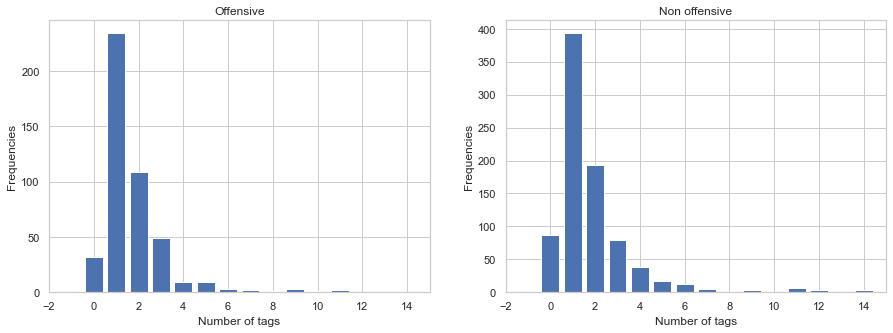

In [117]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
value = Counter(df_off["Tags"]).values()
keys = Counter(df_off["Tags"]).keys()
ax1.bar(keys,value)
ax1.set_ylabel("Frequencies")
ax1.set_xlabel("Number of tags")
ax1.set_title("Offensive")
ax1.set_xlim(-2,15)
value_2 = Counter(df_not_off["Tags"]).values()
keys_2 = Counter(df_not_off["Tags"]).keys()
ax2.bar(keys_2,value_2)
ax2.set_ylabel("Frequencies")
ax2.set_xlabel("Number of tags")
ax2.set_title("Non offensive")
ax2.set_xlim(-2,15)
plt.show()

In [118]:
test

tweet  label  word_count  \
0         @user @user WiiU is not even a real console.       0           9   
1     @user @user @user If he is from AZ I would put...      1          18   
2     @user I thought Canada had strict gun control....      0          14   
3     @user @user @user @user @user @user @user @use...      0          28   
4             1 Minute of Truth: Gun Control via @user       0           8   
...                                                 ...    ...         ...   
1319  @user @user Whose twitter interest start with ...      0          24   
1320  @user @user How did the press"" get the letter...      0           9   
1321  @user @user @user @user @user @user Sorry abou...      0          52   
1322                         @user Fuck Alan I’m sorry       1           5   
1323  #Tories #Labour #GE2017 #Conservatives Conserv...      0          28   

      char_count                                     clean_text_tok  Tags  
0             45  [@, user, @, user, WiiU, is, not, even, a, rea...     2  
1             83  [@, user, @, user, @, user, If, he, is, from, ...     3  
2             86  [@, user, I, thought, Canada, had, strict, gun...     1  
3            173  [@, user, @, user, @, user, @, user, @, user, ...    16  
4             41  [1, Minute, of, Truth, :, Gun, Control, via, @...     1  
...          ...                                                ...   ...  
1319         143  [@, user, @, user, Whose, twitter, interest, s...     2  
1320          59  [@, user, @, user, How, did, the, press, '', '...     2  
1321         277  [@, user, @, user, @, user, @, user, @, user, ...     6  
1322          26              [@, user, Fuck, Alan, I, ’, m, sorry]     1  
1323         235  [#, Tories, #, Labour, #, GE2017, #, Conservat...     0  

[1324 rows x 6 columns]

In [119]:
li = []
for elm in test["tweet"]:
    #li.append(re.sub('\W+',' ', elm ).strip()) # Removes all special characters
    clean = re.sub('\W+',' ', elm ).strip()
    clean = clean.lower()
    temp = []
    for i in clean:
        if i == " ":
            temp.append(0)
            #temp.append(" ")
        else:
            #k = str(i)
            temp.append((ord(i) - 97))
    li.append(temp)
test["Numeric"] = li

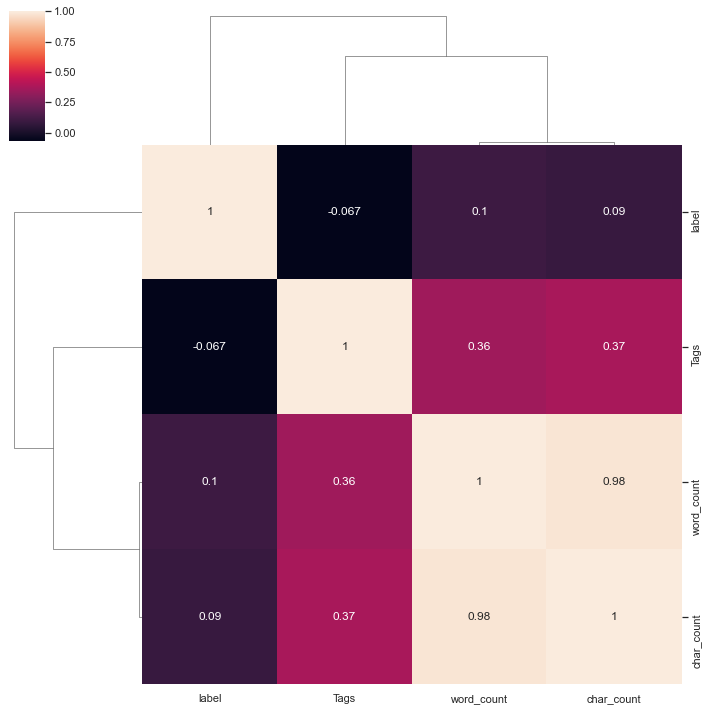

In [120]:
import seaborn as sns

# calculate the correlations
correlations = test.corr()

# plot the heatmap bb
#sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True);

In [121]:
test = test.drop(["tweet","clean_text_tok","char_count","Tags"],axis = 1)

In [122]:
test

label  word_count                                            Numeric
0         0           9  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 22, 8, 8,...
1         1          18  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 20, 18, 4...
2         0          14  [20, 18, 4, 17, 0, 8, 0, 19, 7, 14, 20, 6, 7, ...
3         0          28  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 20, 18, 4...
4         0           8  [-48, 0, 12, 8, 13, 20, 19, 4, 0, 14, 5, 0, 19...
...     ...         ...                                                ...
1319      0          24  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 22, 7, 14...
1320      0           9  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 7, 14, 22...
1321      0          52  [20, 18, 4, 17, 0, 20, 18, 4, 17, 0, 20, 18, 4...
1322      1           5  [20, 18, 4, 17, 0, 5, 20, 2, 10, 0, 0, 11, 0, ...
1323      0          28  [19, 14, 17, 8, 4, 18, 0, 11, 0, 1, 14, 20, 17...

[1324 rows x 3 columns]

In [123]:
import tensorflow as tf

In [124]:

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
X

In [ ]:
model = Sequential()
model.add(Dense(units=12, activation='relu', input_shape=(32,)))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)


In [ ]:
test = test.drop(["tweet","char_count","clean_text_tok"],axis = 1)

In [ ]:
test

In [ ]:
#test['clean_text_tok']=[nltk.word_tokenize(i) for i in test['tweet']]
model = gensim.models.Word2Vec(test['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)

In [ ]:
X_train_vectors_w2v = modelw.transform(X_train_tok)

In [ ]:
len(X_train_vectors_w2v)

In [ ]:
test["w2v"] 

In [ ]:
# We are splitting the data into training and test
X_train, X_test, y_train, y_test = split_dataset(val_df)

# Here we tokenize the data
X_train_tok, X_test_tok = tokenize_train_test(X_train, X_test)

# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)


val_df['clean_text_tok']=[nltk.word_tokenize(i) for i in val_df['tweet']]
model = gensim.models.Word2Vec(val_df['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [ ]:
test = test.drop(["label"],axis = 1)

In [ ]:
test

In [ ]:
#featurespace**2

In [ ]:
#evt antallet af users

In [ ]:
import seaborn as sns

# calculate the correlations
correlations = test.corr()

# plot the heatmap 
#sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True);

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train) 

 #Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Sa
#model_prediction_preprocessed_data(val_df).to_csv('model_predict_proc_validation.csv')

In [ ]:
#model_prediction_nonprocessed_data(val_df).to_csv('model_predict_nonproc_validation.csv')

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

df = pd.read_csv('data/wine_data.csv')

counter = Counter(df['variety'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

description_list = df['description'].tolist()
varietal_list = [top_10_varieties[i] for i in df['variety'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))